In [40]:
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

# 读取数据
df = pd.read_csv('盤後調整價.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop(columns=['Date'], axis=1, inplace=True)


C:\Users\asas9\AppData\Local\Temp\ipykernel_11864\2254294274.py:7: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')


In [42]:
df

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000
2024-09-20,32.3000,45.0000,17.4500,30.6500,14.8500,18.6000,21.7500,18.1000,50.4000,51.2000,...,160.5000,30.6500,143.0000,115.0000,82.5000,20.2500,47.5000,30.9000,36.30,241.5000
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

In [46]:
df

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,31.8000,44.9000,17.7000,29.8000,14.6000,18.4500,22.2500,18.1500,48.8000,50.9000,...,162.5000,30.8500,134.5000,114.5000,81.6000,20.1000,46.9500,32.2000,37.00,209.5000
2024-09-16,32.2000,45.0000,17.9500,30.2000,14.7500,18.5500,22.4000,18.2500,48.8000,51.3000,...,161.5000,30.9000,136.0000,114.5000,81.6000,20.2000,47.2000,31.9000,36.90,206.5000
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000


In [70]:
# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

In [72]:
df

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,31.8000,44.9000,17.7000,29.8000,14.6000,18.4500,22.2500,18.1500,48.8000,50.9000,...,162.5000,30.8500,134.5000,114.5000,81.6000,20.1000,46.9500,32.2000,37.00,209.5000
2024-09-16,32.2000,45.0000,17.9500,30.2000,14.7500,18.5500,22.4000,18.2500,48.8000,51.3000,...,161.5000,30.9000,136.0000,114.5000,81.6000,20.2000,47.2000,31.9000,36.90,206.5000
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000


In [74]:
# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64


In [76]:
df_filtered

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,31.8000,44.9000,17.7000,29.8000,14.6000,18.4500,22.2500,18.1500,48.8000,50.9000,...,162.5000,30.8500,134.5000,114.5000,81.6000,20.1000,46.9500,32.2000,37.00,209.5000
2024-09-16,32.2000,45.0000,17.9500,30.2000,14.7500,18.5500,22.4000,18.2500,48.8000,51.3000,...,161.5000,30.9000,136.0000,114.5000,81.6000,20.2000,47.2000,31.9000,36.90,206.5000
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000


In [78]:
# 前向填充缺失数据
df_filtered.fillna(method='ffill', inplace=True)

# 后向填充，以防前向填充无法填充初始的 NaN 值
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列
df_filtered.dropna(axis=0, how='any', inplace=True)
df_filtered.dropna(axis=1, how='any', inplace=True)


C:\Users\asas9\AppData\Local\Temp\ipykernel_11864\3690790798.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_11864\3690790798.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='bfill', inplace=True)


In [80]:
df_filtered

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,31.8000,44.9000,17.7000,29.8000,14.6000,18.4500,22.2500,18.1500,48.8000,50.9000,...,162.5000,30.8500,134.5000,114.5000,81.6000,20.1000,46.9500,32.2000,37.00,209.5000
2024-09-16,32.2000,45.0000,17.9500,30.2000,14.7500,18.5500,22.4000,18.2500,48.8000,51.3000,...,161.5000,30.9000,136.0000,114.5000,81.6000,20.2000,47.2000,31.9000,36.90,206.5000
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000


In [82]:
# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
else: 
    # 计算预期收益率和协方差矩阵，基于价格数据
    mu = expected_returns.mean_historical_return(df_filtered)
    S = risk_models.sample_cov(df_filtered)
    
    # 使用最大夏普比率进行优化
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    # 清理权重并输出
    cleaned_weights = ef.clean_weights()
    print(cleaned_weights)
    
    # 显示投资组合的表现
    ef.portfolio_performance(verbose=True)

SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

In [38]:
non_zero_weights = {stock: weight for stock, weight in cleaned_weights.items() if weight > 0}
print("持仓不为零的股票及其权重：")
for stock, weight in non_zero_weights.items():
    print(f"{stock}: {weight:.4f}")


持仓不为零的股票及其权重：
1231: 0.0877
1235: 0.0705
1341: 0.0041
1423: 0.0671
1435: 0.0144
1436: 0.0825
1438: 0.0048
1443: 0.0247
1519: 0.0162
1540: 0.0061
1615: 0.0271
1713: 0.0007
2404: 0.0014
2467: 0.0326
2480: 0.0206
2539: 0.1242
2540: 0.0177
2543: 0.0046
2546: 0.0531
2548: 0.0030
2597: 0.0229
3130: 0.0016
3528: 0.0021
3533: 0.0101
3653: 0.0031
3661: 0.0205
3715: 0.0074
4569: 0.1077
4583: 0.0138
4763: 0.0058
6183: 0.0119
6409: 0.0144
6472: 0.0328
6655: 0.0437
6805: 0.0164
8467: 0.0052
9103: 0.0019
9937: 0.0066
9958: 0.0163


In [1]:
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

# 读取数据
df = pd.read_csv('盤後調整價.csv')

# 设置 'Date' 为索引并转换为日期类型
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

# 前向填充缺失数据
df_filtered.fillna(method='ffill', inplace=True)

# 后向填充，以防前向填充无法填充初始的 NaN 值
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列
df_filtered.dropna(axis=0, how='any', inplace=True)
df_filtered.dropna(axis=1, how='any', inplace=True)

# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
else:
    # 计算预期收益率和协方差矩阵，基于价格数据
    mu = expected_returns.mean_historical_return(df_filtered)
    S = risk_models.sample_cov(df_filtered)

    # 使用最大夏普比率进行优化
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()

    # 清理权重并输出
    cleaned_weights = ef.clean_weights()
    print(cleaned_weights)

    # 显示投资组合的表现
    ef.portfolio_performance(verbose=True)


C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\3383169869.py:7: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')


以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64


C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\3383169869.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\3383169869.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='bfill', inplace=True)


OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.08772, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0705, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00412, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0671, '1432': 0.0, '1434': 0.0, '1435': 0.01439, '1436': 0.08248, '1437': 0.0, '1438': 0.00478, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.02469, '1444': 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [86]:
pip install pulp

   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB 660.6 kB/s eta 0:00:27
   ---------------------------------------- 0.1/17.7 MB 653.6 kB/s eta 0:00:27
   ---------------------------------------- 0.2/17.7 MB 1.0 MB/s eta 0:00:18
    --------------------------------------- 0.3/17.7 MB 1.4 MB/s eta 0:00:13
   - -------------------------------------- 0.5/17.7 MB 2.1 MB/s eta 0:00:09
   - -------------------------------------- 0.5/17.7 MB 2.0 MB/s eta 0:00:09
   - -------------------------------------- 0.7/17.7 MB 2.0 MB/s eta 0:00:09
   -- ------------------------------------- 1.0/17.7 MB 2.8 MB/s eta 0:00:07
   -- ------------------------------------- 1.3/17.7 MB 3.2 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/17.7 MB 3.2 MB/s eta 0:00:06
   ---- ----------------------------------- 1.8/17.7 MB 3.5 MB/s eta 0:00:05
   ---- -

In [90]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
porfolio_val = 150000
lastest_prices = get_latest_prices(df_filtered)
weights = cleaned_weights
da = DiscreteAllocation(weights, lastest_prices, total_portfolio_value = porfolio_val)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds Remaining: $', leftover )

Discrete allocation: {'1231': 120, '1235': 78, '1341': 9, '1423': 224, '1435': 47, '1436': 87, '1438': 11, '1443': 115, '1519': 4, '1540': 20, '1615': 63, '1713': 2, '2404': 1, '2467': 22, '2480': 25, '2539': 346, '2540': 23, '2543': 9, '2546': 107, '2548': 4, '2597': 24, '3130': 1, '3528': 6, '3533': 1, '3661': 3, '3715': 16, '4569': 65, '4583': 3, '4763': 1, '6183': 24, '6409': 2, '6472': 6, '6655': 48, '6805': 3, '8467': 3, '9103': 43, '9937': 15, '9958': 10}
Funds Remaining: $ 18.92104000467225


C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\1618565989.py:10: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\1618565989.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\1618565989.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future

以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64


C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
[*********************100%***********************]  1 of 1 completed

OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.08772, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0705, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00412, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0671, '1432': 0.0, '1434': 0.0, '1435': 0.01439, '1436': 0.08248, '1437': 0.0, '1438': 0.00478, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.02469, '1444': 

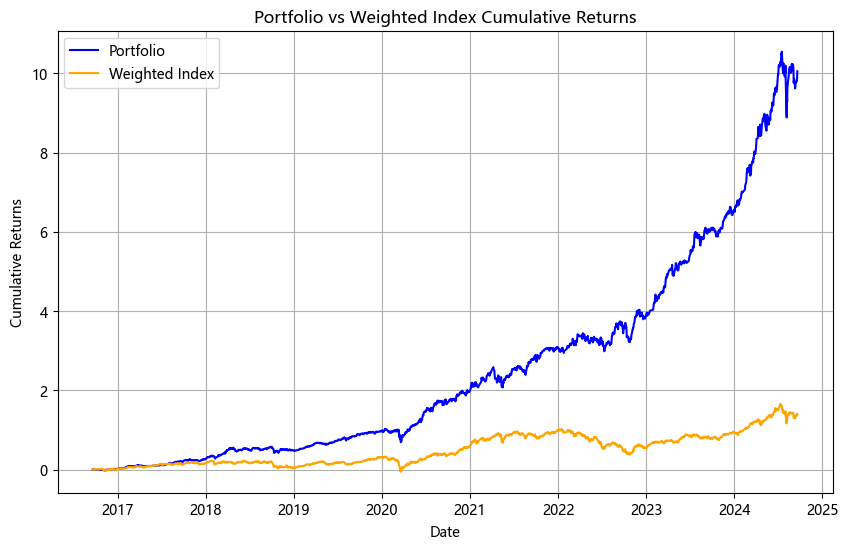

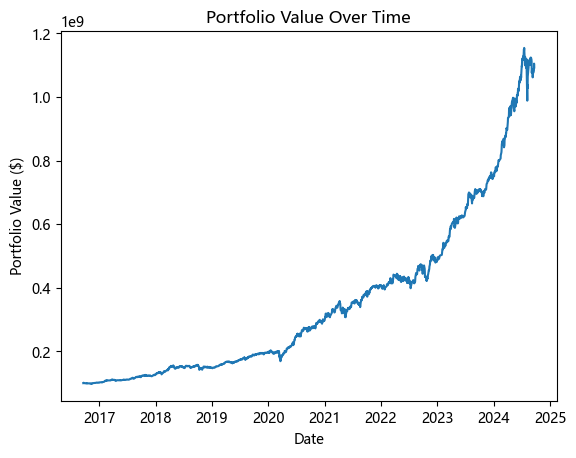

In [37]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 读取数据
df = pd.read_csv('盤後調整價.csv')

# 设置 'Date' 为索引并转换为日期类型
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

# 前向填充缺失数据
df_filtered.fillna(method='ffill', inplace=True)

# 后向填充，以防前向填充无法填充初始的 NaN 值
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列
df_filtered.dropna(axis=0, how='any', inplace=True)
df_filtered.dropna(axis=1, how='any', inplace=True)

# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
else:
    # 计算预期收益率和协方差矩阵，基于价格数据
    mu = expected_returns.mean_historical_return(df_filtered)
    S = risk_models.sample_cov(df_filtered)

    # 使用最大夏普比率进行优化
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()

    # 清理权重并输出
    cleaned_weights = ef.clean_weights()
    print(cleaned_weights)

    # 显示投资组合的表现
    ef.portfolio_performance(verbose=True)


# 设置投资组合初始资金
porfolio_val = 100000000  # 假设初始投资资金为100,000,000

# 获取最早的交易日价格
earliest_prices = df_filtered.iloc[0]  # 获取最早交易日的股票价格

# 确保 earliest_prices 是 Series 格式，删除任何 NaN 值
earliest_prices = earliest_prices.dropna()

# 过滤掉权重为零的股票，只保留权重大于零的股票
non_zero_weights = {stock: weight for stock, weight in cleaned_weights.items() if weight > 0}

# 过滤有效的股票价格，确保权重和价格匹配
valid_weights = {stock: weight for stock, weight in non_zero_weights.items() if stock in earliest_prices.index}
valid_prices = earliest_prices[earliest_prices.index.isin(valid_weights.keys())]

# 使用最早的价格来计算离散分配
try:
    da = DiscreteAllocation(valid_weights, valid_prices, total_portfolio_value=porfolio_val)
    allocation, leftover = da.lp_portfolio()

    # 打印分配结果
    print('Discrete allocation based on earliest prices for non-zero weight stocks:', allocation)
    print('Funds Remaining: $', leftover)

except Exception as e:
    print("在离散分配过程中出错:", e)

# 计算初始持仓成本，使用最早的交易日价格
initial_investment = sum(allocation[stock] * earliest_prices[stock] for stock in allocation) + leftover

# 计算每日的投资组合市值，只选择有分配的股票
# 只选择有分配的股票的价格数据
df_filtered_allocation = df_filtered[list(allocation.keys())]

# 创建一个 DataFrame 来保存每只股票的市值
portfolio_value_per_day = pd.DataFrame(index=df_filtered.index)

# 计算每只股票在每天的市值
for stock, shares in allocation.items():
    portfolio_value_per_day[stock] = df_filtered_allocation[stock] * shares

# 计算投资组合每天的总市值
portfolio_value_per_day['Total'] = portfolio_value_per_day.sum(axis=1)

# 计算最终的投资组合市值
final_portfolio_value = portfolio_value_per_day['Total'].iloc[-1]  # 最后一天的市值

# 计算期间收益和收益率
portfolio_return = final_portfolio_value - initial_investment  # 期间收益
portfolio_return_rate = portfolio_return / initial_investment  # 期间收益率

# 输出结果
print("初始投资: $", initial_investment)
print("最终投资组合市值: $", final_portfolio_value)
print("期间收益: $", portfolio_return)
print("期间收益率: {:.2%}".format(portfolio_return_rate))

# 加权指数比较

# 计算投资组合的每日收益率
portfolio_value_per_day['Returns'] = portfolio_value_per_day['Total'].pct_change().fillna(0)

# 计算投资组合的累计收益率
portfolio_value_per_day['Cumulative Returns'] = (1 + portfolio_value_per_day['Returns']).cumprod() - 1

index_ticker = "^TWII"  # 替换成你需要的加权指数代码
index_data = yf.download(index_ticker, start=df_filtered.index[0], end=df_filtered.index[-1])

# 计算加权指数的每日收益率
index_data['Returns'] = index_data['Adj Close'].pct_change().fillna(0)

# 计算加权指数的累计收益率
index_data['Cumulative Returns'] = (1 + index_data['Returns']).cumprod() - 1

# 合并投资组合和加权指数的累计收益率，确保日期对齐
comparison_data = pd.DataFrame({
    'Portfolio Cumulative Returns': portfolio_value_per_day['Cumulative Returns'],
    'Index Cumulative Returns': index_data['Cumulative Returns']
}).dropna()


plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(comparison_data.index, comparison_data['Portfolio Cumulative Returns'], label='Portfolio', color='blue')
plt.plot(comparison_data.index, comparison_data['Index Cumulative Returns'], label='Weighted Index', color='orange')
plt.title('Portfolio vs Weighted Index Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# 可视化投资组合市值随时间的变化
plt.plot(portfolio_value_per_day.index, portfolio_value_per_day['Total'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.show()


In [11]:
len(non_zero_weights)

39

C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\2375893700.py:9: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\2375893700.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\2375893700.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future 

以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64
Processing year: 2016


C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2016:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.00966, '1215': 0.00362, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.00234, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.00386, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.00865, '1310': 0.0, '1312': 0.00277, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.00522, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.00107, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.00414, '1418': 0.01327, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.00109, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2017:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.00966, '1215': 0.00362, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.00234, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.00386, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.00865, '1310': 0.0, '1312': 0.00277, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.00522, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.00107, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.00414, '1418': 0.01327, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.00109, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2018:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.01575, '1110': 0.0, '1201': 0.0, '1203': 0.00061, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.00186, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01712, '1227': 0.0, '1229': 0.00113, '1231': 0.0, '1232': 0.00221, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.00584, '1414': 0.0052, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01403, '1439': 0.0, '1440': 0.0, '1441': 0.0

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2019:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.011, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.02567, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.00404, '1233': 0.00165, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.02136, '1439': 0.01866, '1440': 0.0, '1441': 0.04665, '1442':

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2020:
OrderedDict({'1101': 0.00297, '1102': 0.01514, '1103': 0.01967, '1104': 0.0, '1108': 0.00249, '1109': 0.00048, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.00635, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.00434, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.01898, '1316': 0.0, '1319': 0.0, '1321': 0.00461, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00055, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.00294, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00633, '1439': 0.0, '1440': 0.0

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2021:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.00307, '1210': 0.0, '1213': 0.02034, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.00868, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0342, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00651, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.01812, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2022:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00495, '1231': 0.04696, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.00861, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.02155, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.01468, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, 

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2023:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.10947, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.02113, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0051, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0479, '1443'

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\2375893700.py:169: FutureWarning: A value is tryi

Optimal weights for year 2024:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.01713, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.00215, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.00438, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.01259, '1419': 0.0, '1423': 0.01098, '1432': 0.0, '1434': 0.0, '1435': 0.00249, '1436': 0.02426, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442

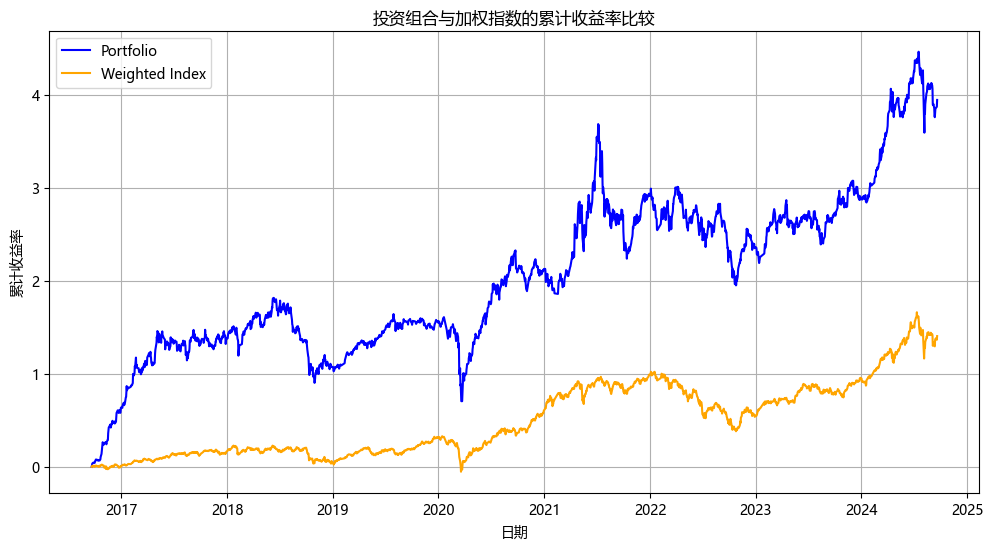

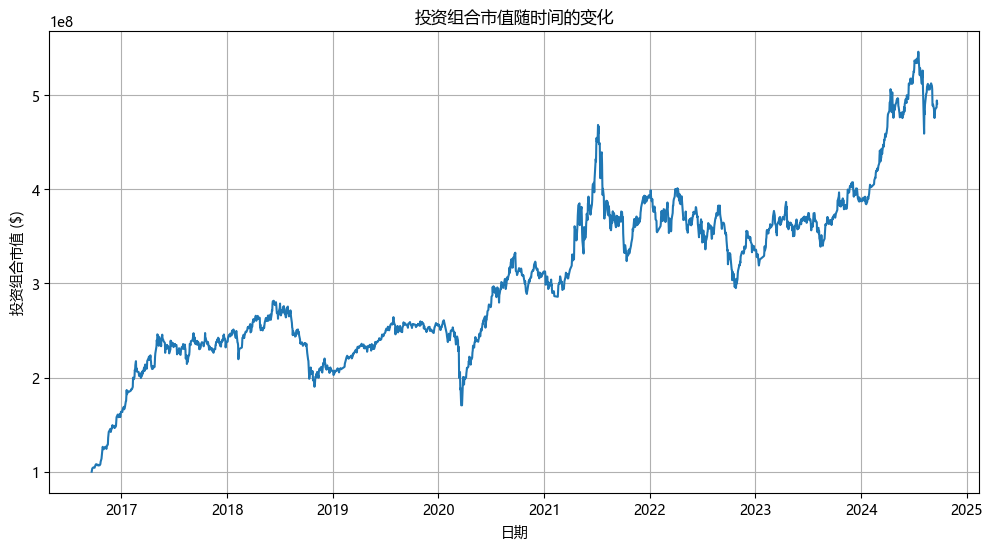

In [39]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 读取数据
df = pd.read_csv('盤後調整價.csv')

# 设置 'Date' 为索引并转换为日期类型
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

# 前向填充缺失数据
df_filtered.fillna(method='ffill', inplace=True)

# 后向填充，以防前向填充无法填充初始的 NaN 值
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列
df_filtered.dropna(axis=0, how='any', inplace=True)
df_filtered.dropna(axis=1, how='any', inplace=True)

# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
    exit()

# 设置投资组合初始资金
initial_portfolio_value = 100000000  # 假设初始投资资金为100,000,000
portfolio_value = initial_portfolio_value

# 获取年份列表
years = df_filtered.index.year.unique()
years = sorted(years)

# 初始化持仓
current_allocation = {}
portfolio_value_per_day = pd.DataFrame(index=df_filtered.index)

for i, year in enumerate(years):
    print(f"Processing year: {year}")
    # 获取该年的数据
    year_data = df_filtered[df_filtered.index.year == year]

    # 检查数据是否足够进行优化
    if year_data.shape[0] < 2 or year_data.shape[1] < 2:
        print(f"{year} 年的数据不足，跳过该年。")
        continue

    # 定义用于计算预期收益率和协方差矩阵的历史数据范围
    if i == 0:
        historical_data = year_data
    else:
        # 使用过去一年的数据作为历史数据
        historical_data = df_filtered[df_filtered.index.year == year - 1]

    # 再次检查历史数据是否足够
    if historical_data.shape[0] < 2 or historical_data.shape[1] < 2:
        print(f"{year} 年的历史数据不足，跳过该年。")
        continue

    # 计算预期收益率和协方差矩阵，基于历史数据
    mu = expected_returns.mean_historical_return(historical_data)
    S = risk_models.CovarianceShrinkage(historical_data).ledoit_wolf()

    # 使用最大夏普比率进行优化
    try:
        ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), solver='ECOS')
        ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # 添加 L2 正则化
        weights = ef.max_sharpe()
        # 清理权重并输出
        cleaned_weights = ef.clean_weights()
        print(f"Optimal weights for year {year}:")
        print(cleaned_weights)
    except Exception as e:
        print(f"{year} 年求解时出错: {e}")
        continue

    # 获取该年最早的交易日价格
    earliest_prices = year_data.iloc[0]

    # 确保 earliest_prices 是 Series 格式，删除任何 NaN 值
    earliest_prices = earliest_prices.dropna()

    # 过滤掉权重为零的股票，只保留权重大于零的股票
    non_zero_weights = {stock: weight for stock, weight in cleaned_weights.items() if weight > 0}

    # 过滤有效的股票价格，确保权重和价格匹配
    valid_weights = {stock: weight for stock, weight in non_zero_weights.items() if stock in earliest_prices.index}
    valid_prices = earliest_prices[earliest_prices.index.isin(valid_weights.keys())]

    # 计算目标持仓金额
    total_portfolio_value = portfolio_value  # 使用当前的组合价值
    target_allocations = {stock: weight * total_portfolio_value for stock, weight in valid_weights.items()}

    # 计算目标持仓股票数量
    target_shares = {stock: target_allocations[stock] / valid_prices[stock] for stock in valid_weights}

    # 调整持仓
    # 计算需要买入或卖出的股票数量
    adjustments = {}
    for stock in target_shares:
        current_shares = current_allocation.get(stock, 0)
        delta_shares = target_shares[stock] - current_shares
        if delta_shares > 0:
            print(f"Year {year}: Need to buy {delta_shares:.2f} shares of {stock}")
        elif delta_shares < 0:
            print(f"Year {year}: Need to sell {-delta_shares:.2f} shares of {stock}")
        adjustments[stock] = delta_shares

    # 更新 current_allocation
    for stock in target_shares:
        current_allocation[stock] = target_shares[stock]

    # 更新 portfolio_value
    # 假设没有交易成本
    # 执行调整
    for stock, delta_shares in adjustments.items():
        # Adjust the cash position
        cash_adjustment = -delta_shares * valid_prices[stock]
        portfolio_value += cash_adjustment

    # 移除已经不再持有的股票
    stocks_to_remove = [stock for stock in current_allocation if stock not in target_shares]
    for stock in stocks_to_remove:
        # 卖出全部持仓
        sell_shares = current_allocation[stock]
        sell_price = valid_prices.get(stock, year_data.iloc[0].get(stock))
        if sell_price is not None:
            portfolio_value += sell_shares * sell_price
            print(f"Year {year}: Need to sell all shares of {stock} ({sell_shares:.2f} shares)")
        del current_allocation[stock]

    # 计算该年的每日投资组合市值
    # 只选择有持仓的股票
    held_stocks = list(current_allocation.keys())
    year_prices = year_data[held_stocks]

    # 计算每日的投资组合市值
    daily_portfolio_value = (year_prices * pd.Series(current_allocation)).sum(axis=1)

    # 更新 portfolio_value_per_day
    portfolio_value_per_day.loc[year_data.index, 'Total'] = daily_portfolio_value

    # 更新 portfolio_value 为该年最后一天的投资组合市值
    portfolio_value = daily_portfolio_value.iloc[-1]

# 填充缺失的投资组合市值（如果有）
portfolio_value_per_day['Total'].fillna(method='ffill', inplace=True)

# 计算期间收益和收益率
initial_investment = initial_portfolio_value
final_portfolio_value = portfolio_value_per_day['Total'].iloc[-1]
portfolio_return = final_portfolio_value - initial_investment  # 期间收益
portfolio_return_rate = portfolio_return / initial_investment  # 期间收益率

# 输出结果
print("初始投资: $", initial_investment)
print("最终投资组合市值: $", final_portfolio_value)
print("期间收益: $", portfolio_return)
print("期间收益率: {:.2%}".format(portfolio_return_rate))

# 计算投资组合的每日收益率
portfolio_value_per_day['Returns'] = portfolio_value_per_day['Total'].pct_change().fillna(0)

# 计算投资组合的累计收益率
portfolio_value_per_day['Cumulative Returns'] = (1 + portfolio_value_per_day['Returns']).cumprod() - 1

# 下载指数数据
index_ticker = "^TWII"  # 替换成你需要的加权指数代码
index_data = yf.download(index_ticker, start=df_filtered.index[0], end=df_filtered.index[-1])

# 计算加权指数的每日收益率
index_data['Returns'] = index_data['Adj Close'].pct_change().fillna(0)

# 计算加权指数的累计收益率
index_data['Cumulative Returns'] = (1 + index_data['Returns']).cumprod() - 1

# 合并投资组合和加权指数的累计收益率，确保日期对齐
comparison_data = pd.DataFrame({
    'Portfolio Cumulative Returns': portfolio_value_per_day['Cumulative Returns'],
    'Index Cumulative Returns': index_data['Cumulative Returns']
}).dropna()

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# 绘制对比图
plt.figure(figsize=(12, 6))
plt.plot(comparison_data.index, comparison_data['Portfolio Cumulative Returns'], label='Portfolio', color='blue')
plt.plot(comparison_data.index, comparison_data['Index Cumulative Returns'], label='Weighted Index', color='orange')
plt.title('投资组合与加权指数的累计收益率比较')
plt.xlabel('日期')
plt.ylabel('累计收益率')
plt.legend()
plt.grid(True)
plt.show()

# 可视化投资组合市值随时间的变化
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_per_day.index, portfolio_value_per_day['Total'])
plt.title('投资组合市值随时间的变化')
plt.xlabel('日期')
plt.ylabel('投资组合市值 ($)')
plt.grid(True)
plt.show()


C:\Users\asas9\AppData\Local\Temp\ipykernel_1568\2712628409.py:8: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')


以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64

Processing year: 2016
2016 年的历史数据不足，跳过该年。

Processing year: 2017
2017 年的历史数据不足，跳过该年。

Processing year: 2018


C:\Users\asas9\AppData\Local\Temp\ipykernel_1568\2712628409.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_1568\2712628409.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='bfill', inplace=True)
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning wh

Optimal weights for year 2018:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.02039, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.00069, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01112, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0031, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.00614, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00447, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2019:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.02876, '1227': 0.0, '1229': 0.0, '1231': 0.00979, '1232': 0.01855, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01401, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2020:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.01922, '1104': 0.0, '1108': 0.0, '1109': 0.01357, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.00995, '1232': 0.0181, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.05697, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01317, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2021:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.02691, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.00303, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.04424, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01524, '1432': 0.0, '1434': 0.0, '1435': 0.03083, '1436': 0.0, '1437': 0.0, '1438': 0.0021, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2022:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.05235, '1231': 0.06438, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.00931, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01088, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01487, '1432': 0.0, '1434': 0.0, '1435': 0.03456, '1436': 0.00748, '1437': 0.0, '1438': 0.00158, '1439': 0.0, '1440': 0.0, '1441': 0.0, '

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2023:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.08366, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04708, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.03139, '1342': 0.03601, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.03173, '1432': 0.0, '1434': 0.0, '1435': 0.04349, '1436': 0.03763, '1437': 0.0, '1438': 0.0035, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)
C:\Users\asas9\AppData\Local\Temp\ipykernel_1568\2712628409.py:203: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Optimal weights for year 2024:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.01269, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00144, '1231': 0.05639, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.03004, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00583, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00048, '1419': 0.0, '1423': 0.03185, '1432': 0.0, '1434': 0.0, '1435': 0.02591, '1436': 0.08504, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.

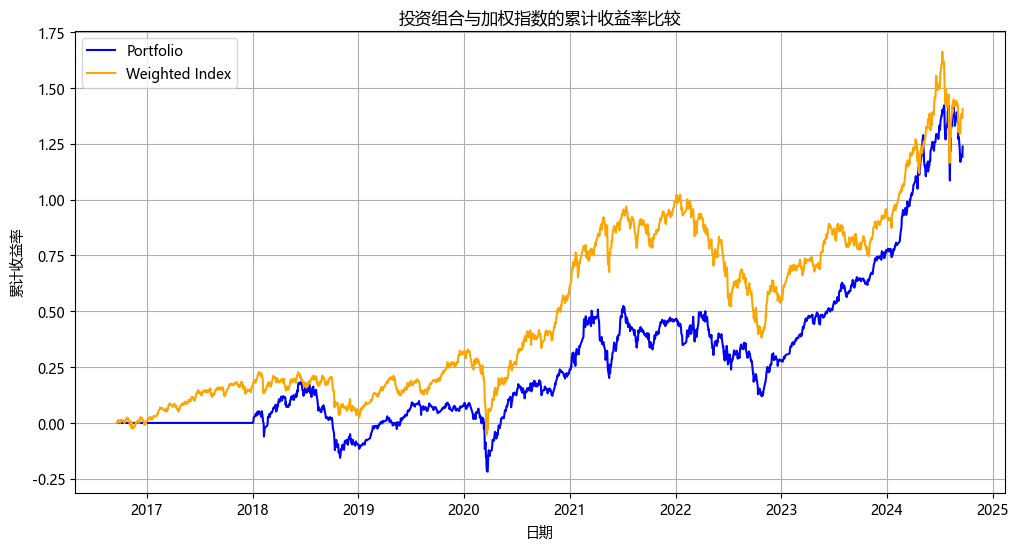

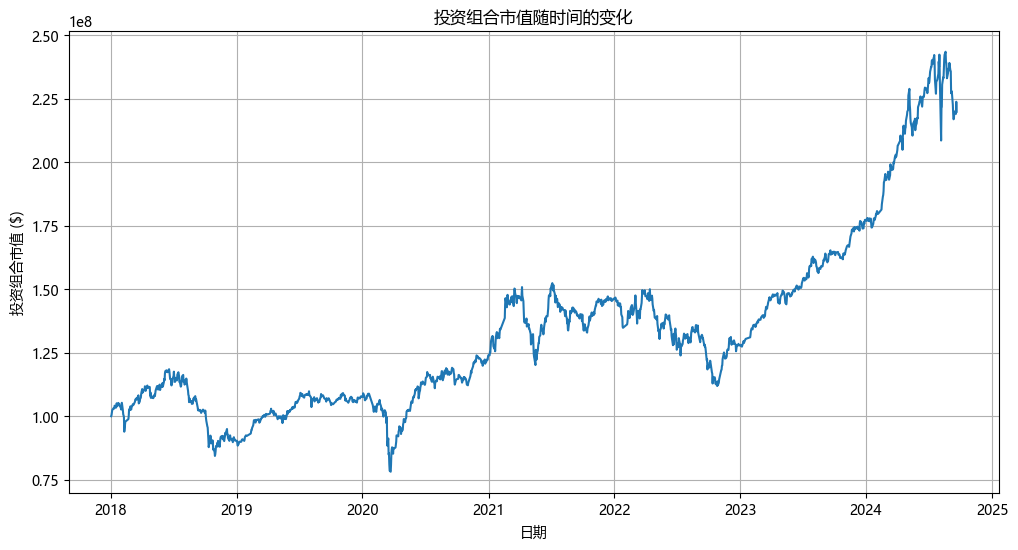

In [3]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
# 读取股票价格数据
df = pd.read_csv('盤後調整價.csv')

# 设置 'Date' 为索引并转换为日期类型
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

# 获取所有股票的列表
all_stocks = df_filtered.columns.tolist()

# 创建一个字典来保存每只股票的上市日期
stock_listing_dates = {}

for stock in all_stocks:
    # 获取该股票的价格数据
    stock_prices = df_filtered[stock]
    
    # 找到第一个非 NaN 的日期
    first_valid_index = stock_prices.first_valid_index()
    
    if first_valid_index is not None:
        stock_listing_dates[stock] = first_valid_index
    else:
        # 如果股票全是 NaN，删除该股票
        print(f"股票 {stock} 全是 NaN，已被排除。")
        df_filtered.drop(columns=[stock], inplace=True)

# 在填充数据之前，确保在上市日期之前的价格为 NaN
for stock, listing_date in stock_listing_dates.items():
    # 将上市日期之前的价格设置为 NaN
    df_filtered.loc[df_filtered.index < listing_date, stock] = np.nan

# 然后进行前向和后向填充
df_filtered.fillna(method='ffill', inplace=True)
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列（可选）
df_filtered.dropna(axis=0, how='all', inplace=True)
df_filtered.dropna(axis=1, how='all', inplace=True)

# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
    exit()

# 设置投资组合初始资金
initial_portfolio_value = 100000000  # 假设初始投资资金为100,000,000
portfolio_value = initial_portfolio_value

# 获取年份列表并排序
years = df_filtered.index.year.unique()
years = sorted(years)

# 定义数据的开始日期
data_start_date = pd.Timestamp('2016-09-01')

# 初始化持仓
current_allocation = {}
portfolio_value_per_day = pd.DataFrame(index=df_filtered.index)
portfolio_value_per_day['Total'] = np.nan  # 初始化为NaN

for year in years:
    print(f"\nProcessing year: {year}")
    
    # 定义当前年的开始和结束日期
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)
    
    # 历史数据的起始和结束日期
    historical_start = data_start_date
    historical_end = start_date - pd.Timedelta(days=1)
    
    # 如果历史数据结束日期早于起始日期，跳过该年
    if historical_end < historical_start:
        print(f"{year} 年的历史数据不足，跳过该年。")
        continue
    
    # 获取在历史数据结束日期之前已上市的股票列表
    available_stocks = [stock for stock, listing_date in stock_listing_dates.items() if listing_date <= historical_end]
    
    # 获取历史数据，并只包含已上市的股票
    historical_data = df_filtered.loc[historical_start:historical_end, available_stocks]
    
    # 检查历史数据是否足够进行优化
    if historical_data.shape[0] < 100 or historical_data.shape[1] < 2:
        print(f"{year} 年的历史数据不足，跳过该年。")
        continue
    
    # 计算预期收益率和协方差矩阵，基于累积的历史数据
    mu = expected_returns.mean_historical_return(historical_data)
    S = risk_models.CovarianceShrinkage(historical_data).ledoit_wolf()
    
    # 使用最大夏普比率进行优化
    try:
        ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), solver='ECOS')
        weights = ef.max_sharpe()
        cleaned_weights = ef.clean_weights()
        print(f"Optimal weights for year {year}:")
        print(cleaned_weights)
    except Exception as e:
        print(f"{year} 年求解时出错: {e}")
        continue
    
    # 获取该年最早的交易日价格，只包含已上市的股票
    try:
        year_prices = df_filtered.loc[start_date:end_date, available_stocks]
        earliest_prices = year_prices.iloc[0]
    except IndexError:
        print(f"{year} 年没有足够的交易日，跳过该年。")
        continue
    
    # 确保 earliest_prices 是 Series 格式，删除任何 NaN 值
    earliest_prices = earliest_prices.dropna()
    
    # 过滤掉权重为零的股票，只保留权重大于零的股票
    non_zero_weights = {stock: weight for stock, weight in cleaned_weights.items() if weight > 0}
    
    # 过滤有效的股票价格，确保权重和价格匹配
    valid_weights = {stock: weight for stock, weight in non_zero_weights.items() if stock in earliest_prices.index}
    valid_prices = earliest_prices[earliest_prices.index.isin(valid_weights.keys())]
    
    # 计算目标持仓金额
    total_portfolio_value = portfolio_value  # 使用当前的组合价值
    target_allocations = {stock: weight * total_portfolio_value for stock, weight in valid_weights.items()}
    
    # 计算目标持仓股票数量
    target_shares = {stock: target_allocations[stock] / valid_prices[stock] for stock in valid_weights}
    
    # 调整持仓
    adjustments = {}
    for stock in target_shares:
        current_shares = current_allocation.get(stock, 0)
        delta_shares = target_shares[stock] - current_shares
        if delta_shares > 0:
            print(f"Year {year}: Need to buy {delta_shares:.2f} shares of {stock}")
        elif delta_shares < 0:
            print(f"Year {year}: Need to sell {-delta_shares:.2f} shares of {stock}")
        adjustments[stock] = delta_shares
    
    # 更新 current_allocation
    for stock in target_shares:
        current_allocation[stock] = target_shares[stock]
    
    # 更新 portfolio_value
    # 假设没有交易成本
    for stock, delta_shares in adjustments.items():
        cash_adjustment = -delta_shares * valid_prices[stock]
        portfolio_value += cash_adjustment
    
    # 移除已经不再持有的股票
    stocks_to_remove = [stock for stock in current_allocation if stock not in target_shares]
    for stock in stocks_to_remove:
        sell_shares = current_allocation[stock]
        sell_price = valid_prices.get(stock, df_filtered.loc[start_date:end_date][stock].dropna().iloc[0])
        if not np.isnan(sell_price):
            portfolio_value += sell_shares * sell_price
            print(f"Year {year}: Need to sell all shares of {stock} ({sell_shares:.2f} shares)")
        del current_allocation[stock]
    
    # 计算该年的每日投资组合市值
    held_stocks = list(current_allocation.keys())
    if not held_stocks:
        print(f"Year {year}: No holdings after adjustment.")
        continue
    
    year_prices = df_filtered.loc[start_date:end_date, held_stocks]
    
    # 计算每日的投资组合市值
    daily_portfolio_value = (year_prices * pd.Series(current_allocation)).sum(axis=1)
    
    # 更新 portfolio_value_per_day
    portfolio_value_per_day.loc[start_date:end_date, 'Total'] = daily_portfolio_value
    
    # 更新 portfolio_value 为该年最后一天的投资组合市值
    if not daily_portfolio_value.empty:
        portfolio_value = daily_portfolio_value.iloc[-1]

# 填充缺失的投资组合市值（如果有）
portfolio_value_per_day['Total'].fillna(method='ffill', inplace=True)

# 计算期间收益和收益率
initial_investment = initial_portfolio_value
final_portfolio_value = portfolio_value_per_day['Total'].iloc[-1]
portfolio_return = final_portfolio_value - initial_investment  # 期间收益
portfolio_return_rate = portfolio_return / initial_investment  # 期间收益率

# 输出结果
print("\n=== 回测结果 ===")
print("初始投资: $", initial_investment)
print("最终投资组合市值: $", final_portfolio_value)
print("期间收益: $", portfolio_return)
print("期间收益率: {:.2%}".format(portfolio_return_rate))

# 计算投资组合的每日收益率
portfolio_value_per_day['Returns'] = portfolio_value_per_day['Total'].pct_change().fillna(0)

# 计算投资组合的累计收益率
portfolio_value_per_day['Cumulative Returns'] = (1 + portfolio_value_per_day['Returns']).cumprod() - 1

# 下载指数数据
index_ticker = "^TWII"  # 替换成你需要的加权指数代码
index_data = yf.download(index_ticker, start=df_filtered.index[0], end=df_filtered.index[-1])

# 计算加权指数的每日收益率
index_data['Returns'] = index_data['Adj Close'].pct_change().fillna(0)

# 计算加权指数的累计收益率
index_data['Cumulative Returns'] = (1 + index_data['Returns']).cumprod() - 1

# 合并投资组合和加权指数的累计收益率，确保日期对齐
comparison_data = pd.concat([
    portfolio_value_per_day['Cumulative Returns'],
    index_data['Cumulative Returns']
], axis=1, join='inner').dropna()

comparison_data.columns = ['Portfolio Cumulative Returns', 'Index Cumulative Returns']

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 绘制对比图
plt.figure(figsize=(12, 6))
plt.plot(comparison_data.index, comparison_data['Portfolio Cumulative Returns'], label='Portfolio', color='blue')
plt.plot(comparison_data.index, comparison_data['Index Cumulative Returns'], label='Weighted Index', color='orange')
plt.title('投资组合与加权指数的累计收益率比较')
plt.xlabel('日期')
plt.ylabel('累计收益率')
plt.legend()
plt.grid(True)
plt.show()

# 可视化投资组合市值随时间的变化
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_per_day.index, portfolio_value_per_day['Total'])
plt.title('投资组合市值随时间的变化')
plt.xlabel('日期')
plt.ylabel('投资组合市值 ($)')
plt.grid(True)
plt.show()


C:\Users\asas9\AppData\Local\Temp\ipykernel_1568\3819291952.py:8: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')


以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64

Processing month: 2016-10
2016-10 的历史数据不足（7 个交易日，859 只股票），跳过该月。

Processing month: 2016-11
2016-11 的历史数据不足（27 个交易日，861 只股票），跳过该月。

Processing month: 2016-12
2016-12 的历史数据不足（49 个交易日，865 只股票），跳过该月。

Processing month: 2017-01
2017-01 的历史数据不足（71 个交易日，869 只股票），跳过该月。

Processing month: 2017-02
2017-02 的历史数据不足（87 个交易日，870 只股票），跳过该月。

Processing month: 2017-03


C:\Users\asas9\AppData\Local\Temp\ipykernel_1568\3819291952.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_1568\3819291952.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='bfill', inplace=True)
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning wh

Optimal weights for 2017-03:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.00505, '1203': 0.0, '1210': 0.0, '1213': 0.00632, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0023, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.02337, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.00934, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0081, '1418': 0.0255, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.00727, '1436': 0.003, '1437': 0.0, '1438': 0.01006, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2017-04:
OrderedDict({'1101': 0.0, '1102': 0.0108, '1103': 0.00916, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.00064, '1203': 0.0, '1210': 0.0, '1213': 0.00549, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0162, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.00152, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.01854, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.00015, '1418': 0.02086, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0051, '1437': 0.0, '1438': 0.00573, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2017-05:
OrderedDict({'1101': 0.0, '1102': 0.00042, '1103': 0.0358, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.00853, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.02675, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.02345, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.00225, '1437': 0.0, '1438': 0.00024, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2017-06:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.01263, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.00247, '1203': 0.0, '1210': 0.0, '1213': 0.01568, '1215': 0.00364, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0145, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.02794, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.02908, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0103, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2017-07:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.01387, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.00612, '1215': 0.02766, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.00453, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.01769, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00965, '1419': 0.0, '1423': 0.0, '1432': 0.00484, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2017-08:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.00071, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.03427, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.00555, '1227': 0.0, '1229': 0.0, '1231': 0.00756, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.02589, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.00408, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.01122, '1419': 0.0, '1423': 0.0, '1432': 0.00348, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2017-09:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.01547, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.02718, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.00399, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.01739, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00792, '1419': 0.0, '1423': 0.0, '1432': 0.0086, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2017-10:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.00641, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.00415, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01617, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.00816, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00797, '1419': 0.0, '1423': 0.0, '1432': 0.00083, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00359, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2017-11:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.00047, '1104': 0.0, '1108': 0.0, '1109': 0.00311, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.00163, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01197, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00344, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0052, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2017-12:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0054, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0114, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.00745, '1227': 0.0, '1229': 0.00082, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00123, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00035, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0, 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-01:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.02039, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.00069, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01112, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0031, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.00614, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00447, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-02:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.01953, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.00975, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.00786, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.01187, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00533, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-03:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.00119, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.00107, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0374, '1227': 0.0, '1229': 0.00034, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.01462, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.00595, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.01999, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-04:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.03453, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.01891, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.00822, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00368, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0, '1445'

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-05:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.03964, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.02206, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.00392, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00278, '1439': 0.01444, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-06:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.03058, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.01395, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.00744, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0011, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0, '1445':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-07:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.00738, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.03016, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.00147, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.00053, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.00235, '1423': 0.00554, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0096, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-08:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.01841, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.03769, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0017, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.00385, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.00479, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.00625, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00974, '1439': 0.0, '1440': 0.0, '1441': 0.00253, '1442': 0.0, '1443': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-09:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0179, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.03237, '1227': 0.0, '1229': 0.01727, '1231': 0.0, '1232': 0.00715, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.00068, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.01057, '1409': 0.0, '1410': 0.0, '1413': 0.01208, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01221, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-10:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.00967, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.00411, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.03141, '1227': 0.0, '1229': 0.00326, '1231': 0.0, '1232': 0.01968, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0123, '1303': 0.00031, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0017, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.00492, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01478, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-11:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0076, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.03068, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.02665, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.02267, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0, '1445':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2018-12:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.03069, '1227': 0.0, '1229': 0.0, '1231': 0.00296, '1232': 0.01757, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01287, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444': 0.0, '1445'

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-01:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.02876, '1227': 0.0, '1229': 0.0, '1231': 0.00979, '1232': 0.01855, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01401, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444'

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-02:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.02662, '1227': 0.0, '1229': 0.0, '1231': 0.02239, '1232': 0.02291, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01043, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444'

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-03:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.02192, '1227': 0.0, '1229': 0.0, '1231': 0.02733, '1232': 0.0195, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.00091, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01134, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-04:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01514, '1227': 0.0, '1229': 0.0, '1231': 0.03332, '1232': 0.01991, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.00236, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01775, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-05:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0058, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01462, '1227': 0.0, '1229': 0.0, '1231': 0.03485, '1232': 0.02889, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.00905, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01433, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-06:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0124, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01111, '1227': 0.0, '1229': 0.0, '1231': 0.03623, '1232': 0.03694, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.01389, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01046, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-07:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0145, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01164, '1227': 0.0, '1229': 0.0, '1231': 0.03555, '1232': 0.06517, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.00743, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01399, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-08:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.00911, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00504, '1231': 0.02799, '1232': 0.04418, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.00961, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0156, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-09:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.03499, '1232': 0.04368, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.00417, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01828, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444'

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-10:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.00393, '1104': 0.0, '1108': 0.0, '1109': 0.00708, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0221, '1232': 0.04049, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.01008, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0172, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-11:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.00752, '1104': 0.0, '1108': 0.0, '1109': 0.00697, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.01432, '1232': 0.03964, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.02993, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0159, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2019-12:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.00792, '1104': 0.0, '1108': 0.0, '1109': 0.00627, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.00736, '1232': 0.03067, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.06139, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01535, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-01:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.01922, '1104': 0.0, '1108': 0.0, '1109': 0.01357, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.00995, '1232': 0.0181, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.05697, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01317, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-02:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.00884, '1104': 0.0, '1108': 0.0, '1109': 0.00296, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0033, '1232': 0.02509, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.05744, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.00471, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01435, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-03:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.00659, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00038, '1231': 0.01367, '1232': 0.03366, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.04203, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.05262, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01278, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-04:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00454, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.05277, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.11287, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.00434, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01234, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-05:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.01527, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.03569, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.20047, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.00991, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00651, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-06:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.03668, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.19343, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.00513, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00618, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444'

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-07:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.00317, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.16775, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00774, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.05404, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00813, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-08:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.00856, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.13972, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01847, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00744, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1444'

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-09:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.01604, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00299, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.00484, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.09425, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01652, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00329, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-10:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.02026, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.08615, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01598, '1432': 0.0, '1434': 0.0, '1435': 0.01553, '1436': 0.0, '1437': 0.0, '1438': 0.01061, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-11:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.04999, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.08364, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01199, '1432': 0.0, '1434': 0.0, '1435': 0.03538, '1436': 0.0, '1437': 0.0, '1438': 0.0052, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2020-12:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.04115, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.06198, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.017, '1432': 0.0, '1434': 0.0, '1435': 0.03437, '1436': 0.0, '1437': 0.0, '1438': 0.00377, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-01:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.02691, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.00303, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.04424, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01524, '1432': 0.0, '1434': 0.0, '1435': 0.03083, '1436': 0.0, '1437': 0.0, '1438': 0.0021, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-02:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.02124, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.04535, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01239, '1432': 0.0, '1434': 0.0, '1435': 0.03377, '1436': 0.0, '1437': 0.0, '1438': 0.00327, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-03:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.01496, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.04037, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01587, '1432': 0.0, '1434': 0.0, '1435': 0.0236, '1436': 0.0, '1437': 0.0, '1438': 0.00206, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-04:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.01459, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0202, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0432, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0121, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.02893, '1432': 0.0, '1434': 0.0, '1435': 0.01451, '1436': 0.0, '1437': 0.0, '1438': 0.00533, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-05:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.00264, '1232': 0.04783, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.03937, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.06212, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.02916, '1432': 0.0, '1434': 0.0, '1435': 0.01809, '1436': 0.0, '1437': 0.0, '1438': 0.00762, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-06:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.04671, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.05532, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02879, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01977, '1432': 0.0, '1434': 0.0, '1435': 0.00526, '1436': 0.0, '1437': 0.0, '1438': 0.00215, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-07:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0393, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.05811, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02735, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01058, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-08:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00141, '1231': 0.0873, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.00301, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.03777, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.04079, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01837, '1432': 0.0, '1434': 0.0, '1435': 0.00697, '1436': 0.0, '1437': 0.0, '1438': 0.00157, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-09:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.10626, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.03152, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02177, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01453, '1432': 0.0, '1434': 0.0, '1435': 0.01509, '1436': 0.0, '1437': 0.0, '1438': 0.00305, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-10:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.04664, '1231': 0.07912, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.01576, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01608, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01484, '1432': 0.0, '1434': 0.0, '1435': 0.01634, '1436': 0.0, '1437': 0.0, '1438': 0.00428, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-11:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.04917, '1231': 0.07232, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0107, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01148, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01008, '1432': 0.0, '1434': 0.0, '1435': 0.02655, '1436': 0.0, '1437': 0.0, '1438': 0.0051, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2021-12:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.04395, '1231': 0.07074, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.01059, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00416, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01876, '1432': 0.0, '1434': 0.0, '1435': 0.03233, '1436': 0.01001, '1437': 0.0, '1438': 0.00314, '1439': 0.0, '1440': 0.0, '1441': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-01:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.05235, '1231': 0.06438, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.00931, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01088, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01487, '1432': 0.0, '1434': 0.0, '1435': 0.03456, '1436': 0.00748, '1437': 0.0, '1438': 0.00158, '1439': 0.0, '1440': 0.0, '1441': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-02:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0617, '1231': 0.0751, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.00615, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01343, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01971, '1432': 0.0, '1434': 0.0, '1435': 0.03921, '1436': 0.03119, '1437': 0.0, '1438': 0.0021, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442'

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-03:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.07401, '1231': 0.08997, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01176, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01601, '1432': 0.0, '1434': 0.0, '1435': 0.0697, '1436': 0.02501, '1437': 0.0, '1438': 0.00174, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-04:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.04203, '1231': 0.0877, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02964, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01656, '1432': 0.0, '1434': 0.0, '1435': 0.04874, '1436': 0.04306, '1437': 0.0, '1438': 0.00165, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-05:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.01204, '1231': 0.12959, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.00171, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.03127, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.01817, '1432': 0.0, '1434': 0.0, '1435': 0.05597, '1436': 0.05482, '1437': 0.0, '1438': 0.00633, '1439': 0.0, '1440': 0.0, '1441': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-06:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.01749, '1231': 0.09639, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.00225, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02803, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0185, '1432': 0.0, '1434': 0.0, '1435': 0.04151, '1436': 0.05181, '1437': 0.0, '1438': 0.00638, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-07:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.01609, '1231': 0.12068, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0106, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02794, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.02893, '1432': 0.0, '1434': 0.0, '1435': 0.05652, '1436': 0.05924, '1437': 0.0, '1438': 0.00588, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-08:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0219, '1231': 0.08213, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.01314, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01492, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.02441, '1432': 0.0, '1434': 0.0, '1435': 0.04168, '1436': 0.04391, '1437': 0.0, '1438': 0.0056, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-09:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.01571, '1231': 0.06053, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.02659, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01681, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.02489, '1432': 0.0, '1434': 0.0, '1435': 0.03119, '1436': 0.0296, '1437': 0.0, '1438': 0.00482, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-10:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.01002, '1231': 0.07551, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04173, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02081, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.03629, '1432': 0.0, '1434': 0.0, '1435': 0.04273, '1436': 0.03837, '1437': 0.0, '1438': 0.008, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-11:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00547, '1231': 0.07328, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.05386, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.03021, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.03864, '1432': 0.0, '1434': 0.0, '1435': 0.0483, '1436': 0.03615, '1437': 0.0, '1438': 0.00434, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2022-12:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00338, '1231': 0.07767, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04802, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.03442, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.03253, '1432': 0.0, '1434': 0.0, '1435': 0.04059, '1436': 0.03738, '1437': 0.0, '1438': 0.00191, '1439': 0.0, '1440': 0.0, '1441': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-01:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.08366, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04708, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.03139, '1342': 0.03601, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.03173, '1432': 0.0, '1434': 0.0, '1435': 0.04349, '1436': 0.03763, '1437': 0.0, '1438': 0.0035, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-02:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.08645, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04284, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0293, '1342': 0.01138, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.02823, '1432': 0.0, '1434': 0.0, '1435': 0.0384, '1436': 0.02245, '1437': 0.0, '1438': 0.00268, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-03:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.08952, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.03636, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02569, '1342': 0.04328, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.02407, '1432': 0.0, '1434': 0.0, '1435': 0.03569, '1436': 0.01421, '1437': 0.0, '1438': 0.0019, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-04:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.08202, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.03278, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02672, '1342': 0.03951, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.02115, '1432': 0.0, '1434': 0.0, '1435': 0.01592, '1436': 0.01484, '1437': 0.0, '1438': 0.0006, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-05:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.07884, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.03144, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02418, '1342': 0.02425, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.02302, '1432': 0.0, '1434': 0.0, '1435': 0.01114, '1436': 0.01422, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-06:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00067, '1231': 0.07973, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04221, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.03287, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.03469, '1432': 0.0, '1434': 0.0, '1435': 0.00997, '1436': 0.01915, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-07:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00971, '1231': 0.07978, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04073, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02643, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00047, '1419': 0.0, '1423': 0.03348, '1432': 0.0, '1434': 0.0, '1435': 0.00693, '1436': 0.01951, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-08:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00013, '1231': 0.07826, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.03743, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0209, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00015, '1419': 0.0, '1423': 0.03186, '1432': 0.0, '1434': 0.0, '1435': 0.00741, '1436': 0.03607, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-09:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.06844, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.03698, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01894, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00179, '1419': 0.0, '1423': 0.03132, '1432': 0.0, '1434': 0.0, '1435': 0.00965, '1436': 0.05046, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-10:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.07231, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04235, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.02204, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0015, '1419': 0.0, '1423': 0.03142, '1432': 0.0, '1434': 0.0, '1435': 0.02723, '1436': 0.04767, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-11:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.07468, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04465, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01078, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00089, '1419': 0.0, '1423': 0.03721, '1432': 0.0, '1434': 0.0, '1435': 0.01939, '1436': 0.05928, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442':

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2023-12:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00645, '1231': 0.06067, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04217, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00658, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0005, '1419': 0.0, '1423': 0.03348, '1432': 0.0, '1434': 0.0, '1435': 0.01529, '1436': 0.06933, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2024-01:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.01269, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00144, '1231': 0.05639, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.03004, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00583, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00048, '1419': 0.0, '1423': 0.03185, '1432': 0.0, '1434': 0.0, '1435': 0.02591, '1436': 0.08504, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0,

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2024-02:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.00655, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.04979, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.02969, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00409, '1419': 0.0, '1423': 0.02412, '1432': 0.0, '1434': 0.0, '1435': 0.0237, '1436': 0.07815, '1437': 0.0, '1438': 0.00492, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2024-03:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.00078, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.04327, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.02632, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00307, '1419': 0.0, '1423': 0.02263, '1432': 0.0, '1434': 0.0, '1435': 0.0195, '1436': 0.07745, '1437': 0.0, '1438': 0.00581, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2024-04:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.04926, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.02488, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00506, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00442, '1419': 0.0, '1423': 0.02255, '1432': 0.0, '1434': 0.0, '1435': 0.01894, '1436': 0.10222, '1437': 0.0, '1438': 0.00608, '1439': 0.0, '1440': 0.0, '1441': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2024-05:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.049, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.02602, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00636, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00454, '1419': 0.0, '1423': 0.02484, '1432': 0.0, '1434': 0.0, '1435': 0.01542, '1436': 0.13318, '1437': 0.0, '1438': 0.00579, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2024-06:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0608, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.03399, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01739, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00264, '1419': 0.0, '1423': 0.04056, '1432': 0.0, '1434': 0.0, '1435': 0.01567, '1436': 0.11335, '1437': 0.0, '1438': 0.00699, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2024-07:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.06967, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.03465, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01725, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00332, '1419': 0.0, '1423': 0.05582, '1432': 0.0, '1434': 0.0, '1435': 0.0127, '1436': 0.11468, '1437': 0.0, '1438': 0.00867, '1439': 0.0, '1440': 0.0, '1441': 0.0, '144

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for 2024-08:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.07732, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.04224, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.01618, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.00402, '1419': 0.0, '1423': 0.05896, '1432': 0.0, '1434': 0.0, '1435': 0.01392, '1436': 0.13021, '1437': 0.0, '1438': 0.01513, '1439': 0.0, '1440': 0.0, '1441': 0.0, '14

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)
C:\Users\asas9\AppData\Local\Temp\ipykernel_1568\3819291952.py:213: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Optimal weights for 2024-09:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.07936, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.06542, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0061, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.066, '1432': 0.0, '1434': 0.0, '1435': 0.0151, '1436': 0.10678, '1437': 0.0, '1438': 0.00944, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0

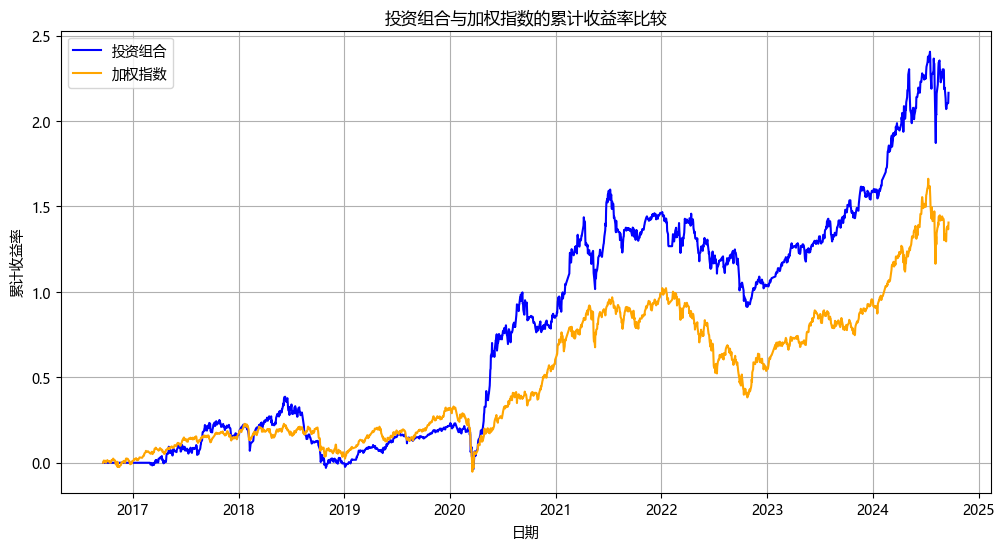

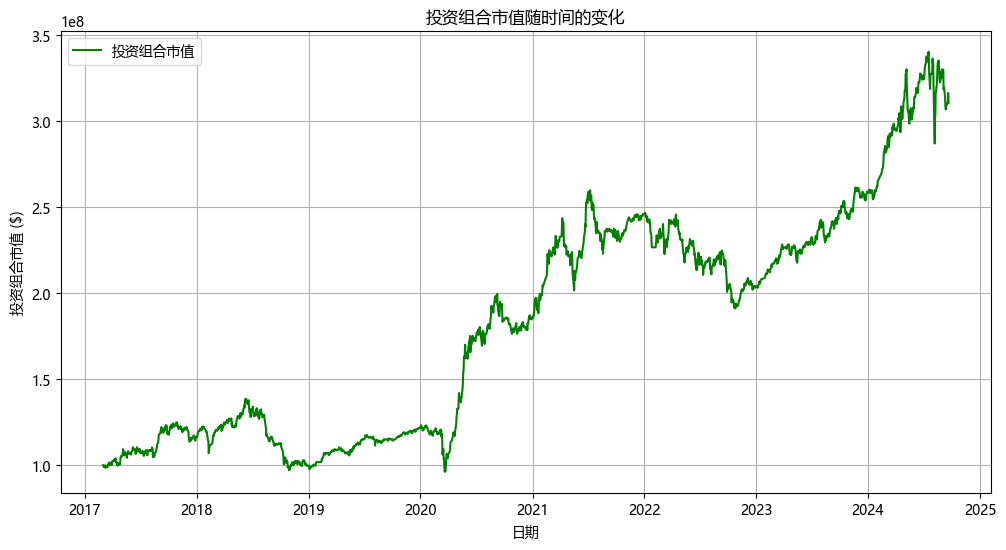

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
import yfinance as yf
# 读取股票价格数据
df = pd.read_csv('盤後調整價.csv')

# 设置 'Date' 为索引并转换为日期类型
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

# 移除有效数据点少于阈值的股票（例如，至少10个有效数据点）
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

# 获取所有股票的列表
all_stocks = df_filtered.columns.tolist()

# 创建一个字典来保存每只股票的上市日期
stock_listing_dates = {}

for stock in all_stocks:
    # 获取该股票的价格数据
    stock_prices = df_filtered[stock]
    
    # 找到第一个非 NaN 的日期
    first_valid_index = stock_prices.first_valid_index()
    
    if first_valid_index is not None:
        stock_listing_dates[stock] = first_valid_index
    else:
        # 如果股票全是 NaN，删除该股票
        print(f"股票 {stock} 全是 NaN，已被排除。")
        df_filtered.drop(columns=[stock], inplace=True)

# 在填充数据之前，确保在上市日期之前的价格为 NaN
for stock, listing_date in stock_listing_dates.items():
    # 将上市日期之前的价格设置为 NaN
    df_filtered.loc[df_filtered.index < listing_date, stock] = np.nan

# 然后进行前向和后向填充
df_filtered.fillna(method='ffill', inplace=True)
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列（可选）
df_filtered.dropna(axis=0, how='all', inplace=True)
df_filtered.dropna(axis=1, how='all', inplace=True)

# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
    exit()

# 设置投资组合初始资金
initial_portfolio_value = 100000000  # 假设初始投资资金为100,000,000
portfolio_value = initial_portfolio_value

# 获取所有月份的列表（每月的开始日期）
months = pd.date_range(start=df_filtered.index.min(), end=df_filtered.index.max(), freq='MS')

# 定义数据的开始日期（例如，2016年9月1日）
data_start_date = pd.Timestamp('2016-09-01')

# 初始化持仓
current_allocation = {}
portfolio_value_per_day = pd.DataFrame(index=df_filtered.index)
portfolio_value_per_day['Total'] = np.nan  # 初始化为NaN

for month_start in months:
    print(f"\nProcessing month: {month_start.strftime('%Y-%m')}")
    
    # 当前月份的结束日期
    month_end = month_start + pd.offsets.MonthEnd(0)
    
    # 历史数据的起始和结束日期
    historical_start = data_start_date
    historical_end = month_start - pd.Timedelta(days=1)
    
    # 如果历史数据结束日期早于起始日期，跳过该月
    if historical_end < historical_start:
        print(f"{month_start.strftime('%Y-%m')} 的历史数据不足，跳过该月。")
        continue
    
    # 获取在历史数据结束日期之前已上市的股票列表
    available_stocks = [stock for stock, listing_date in stock_listing_dates.items() if listing_date <= historical_end]
    
    if not available_stocks:
        print(f"{month_start.strftime('%Y-%m')} 没有可用的股票进行优化，跳过该月。")
        continue
    
    # 获取历史数据，并只包含已上市的股票
    historical_data = df_filtered.loc[historical_start:historical_end, available_stocks]
    
    # 检查历史数据是否足够进行优化（例如，至少100个交易日和至少2只股票）
    if historical_data.shape[0] < 100 or historical_data.shape[1] < 2:
        print(f"{month_start.strftime('%Y-%m')} 的历史数据不足（{historical_data.shape[0]} 个交易日，{historical_data.shape[1]} 只股票），跳过该月。")
        continue
    
    # 计算预期收益率和协方差矩阵，基于累积的历史数据
    mu = expected_returns.mean_historical_return(historical_data)
    S = risk_models.CovarianceShrinkage(historical_data).ledoit_wolf()
    
    # 使用最大夏普比率进行优化
    try:
        ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), solver='ECOS')
        weights = ef.max_sharpe()
        cleaned_weights = ef.clean_weights()
        print(f"Optimal weights for {month_start.strftime('%Y-%m')}:")
        print(cleaned_weights)
    except Exception as e:
        print(f"{month_start.strftime('%Y-%m')} 求解时出错: {e}")
        continue
    
    # 获取该月最早的交易日价格，只包含已上市的股票
    try:
        month_prices = df_filtered.loc[month_start:month_end, available_stocks]
        earliest_prices = month_prices.iloc[0]
    except IndexError:
        print(f"{month_start.strftime('%Y-%m')} 没有足够的交易日，跳过该月。")
        continue
    
    # 确保 earliest_prices 是 Series 格式，删除任何 NaN 值
    earliest_prices = earliest_prices.dropna()
    
    # 过滤掉权重为零的股票，只保留权重大于零的股票
    non_zero_weights = {stock: weight for stock, weight in cleaned_weights.items() if weight > 0}
    
    # 过滤有效的股票价格，确保权重和价格匹配
    valid_weights = {stock: weight for stock, weight in non_zero_weights.items() if stock in earliest_prices.index}
    valid_prices = earliest_prices[earliest_prices.index.isin(valid_weights.keys())]
    
    if not valid_weights:
        print(f"{month_start.strftime('%Y-%m')} 没有有效的权重分配，跳过该月。")
        continue
    
    # 计算目标持仓金额
    total_portfolio_value = portfolio_value  # 使用当前的组合价值
    target_allocations = {stock: weight * total_portfolio_value for stock, weight in valid_weights.items()}
    
    # 计算目标持仓股票数量
    target_shares = {stock: target_allocations[stock] / valid_prices[stock] for stock in valid_weights}
    
    # 调整持仓
    adjustments = {}
    for stock in target_shares:
        current_shares = current_allocation.get(stock, 0)
        delta_shares = target_shares[stock] - current_shares
        if delta_shares > 0:
            print(f"{month_start.strftime('%Y-%m')}: 需要买入 {delta_shares:.2f} 股的 {stock}")
        elif delta_shares < 0:
            print(f"{month_start.strftime('%Y-%m')}: 需要卖出 {-delta_shares:.2f} 股的 {stock}")
        adjustments[stock] = delta_shares
    
    # 更新 current_allocation
    for stock in target_shares:
        current_allocation[stock] = target_shares[stock]
    
    # 更新 portfolio_value（假设没有交易成本）
    for stock, delta_shares in adjustments.items():
        cash_adjustment = -delta_shares * valid_prices[stock]
        portfolio_value += cash_adjustment
    
    # 移除已经不再持有的股票
    stocks_to_remove = [stock for stock in current_allocation if stock not in target_shares]
    for stock in stocks_to_remove:
        sell_shares = current_allocation[stock]
        try:
            sell_price = valid_prices.get(stock, df_filtered.loc[month_start:month_end][stock].dropna().iloc[0])
            if not np.isnan(sell_price):
                portfolio_value += sell_shares * sell_price
                print(f"{month_start.strftime('%Y-%m')}: 需要卖出所有 {stock} 的 {sell_shares:.2f} 股")
        except IndexError:
            print(f"{month_start.strftime('%Y-%m')}: 无法找到 {stock} 的卖出价格，跳过卖出操作。")
        del current_allocation[stock]
    
    # 计算该月的每日投资组合市值
    held_stocks = list(current_allocation.keys())
    if not held_stocks:
        print(f"{month_start.strftime('%Y-%m')}: 调整后没有持仓，跳过市值计算。")
        continue
    
    try:
        month_prices = df_filtered.loc[month_start:month_end, held_stocks]
        daily_portfolio_value = (month_prices * pd.Series(current_allocation)).sum(axis=1)
    except Exception as e:
        print(f"{month_start.strftime('%Y-%m')}: 计算每日市值时出错: {e}")
        continue
    
    # 更新 portfolio_value_per_day
    portfolio_value_per_day.loc[month_start:month_end, 'Total'] = daily_portfolio_value
    
    # 更新 portfolio_value 为该月最后一天的投资组合市值
    if not daily_portfolio_value.empty:
        portfolio_value = daily_portfolio_value.iloc[-1]

# 填充缺失的投资组合市值（如果有）
portfolio_value_per_day['Total'].fillna(method='ffill', inplace=True)

# 计算期间收益和收益率
initial_investment = initial_portfolio_value
final_portfolio_value = portfolio_value_per_day['Total'].iloc[-1]
portfolio_return = final_portfolio_value - initial_investment  # 期间收益
portfolio_return_rate = portfolio_return / initial_investment  # 期间收益率

# 输出结果
print("\n=== 回测结果 ===")
print("初始投资: $", initial_investment)
print("最终投资组合市值: $", final_portfolio_value)
print("期间收益: $", portfolio_return)
print("期间收益率: {:.2%}".format(portfolio_return_rate))

# 计算投资组合的每日收益率
portfolio_value_per_day['Returns'] = portfolio_value_per_day['Total'].pct_change().fillna(0)

# 计算投资组合的累计收益率
portfolio_value_per_day['Cumulative Returns'] = (1 + portfolio_value_per_day['Returns']).cumprod() - 1

# 下载指数数据
index_ticker = "^TWII"  # 替换成你需要的加权指数代码
index_data = yf.download(index_ticker, start=df_filtered.index[0], end=df_filtered.index[-1])

# 计算加权指数的每日收益率
index_data['Returns'] = index_data['Adj Close'].pct_change().fillna(0)

# 计算加权指数的累计收益率
index_data['Cumulative Returns'] = (1 + index_data['Returns']).cumprod() - 1

# 合并投资组合和加权指数的累计收益率，确保日期对齐
comparison_data = pd.concat([
    portfolio_value_per_day['Cumulative Returns'],
    index_data['Cumulative Returns']
], axis=1, join='inner').dropna()

comparison_data.columns = ['Portfolio Cumulative Returns', 'Index Cumulative Returns']

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 绘制对比图
plt.figure(figsize=(12, 6))
plt.plot(comparison_data.index, comparison_data['Portfolio Cumulative Returns'], label='投资组合', color='blue')
plt.plot(comparison_data.index, comparison_data['Index Cumulative Returns'], label='加权指数', color='orange')
plt.title('投资组合与加权指数的累计收益率比较')
plt.xlabel('日期')
plt.ylabel('累计收益率')
plt.legend()
plt.grid(True)
plt.show()

# 可视化投资组合市值随时间的变化
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_per_day.index, portfolio_value_per_day['Total'], label='投资组合市值', color='green')
plt.title('投资组合市值随时间的变化')
plt.xlabel('日期')
plt.ylabel('投资组合市值 ($)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\asas9\AppData\Local\Temp\ipykernel_27064\1955031195.py:9: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')
C:\Users\asas9\AppData\Local\Temp\ipykernel_27064\1955031195.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_27064\1955031195.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future 


Processing month: 2016-10
2016-10 的历史数据不足，跳过该月。

Processing month: 2016-11
2016-11 的历史数据不足，跳过该月。

Processing month: 2016-12
2016-12 的历史数据不足，跳过该月。

Processing month: 2017-01
2017-01 的历史数据不足，跳过该月。

Processing month: 2017-02
2017-02 的历史数据不足，跳过该月。

Processing month: 2017-03


C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


买入 1201 的 31029.76 股，花费现金 505000.00
买入 1213 的 35406.16 股，花费现金 632000.00
买入 1225 的 5799.57 股，花费现金 230000.00
买入 1316 的 148096.04 股，花费现金 2337000.00
买入 1326 的 13795.57 股，花费现金 934000.00
买入 1417 的 118815.37 股，花费现金 810000.00
买入 1418 的 144926.71 股，花费现金 2550000.00
买入 1435 的 104604.32 股，花费现金 727000.00
买入 1436 的 16414.97 股，花费现金 300000.00
买入 1438 的 111836.18 股，花费现金 1006000.00
买入 1528 的 102070.03 股，花费现金 927000.00
买入 1537 的 4127.23 股，花费现金 385000.00
买入 1626 的 7942.22 股，花费现金 159000.00
买入 1701 的 47988.62 股，花费现金 729000.00
买入 1712 的 22215.46 股，花费现金 219000.00
买入 1730 的 11802.86 股，花费现金 313000.00
买入 2014 的 78775.14 股，花费现金 851000.00
买入 2025 的 9090.91 股，花费现金 33000.00
买入 2028 的 429271.63 股，花费现金 1883000.00
买入 2059 的 1136.07 股，花费现金 411000.00
买入 2105 的 2660.76 股，花费现金 129000.00
买入 2208 的 27820.12 股，花费现金 741000.00
买入 2233 的 25714.76 股，花费现金 1751000.00
买入 2327 的 531.17 股，花费现金 34000.00
买入 2338 的 66960.88 股，花费现金 789000.00
买入 2342 的 84810.15 股，花费现金 1440000.00
买入 2358 的 76999.52 股，花费现金 1046000.00
买入 2371 的 49535.60 股，花费现

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1201 的 26703.11 股，获得现金 410816.72
卖出 1213 的 3596.04 股，获得现金 64548.95
卖出 1316 的 33554.83 股，获得现金 564885.52
卖出 1326 的 13795.57 股，获得现金 911808.45
卖出 1417 的 116448.30 股，获得现金 767487.45
卖出 1418 的 23372.50 股，获得现金 417164.09
卖出 1435 的 104604.32 股，获得现金 619257.55
卖出 1438 的 44909.00 股，获得现金 399892.22
卖出 1528 的 57178.75 股，获得现金 519297.39
卖出 1537 的 4127.23 股，获得现金 396323.88
卖出 1626 的 7942.22 股，获得现金 179180.38
卖出 1701 的 47988.62 股，获得现金 692547.84
卖出 1730 的 11802.86 股，获得现金 315773.67
卖出 2014 的 78775.14 股，获得现金 761787.15
卖出 2028 的 69387.77 股，获得现金 432341.29
卖出 2059 的 1136.07 股，获得现金 420670.56
卖出 2105 的 2660.76 股，获得现金 127792.55
卖出 2208 的 27820.12 股，获得现金 738407.16
卖出 2233 的 25714.76 股，获得现金 1490522.38
卖出 2327 的 531.17 股，获得现金 37270.06
卖出 2342 的 84810.15 股，获得现金 1666392.21
卖出 2371 的 49535.60 股，获得现金 643962.85
卖出 2385 的 13176.51 股，获得现金 629089.89
卖出 2404 的 2772.72 股，获得现金 124396.22
卖出 2405 的 70881.83 股，获得现金 641891.64
卖出 2424 的 4876.32 股，获得现金 258010.65
卖出 2425 的 15522.05 股，获得现金 254297.76
卖出 2440 的 207660.46 股，获得现金 2221966.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1201 的 4326.64 股，获得现金 67480.94
卖出 1213 的 31810.12 股，获得现金 547134.08
卖出 1225 的 19276.76 股，获得现金 756154.22
卖出 1417 的 2367.07 股，获得现金 14782.81
卖出 1436 的 15686.64 股，获得现金 285211.44
卖出 1438 的 64090.53 股，获得现金 589325.24
卖出 1528 的 44891.28 股，获得现金 417228.54
卖出 1712 的 63941.64 股，获得现金 611000.71
卖出 2025 的 91582.45 股，获得现金 285737.26
卖出 2338 的 203793.09 股，获得现金 2904092.34
卖出 2380 的 241849.99 股，获得现金 2161098.97
卖出 2385 的 8495.90 股，获得现金 412364.85
卖出 2480 的 45773.28 股，获得现金 1016034.18
卖出 2506 的 1564.82 股，获得现金 14895.07
卖出 2527 的 53976.96 股，获得现金 734000.35
卖出 2801 的 48059.17 股，获得现金 544981.38
卖出 3321 的 15638.18 股，获得现金 476002.82
卖出 3346 的 7713.51 股，获得现金 625737.58
卖出 3406 的 563.04 股，获得现金 177133.17
卖出 3532 的 4696.97 股，获得现金 640779.62
卖出 4532 的 24809.72 股，获得现金 560962.58
卖出 4904 的 173.27 股，获得现金 8932.25
卖出 5225 的 46653.86 股，获得现金 1115862.37
卖出 6108 的 37413.00 股，获得现金 767950.50
卖出 6128 的 35403.54 股，获得现金 878613.09
卖出 6183 的 20388.89 股，获得现金 417175.03
卖出 911608 的 513836.46 股，获得现金 826249.02
卖出 911868 的 50734.52 股，获得现金 98424.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1438 的 2836.65 股，获得现金 26702.22
卖出 1712 的 72931.56 股，获得现金 707932.02
卖出 2025 的 38858.29 股，获得现金 119294.95
卖出 2338 的 14132.52 股，获得现金 200789.25
卖出 2358 的 105326.95 股，获得现金 1340253.80
卖出 2380 的 92800.74 股，获得现金 829239.55
卖出 2480 的 31286.72 股，获得现金 717920.81
卖出 2506 的 51376.36 股，获得现金 482367.52
卖出 2801 的 39123.19 股，获得现金 444916.68
卖出 2820 的 54235.42 股，获得现金 560219.39
卖出 3040 的 38633.95 股，获得现金 907538.57
卖出 3321 的 6641.18 股，获得现金 174214.06
卖出 3346 的 10436.73 股，获得现金 830211.68
卖出 3406 的 10079.01 股，获得现金 2506774.54
卖出 4532 的 6825.46 股，获得现金 158103.52
卖出 4904 的 14715.52 股，获得现金 784019.12
卖出 5225 的 19766.13 股，获得现金 446787.71
卖出 5906 的 23649.91 股，获得现金 203758.20
卖出 6108 的 4871.16 股，获得现金 100790.69
卖出 6128 的 8024.08 股，获得现金 199617.41
卖出 6405 的 49380.96 股，获得现金 678193.10
卖出 6464 的 8298.92 股，获得现金 636059.91
卖出 6477 的 56175.61 股，获得现金 757500.07
卖出 910322 的 122955.04 股，获得现金 1461455.95
卖出 9943 的 16835.91 股，获得现金 651053.03
卖出 1102 的 2380.03 股，获得现金 42730.91
卖出 1103 的 317247.75 股，获得现金 2412732.56
卖出 1463 的 41938.20 股，获得现金 74

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 27798.72 股，获得现金 1176669.96
卖出 1316 的 54783.99 股，获得现金 988007.35
卖出 1418 的 123690.64 股，获得现金 1772424.96
卖出 1436 的 61140.56 股，获得现金 1094367.03
卖出 1712 的 4750.05 股，获得现金 45676.98
卖出 2025 的 57979.68 股，获得现金 173939.03
卖出 2338 的 25410.47 股，获得现金 339405.17
卖出 2506 的 12220.11 股，获得现金 112090.19
卖出 2801 的 1225.76 股，获得现金 13860.14
卖出 3040 的 6173.38 股，获得现金 150608.14
卖出 3346 的 25318.45 股，获得现金 1694959.10
卖出 5538 的 74401.44 股，获得现金 1489509.31
卖出 6128 的 17025.50 股，获得现金 428383.77
卖出 6283 的 39129.36 股，获得现金 2261677.07
卖出 6477 的 108675.64 股，获得现金 1376616.07
卖出 910322 的 33649.26 股，获得现金 396899.76
卖出 9935 的 80997.18 股，获得现金 638751.89
卖出 1463 的 17124.96 股，获得现金 302502.11
卖出 1805 的 70624.48 股，获得现金 1110230.97
卖出 2450 的 26524.08 股，获得现金 967131.45
卖出 2539 的 27766.73 股，获得现金 248734.32
卖出 3229 的 31839.21 股，获得现金 2473231.94
卖出 3652 的 36118.60 股，获得现金 566935.54
卖出 6426 的 30875.25 股，获得现金 4010010.02
卖出 9914 的 5117.47 股，获得现金 689413.15
卖出 2404 的 18908.47 股，获得现金 915024.42
卖出 2429 的 5968.54 股，获得现金 82870.15
卖出 2496 的 18855.48 股，获

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 171026.29 股，获得现金 909346.78
卖出 2358 的 15579.62 股，获得现金 308085.36
卖出 3018 的 7983.15 股，获得现金 716990.21
卖出 3040 的 81422.79 股，获得现金 1817169.41
卖出 3346 的 899.65 股，获得现金 56968.47
卖出 3406 的 4100.48 股，获得现金 1252434.56
卖出 5538 的 36236.32 股，获得现金 754342.29
卖出 5906 的 27221.18 股，获得现金 235787.18
卖出 6283 的 96580.89 股，获得现金 5002889.93
卖出 6464 的 9011.98 股，获得现金 714829.26
卖出 6477 的 4980.50 股，获得现金 63699.60
卖出 9943 的 22374.81 股，获得现金 866952.24
卖出 1103 的 186652.63 股，获得现金 1426194.05
卖出 1506 的 116715.47 股，获得现金 2275741.62
卖出 1805 的 11353.08 股，获得现金 180760.37
卖出 3229 的 25513.10 股，获得现金 1253430.51
卖出 6426 的 6323.30 股，获得现金 769490.97
卖出 1472 的 2695.27 股，获得现金 205597.80
卖出 1909 的 28575.43 股，获得现金 855134.12
卖出 2375 的 925.21 股，获得现金 32367.58
卖出 2496 的 13294.76 股，获得现金 1572990.98
卖出 4737 的 21711.22 股，获得现金 1029925.91
卖出 1213 的 39772.78 股，获得现金 618466.75
卖出 1512 的 21055.87 股，获得现金 613323.66
卖出 1726 的 15380.20 股，获得现金 870373.25
卖出 2337 的 45040.28 股，获得现金 1123718.85
卖出 5285 的 35616.09 股，获得现金 1154388.58
卖出 6165 的 28659.88 股，获得现金 10

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1316 的 40412.70 股，获得现金 753810.01
卖出 1418 的 10985.10 股，获得现金 154627.43
卖出 2338 的 18909.96 股，获得现金 279122.35
卖出 3018 的 8934.45 股，获得现金 1028213.67
卖出 5538 的 26961.49 股，获得现金 579372.66
卖出 6283 的 20368.21 股，获得现金 1008226.61
卖出 9943 的 6084.17 股，获得现金 236210.68
卖出 1506 的 108903.24 股，获得现金 2175723.42
卖出 1805 的 76637.68 股，获得现金 1256244.83
卖出 2206 的 20966.38 股，获得现金 325566.00
卖出 6426 的 8440.07 股，获得现金 721951.14
卖出 1472 的 10249.75 股，获得现金 948999.45
卖出 2496 的 3443.11 股，获得现金 473059.89
卖出 4737 的 7116.00 股，获得现金 322195.99
卖出 1215 的 85201.82 股，获得现金 3659230.73
卖出 1726 的 5260.98 股，获得现金 307400.52
卖出 2348 的 67472.21 股，获得现金 774817.10
卖出 4912 的 29665.82 股，获得现金 4212800.95
卖出 5285 的 2505.85 股，获得现金 104900.95
卖出 1617 的 128924.30 股，获得现金 1201600.29
卖出 2006 的 19961.80 股，获得现金 445485.49
卖出 2851 的 36606.33 股，获得现金 378860.91
卖出 2887 的 131605.91 股，获得现金 1070127.15
卖出 4943 的 7716.49 股，获得现金 2101414.35
卖出 5533 的 74646.88 股，获得现金 846786.76
卖出 5871 的 13181.19 股，获得现金 689342.12
卖出 1231 的 52152.48 股，获得现金 880772.00
卖出 1326 的 6681.43 股，获得现金

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 25708.59 股，获得现金 1320270.01
卖出 1316 的 63535.64 股，获得现金 1284449.18
卖出 2028 的 127784.06 股，获得现金 838659.54
卖出 2358 的 73154.69 股，获得现金 1212802.29
卖出 3018 的 11775.38 股，获得现金 1175135.40
卖出 3406 的 7606.88 股，获得现金 2622143.59
卖出 5906 的 91888.21 股，获得现金 1120824.85
卖出 6283 的 27452.22 股，获得现金 1265547.48
卖出 6477 的 124006.14 股，获得现金 2453449.11
卖出 1103 的 127417.97 股，获得现金 1158624.31
卖出 3229 的 8952.32 股，获得现金 469658.65
卖出 1472 的 5316.52 股，获得现金 659753.62
卖出 2375 的 19587.45 股，获得现金 734813.53
卖出 2496 的 4489.35 股，获得现金 490820.22
卖出 6456 的 12523.18 股，获得现金 2997433.49
卖出 1512 的 14295.80 股，获得现金 505646.62
卖出 2337 的 42218.95 股，获得现金 1527933.45
卖出 2348 的 24569.81 股，获得现金 288098.25
卖出 1432 的 35683.12 股，获得现金 886400.87
卖出 1475 的 7331.31 股，获得现金 838870.41
卖出 1617 的 51709.20 股，获得现金 507303.47
卖出 2820 的 55914.02 股，获得现金 588450.31
卖出 3130 的 2657.57 股，获得现金 277997.52
卖出 4904 的 17565.95 股，获得现金 922184.04
卖出 4943 的 1190.07 股，获得现金 334841.42
卖出 9918 的 28701.39 股，获得现金 721228.52
卖出 2539 的 167164.46 股，获得现金 1629552.62
卖出 3515 的 48221.16 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 8172.32 股，获得现金 419691.14
卖出 1316 的 48778.47 股，获得现金 964833.28
卖出 1418 的 35903.28 股，获得现金 434623.58
卖出 2338 的 36353.23 股，获得现金 573708.43
卖出 2358 的 48835.19 股，获得现金 783570.33
卖出 3406 的 9157.41 股，获得现金 2713095.96
卖出 5906 的 46541.50 股，获得现金 556920.20
卖出 6283 的 15817.37 股，获得现金 735507.60
卖出 6464 的 6425.19 股，获得现金 496797.75
卖出 6477 的 773.41 股，获得现金 14693.50
卖出 1103 的 78372.43 股，获得现金 692694.70
卖出 1506 的 27176.46 股，获得现金 561215.69
卖出 1805 的 8273.60 股，获得现金 149516.30
卖出 3229 的 9766.90 股，获得现金 516638.93
卖出 1472 的 2900.67 股，获得现金 349427.48
卖出 1909 的 79420.56 股，获得现金 2753757.15
卖出 2375 的 18560.28 股，获得现金 690409.14
卖出 6456 的 7481.14 股，获得现金 1608667.21
卖出 1512 的 8669.88 股，获得现金 319884.03
卖出 2337 的 21677.41 股，获得现金 909497.43
卖出 2528 的 18392.55 股，获得现金 369857.59
卖出 5285 的 9560.94 股，获得现金 592954.98
卖出 1432 的 4037.83 股，获得现金 100303.40
卖出 1617 的 10862.86 股，获得现金 106572.23
卖出 3130 的 523.74 股，获得现金 54786.62
卖出 4904 的 10015.72 股，获得现金 515627.06
卖出 2491 的 16019.19 股，获得现金 111713.01
卖出 4977 的 9792.63 股，获得现金 763972.78
卖出 993

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 12131.33 股，获得现金 653183.32
卖出 1418 的 17601.28 股，获得现金 147498.74
卖出 2028 的 94613.99 股，获得现金 705063.46
卖出 2358 的 3959.42 股，获得现金 94326.76
卖出 3018 的 7893.54 股，获得现金 1068872.05
卖出 5538 的 18718.91 股，获得现金 442471.98
卖出 6283 的 3684.33 股，获得现金 189006.37
卖出 1103 的 6816.59 股，获得现金 62480.19
卖出 1805 的 24013.57 股，获得现金 432347.53
卖出 1909 的 5810.28 股，获得现金 185632.67
卖出 2375 的 4128.90 股，获得现金 175006.30
卖出 6456 的 10301.32 股，获得现金 1900921.81
卖出 1512 的 4620.83 股，获得现金 165362.99
卖出 2337 的 67914.19 股，获得现金 2417446.42
卖出 2348 的 45502.84 股，获得现金 484878.27
卖出 2528 的 56810.12 股，获得现金 1025422.73
卖出 4912 的 11459.85 股，获得现金 1137769.20
卖出 5285 的 15608.73 股，获得现金 941523.08
卖出 1475 的 2887.84 股，获得现金 310889.19
卖出 1617 的 63622.01 股，获得现金 681792.53
卖出 2820 的 24983.90 股，获得现金 270040.95
卖出 2491 的 49079.03 股，获得现金 321197.70
卖出 2539 的 75512.63 股，获得现金 761635.53
卖出 2712 的 41566.28 股，获得现金 1031026.69
卖出 3661 的 21627.08 股，获得现金 1724573.83
卖出 1526 的 29869.94 股，获得现金 965856.42
卖出 2373 的 2795.20 股，获得现金 157715.76
卖出 2421 的 13059.45 股，获得现金 587800

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1418 的 18826.04 股，获得现金 149667.02
卖出 2028 的 127662.94 股，获得现金 1044678.59
卖出 2338 的 3830.69 股，获得现金 58987.69
卖出 2358 的 59781.88 股，获得现金 1254152.08
卖出 3406 的 2483.85 股，获得现金 583082.10
卖出 5538 的 35941.56 股，获得现金 866471.85
卖出 5906 的 60479.15 股，获得现金 747044.54
卖出 6477 的 66969.84 股，获得现金 1294500.20
卖出 1472 的 4596.00 股，获得现金 594823.83
卖出 2337 的 13758.75 股，获得现金 460069.35
卖出 1475 的 23918.88 股，获得现金 1034283.60
卖出 1617 的 122943.80 股，获得现金 1526261.21
卖出 3130 的 7671.01 股，获得现金 849327.75
卖出 4904 的 3173.62 股，获得现金 168914.33
卖出 4943 的 2579.99 股，获得现金 1148806.03
卖出 9937 的 13165.08 股，获得现金 385881.57
卖出 2327 的 9021.30 股，获得现金 1978025.57
卖出 2373 的 16268.91 股，获得现金 894017.37
卖出 2444 的 7615.73 股，获得现金 309361.66
卖出 1515 的 51360.88 股，获得现金 2096494.67
卖出 2104 的 34398.27 股，获得现金 1080436.04
卖出 2429 的 22312.55 股，获得现金 248294.02
卖出 3701 的 21404.50 股，获得现金 290176.49
卖出 911868 的 35877.47 股，获得现金 54892.53
卖出 912000 的 102586.12 股，获得现金 235188.95
卖出 1603 的 10166.86 股，获得现金 251163.06
卖出 1726 的 4165.10 股，获得现金 243969.19
卖出 2433 的 26279.72 股，获得

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 2558.68 股，获得现金 140640.69
卖出 2338 的 30651.04 股，获得现金 504580.57
卖出 3406 的 1263.17 股，获得现金 310859.89
卖出 5906 的 26424.71 股，获得现金 338233.68
卖出 6283 的 15948.09 股，获得现金 720853.49
卖出 6464 的 13157.82 股，获得现金 1039291.18
卖出 1909 的 23092.94 股，获得现金 602998.13
卖出 2375 的 25506.54 股，获得现金 1413513.80
卖出 2528 的 50656.48 股，获得现金 750121.14
卖出 5285 的 12064.77 股，获得现金 797230.12
卖出 1617 的 44405.93 股，获得现金 492621.67
卖出 2820 的 17670.28 股，获得现金 195389.17
卖出 4943 的 3579.88 股，获得现金 1339911.28
卖出 2539 的 23947.17 股，获得现金 242814.68
卖出 2712 的 14597.83 股，获得现金 374721.92
卖出 9937 的 17121.46 股，获得现金 501847.21
卖出 1526 的 15284.92 股，获得现金 1012651.85
卖出 2327 的 3345.39 股，获得现金 803127.95
卖出 2373 的 10870.95 股，获得现金 625898.47
卖出 2444 的 2640.64 股，获得现金 97824.98
卖出 1515 的 6067.03 股，获得现金 207644.72
卖出 2104 的 10383.73 股，获得现金 359130.60
卖出 3701 的 15916.49 股，获得现金 195741.00
卖出 912000 的 110203.49 股，获得现金 246789.70
卖出 1109 的 13110.26 股，获得现金 128428.07
卖出 1456 的 36027.21 股，获得现金 339610.47
卖出 1603 的 35693.76 股，获得现金 742394.60
卖出 1726 的 10474.25 股，获得现金 62

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2338 的 75509.66 股，获得现金 1143480.55
卖出 2358 的 29486.41 股，获得现金 598930.86
卖出 3406 的 415.16 股，获得现金 87132.90
卖出 5538 的 9240.85 股，获得现金 260320.33
卖出 6283 的 38052.82 股，获得现金 1468838.96
卖出 6464 的 587.03 股，获得现金 46563.15
卖出 2375 的 9903.46 股，获得现金 533790.69
卖出 2337 的 15021.50 股，获得现金 478268.18
卖出 2528 的 27539.25 股，获得现金 424693.75
卖出 1475 的 72.59 股，获得现金 2930.63
卖出 2820 的 118931.89 股，获得现金 1293943.24
卖出 2851 的 137146.63 股，获得现金 1655990.64
卖出 2539 的 22943.09 股，获得现金 231816.95
卖出 2327 的 12699.34 股，获得现金 2610941.69
卖出 2373 的 30735.53 股，获得现金 1803035.22
卖出 2444 的 54505.61 股，获得现金 1867634.70
卖出 9908 的 86993.31 股，获得现金 1897080.41
卖出 1438 的 74023.22 股，获得现金 698150.01
卖出 1449 的 62622.13 股，获得现金 880448.41
卖出 2104 的 13747.67 股，获得现金 475475.53
卖出 2910 的 67715.27 股，获得现金 1706397.72
卖出 3040 的 56180.56 股，获得现金 1628505.84
卖出 4148 的 28317.77 股，获得现金 2727771.06
卖出 1109 的 245970.98 股，获得现金 2479362.93
卖出 1456 的 11492.69 股，获得现金 104673.15
卖出 1726 的 6480.16 股，获得现金 379105.41
卖出 2433 的 2357.69 股，获得现金 64842.01
卖出 1609 的 34118.17 股，获得现金 333

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 3171.15 股，获得现金 184484.20
卖出 2028 的 71272.99 股，获得现金 722380.31
卖出 2358 的 24482.20 股，获得现金 474435.72
卖出 3018 的 2317.83 股，获得现金 377922.11
卖出 5538 的 2595.49 股，获得现金 71460.56
卖出 6283 的 6321.69 股，获得现金 245913.87
卖出 1805 的 77497.95 股，获得现金 1239106.90
卖出 5285 的 24277.70 股，获得现金 1643685.36
卖出 1617 的 83793.79 股，获得现金 891632.96
卖出 4943 的 3047.09 股，获得现金 1199483.07
卖出 3563 的 11428.29 股，获得现金 2748071.00
卖出 9937 的 8991.67 股，获得现金 272919.54
卖出 1526 的 23998.66 股，获得现金 1164009.64
卖出 2444 的 11684.83 股，获得现金 373689.04
卖出 9908 的 33999.32 股，获得现金 734810.37
卖出 9958 的 6295.07 股，获得现金 456048.95
卖出 1109 的 15169.98 股，获得现金 152373.38
卖出 1456 的 2680.62 股，获得现金 24780.68
卖出 2015 的 41363.60 股，获得现金 1664202.44
卖出 3028 的 107068.83 股，获得现金 1450557.83
卖出 1590 的 4683.67 股，获得现金 2091540.15
卖出 4555 的 19626.87 股，获得现金 1221686.08
卖出 8442 的 50629.72 股，获得现金 2648228.02
卖出 1326 的 24205.75 股，获得现金 1950540.10
卖出 2723 的 2144.39 股，获得现金 597255.93
卖出 3661 的 10436.47 股，获得现金 1174897.48
卖出 910322 的 40006.86 股，获得现金 874850.09
卖出 1773 的 65311.51 股，获得现金

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2337 的 48590.03 股，获得现金 1698867.72
卖出 1475 的 14908.72 股，获得现金 363798.03
卖出 1617 的 22333.02 股，获得现金 230056.89
卖出 2851 的 9750.93 股，获得现金 124994.24
卖出 3130 的 4827.32 股，获得现金 577104.28
卖出 4943 的 4632.73 股，获得现金 1575529.58
卖出 2539 的 159445.54 股，获得现金 1653577.85
卖出 9937 的 14398.86 股，获得现金 429543.77
卖出 1526 的 21788.13 股，获得现金 923714.13
卖出 1449 的 46704.30 股，获得现金 802711.52
卖出 3040 的 19911.00 股，获得现金 684084.33
卖出 4148 的 19749.65 股，获得现金 1958148.62
卖出 9958 的 23755.35 股，获得现金 1489379.96
卖出 2015 的 6641.74 股，获得现金 268567.21
卖出 3028 的 161194.02 股，获得现金 2136465.60
卖出 4555 的 6801.83 股，获得现金 440296.46
卖出 8442 的 2219.43 股，获得现金 103558.85
卖出 6183 的 17521.74 股，获得现金 443047.71
卖出 1413 的 40399.97 股，获得现金 640339.56
卖出 1419 的 15030.07 股，获得现金 569807.94
卖出 1603 的 32947.35 股，获得现金 728624.16
卖出 1906 的 38151.30 股，获得现金 790071.41
卖出 3533 的 6283.77 股，获得现金 982217.89
卖出 5234 的 26932.55 股，获得现金 1426695.27
卖出 9110 的 254807.41 股，获得现金 800095.26
卖出 1438 的 5381.28 股，获得现金 65519.79
卖出 1512 的 3160.55 股，获得现金 92500.40
卖出 2348 的 16794.61 股，获得现金 266

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 21796.88 股，获得现金 1350255.67
卖出 2028 的 48818.30 股，获得现金 450182.85
卖出 3018 的 12248.40 股，获得现金 1806248.38
卖出 6283 的 31778.73 股，获得现金 1970281.27
卖出 6464 的 1183.37 股，获得现金 94259.13
卖出 1805 的 34970.49 股，获得现金 690702.20
卖出 2337 的 4491.11 股，获得现金 165376.05
卖出 5285 的 8947.01 股，获得现金 553558.93
卖出 3130 的 4010.60 股，获得现金 482189.99
卖出 4943 的 1095.57 股，获得现金 418545.63
卖出 2539 的 88248.98 股，获得现金 923066.69
卖出 2712 的 17121.59 股，获得现金 446090.98
卖出 1526 的 39728.65 股，获得现金 1201855.11
卖出 2327 的 2381.11 股，获得现金 1421315.42
卖出 2444 的 99718.65 股，获得现金 1782710.26
卖出 1449 的 35316.45 股，获得现金 523905.39
卖出 3040 的 72005.87 股，获得现金 2324234.16
卖出 9958 的 86880.42 股，获得现金 3846387.34
卖出 2015 的 16916.57 股，获得现金 668030.41
卖出 2546 的 56136.10 股，获得现金 788336.05
卖出 3661 的 4240.10 股，获得现金 533023.11
卖出 6183 的 49079.79 股，获得现金 1248511.36
卖出 9940 的 31793.38 股，获得现金 811996.64
卖出 1413 的 37614.99 股，获得现金 496517.87
卖出 1419 的 13978.22 股，获得现金 528274.62
卖出 1730 的 43981.50 股，获得现金 1505060.17
卖出 9110 的 74481.73 股，获得现金 268134.22
卖出 911868 的 147136.68 股，获得

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 4287.64 股，获得现金 286938.73
卖出 2028 的 87170.32 股，获得现金 796605.93
卖出 5906 的 12119.68 股，获得现金 173094.44
卖出 1805 的 10051.70 股，获得现金 185025.74
卖出 2337 的 47968.19 股，获得现金 1552231.40
卖出 2528 的 4015.54 股，获得现金 63678.48
卖出 4943 的 96.94 股，获得现金 38098.93
卖出 3563 的 7166.80 股，获得现金 2346590.03
卖出 1526 的 33188.14 股，获得现金 977762.51
卖出 2327 的 10307.90 股，获得现金 7427052.65
卖出 2444 的 2390.35 股，获得现金 37289.40
卖出 3701 的 8478.62 股，获得现金 117406.04
卖出 2546 的 19931.85 股，获得现金 273425.06
卖出 3661 的 3500.03 股，获得现金 446555.41
卖出 1413 的 143900.40 股，获得现金 1683634.68
卖出 2534 的 2988.35 股，获得现金 96019.76
卖出 2540 的 83060.11 股，获得现金 540796.08
卖出 4560 的 9475.28 股，获得现金 363623.50
卖出 1439 的 4896.60 股，获得现金 165174.60
卖出 2492 的 7911.50 股，获得现金 2566762.30
卖出 8463 的 1870.23 股，获得现金 48141.10
卖出 1423 的 20948.10 股，获得现金 217969.20
卖出 1506 的 1672.82 股，获得现金 33902.28
卖出 1617 的 28031.37 股，获得现金 294046.23
卖出 2535 的 30834.92 股，获得现金 519343.36
卖出 2850 的 29771.01 股，获得现金 716900.89
卖出 3532 的 1052.51 股，获得现金 228430.12
卖出 4148 的 2117.55 股，获得现金 198325.78
卖出 6196 的

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 87725.07 股，获得现金 723696.70
卖出 3018 的 3204.30 股，获得现金 431519.74
卖出 5538 的 60302.69 股，获得现金 1784929.49
卖出 5906 的 26395.77 股，获得现金 363741.58
卖出 6283 的 8861.17 股，获得现金 504200.80
卖出 6464 的 17358.32 股，获得现金 1439239.25
卖出 1805 的 2175.73 股，获得现金 37418.60
卖出 2528 的 75531.06 股，获得现金 1061906.32
卖出 5285 的 657.67 股，获得现金 39471.57
卖出 3130 的 8770.62 股，获得现金 1068298.64
卖出 3563 的 3302.96 股，获得现金 1174701.92
卖出 1526 的 9001.28 股，获得现金 253545.23
卖出 2327 的 4961.16 股，获得现金 2954137.89
卖出 3701 的 91463.93 股，获得现金 1239958.25
卖出 2546 的 65917.64 股，获得现金 914079.96
卖出 3661 的 4621.29 股，获得现金 533252.83
卖出 2534 的 58116.81 股，获得现金 1846882.58
卖出 2540 的 200796.93 股，获得现金 1259036.91
卖出 3406 的 1504.72 股，获得现金 648284.26
卖出 2492 的 1759.01 股，获得现金 468871.95
卖出 8463 的 62197.85 股，获得现金 1687962.49
卖出 1423 的 78007.30 股，获得现金 843625.53
卖出 1506 的 5566.55 股，获得现金 114953.61
卖出 1617 的 22347.27 股，获得现金 237906.84
卖出 2338 的 21357.75 股，获得现金 635049.11
卖出 2850 的 4121.61 股，获得现金 103529.52
卖出 910322 的 50382.12 股，获得现金 1191602.62
卖出 1419 的 9177.49 股，获得现金 34436

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 16571.92 股，获得现金 1108469.14
卖出 3018 的 62539.43 股，获得现金 4108840.29
卖出 5906 的 14227.89 股，获得现金 165309.60
卖出 6283 的 13050.11 股，获得现金 645328.06
卖出 6464 的 18927.46 股，获得现金 1549392.47
卖出 1805 的 2298.53 股，获得现金 36287.78
卖出 2337 的 29979.34 股，获得现金 774135.57
卖出 2851 的 261631.88 股，获得现金 3453462.31
卖出 3130 的 2915.59 股，获得现金 345702.79
卖出 2712 的 26431.24 股，获得现金 783400.83
卖出 2327 的 4117.49 股，获得现金 2153836.83
卖出 3701 的 116656.71 股，获得现金 1579228.58
卖出 9958 的 2440.67 股，获得现金 140876.71
卖出 3661 的 9768.73 股，获得现金 1050100.56
卖出 1730 的 51164.46 股，获得现金 1937598.11
卖出 2540 的 70585.79 股，获得现金 453316.06
卖出 3406 的 1324.37 股，获得现金 459377.50
卖出 2492 的 7925.14 股，获得现金 1919269.60
卖出 8463 的 70322.13 股，获得现金 1706373.49
卖出 2338 的 32431.90 股，获得现金 887070.75
卖出 2509 的 49636.68 股，获得现金 1090408.61
卖出 910322 的 81008.44 股，获得现金 1449176.15
卖出 1109 的 30044.24 股，获得现金 343462.72
卖出 1313 的 44979.13 股，获得现金 569012.97
卖出 2491 的 37681.26 股，获得现金 267186.48
卖出 911608 的 524491.96 股，获得现金 709218.03
卖出 1301 的 6462.38 股，获得现金 555035.84
卖出 1441 的 16333.76

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 6937.84 股，获得现金 485514.34
卖出 2028 的 147360.71 股，获得现金 1185060.10
卖出 5538 的 96519.58 股，获得现金 2867278.13
卖出 6283 的 12987.59 股，获得现金 571453.85
卖出 6464 的 20114.95 股，获得现金 1653668.44
卖出 1805 的 11365.06 股，获得现金 168734.84
卖出 2528 的 24289.37 股，获得现金 313893.99
卖出 2851 的 5287.22 股，获得现金 71564.12
卖出 2712 的 8194.49 股，获得现金 257514.16
卖出 3563 的 7309.10 股，获得现金 2008072.25
卖出 2327 的 6267.02 股，获得现金 2177620.79
卖出 3661 的 7922.31 股，获得现金 664786.69
卖出 1413 的 64615.96 股，获得现金 833545.87
卖出 1730 的 1135.16 股，获得现金 43239.76
卖出 2534 的 77359.55 股，获得现金 2319069.01
卖出 3406 的 1517.35 股，获得现金 421585.51
卖出 2338 的 35065.69 股，获得现金 783097.53
卖出 2850 的 28862.25 股，获得现金 833885.20
卖出 1109 的 93965.30 股，获得现金 1033918.99
卖出 2371 的 1296.10 股，获得现金 51779.27
卖出 2433 的 54573.72 股，获得现金 1536348.38
卖出 911608 的 369227.24 股，获得现金 445288.05
卖出 1726 的 6942.59 股，获得现金 416663.67
卖出 2015 的 5548.72 股，获得现金 241094.79
卖出 8462 的 14158.18 股，获得现金 1607824.52
卖出 1229 的 96174.01 股，获得现金 1747270.13
卖出 1303 的 772.03 股，获得现金 49538.46
卖出 1402 的 50911.89 股，获得现金 13665

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 643.30 股，获得现金 39260.45
卖出 2028 的 34815.67 股，获得现金 219822.63
卖出 5538 的 68793.48 股，获得现金 1861640.92
卖出 6283 的 6227.68 股，获得现金 211118.23
卖出 6464 的 23865.26 股，获得现金 1878138.46
卖出 2851 的 77765.23 股，获得现金 965587.51
卖出 3130 的 28175.17 股，获得现金 3138274.41
卖出 1413 的 47570.99 股，获得现金 539930.74
卖出 2534 的 21643.01 股，获得现金 561017.04
卖出 3406 的 1140.25 股，获得现金 200513.42
卖出 2492 的 9763.74 股，获得现金 1001536.98
卖出 8463 的 23660.20 股，获得现金 660448.35
卖出 2338 的 36002.17 股，获得现金 647805.08
卖出 2850 的 125931.45 股，获得现金 3253741.34
卖出 1109 的 109616.08 股，获得现金 974234.83
卖出 2433 的 37527.02 股，获得现金 980547.17
卖出 1726 的 6525.78 股，获得现金 364553.45
卖出 5880 的 42229.56 股，获得现金 499022.47
卖出 1229 的 22381.13 股，获得现金 354206.04
卖出 1303 的 602.58 股，获得现金 34567.10
卖出 1904 的 221368.61 股，获得现金 3336467.66
卖出 2425 的 9541.78 股，获得现金 257671.11
卖出 2889 的 33209.32 股，获得现金 230788.18
卖出 3533 的 2027.95 股，获得现金 291274.80
卖出 4943 的 2735.63 股，获得现金 470125.92
卖出 5234 的 35220.02 股，获得现金 1698947.05
卖出 5525 的 51761.33 股，获得现金 614287.98
卖出 6409 的 2102.15 股，获得现金 836119

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 117522.18 股，获得现金 706872.39
卖出 6283 的 7209.02 股，获得现金 259524.67
卖出 2528 的 7546.56 股，获得现金 98596.52
卖出 5285 的 28369.56 股，获得现金 1569670.57
卖出 2712 的 41773.09 股，获得现金 1451869.54
卖出 2327 的 5381.23 股，获得现金 1571714.71
卖出 9958 的 34733.99 股，获得现金 2162725.86
卖出 2534 的 39977.69 股，获得现金 1048143.04
卖出 8463 的 14197.27 股，获得现金 354210.54
卖出 2338 的 57325.36 股，获得现金 1055870.13
卖出 2509 的 58225.91 股，获得现金 1129803.85
卖出 2850 的 16446.04 股，获得现金 425513.35
卖出 1438 的 77121.38 股，获得现金 990847.82
卖出 2371 的 39188.06 股，获得现金 1587116.51
卖出 1232 的 12092.17 股，获得现金 933553.20
卖出 2015 的 16775.91 股，获得现金 710820.66
卖出 2539 的 98099.11 股，获得现金 1083288.84
卖出 5880 的 20142.94 股，获得现金 246235.41
卖出 8462 的 4897.03 股，获得现金 559713.04
卖出 1904 的 41430.32 股，获得现金 689417.13
卖出 9943 的 2164.77 股，获得现金 104240.84
卖出 1216 的 14083.90 股，获得现金 820892.85
卖出 1515 的 13125.49 股，获得现金 619231.84
卖出 2027 的 52797.40 股，获得现金 1323535.79
卖出 2442 的 57345.46 股，获得现金 719886.20
卖出 2912 的 6449.71 股，获得现金 1702712.02
卖出 3018 的 8110.74 股，获得现金 486644.25
卖出 9908 的 48834.63 股，获得现

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 4353.55 股，获得现金 269592.54
卖出 5538 的 50232.79 股，获得现金 1274968.52
卖出 5285 的 15185.38 股，获得现金 807523.59
卖出 2851 的 21676.53 股，获得现金 274808.57
卖出 3130 的 5277.81 股，获得现金 576487.47
卖出 3563 的 2938.63 股，获得现金 830571.69
卖出 9958 的 2242.73 股，获得现金 129655.35
卖出 2546 的 6467.09 股，获得现金 105200.83
卖出 1730 的 11340.95 股，获得现金 539154.37
卖出 2534 的 1830.41 股，获得现金 46360.02
卖出 2509 的 38975.25 股，获得现金 769772.81
卖出 1438 的 5798.81 股，获得现金 84302.50
卖出 2371 的 50263.28 股，获得现金 1301818.99
卖出 6183 的 40248.00 股，获得现金 1049418.24
卖出 2015 的 5581.67 股，获得现金 234495.94
卖出 5880 的 20132.07 股，获得现金 242001.60
卖出 1617 的 22228.53 股，获得现金 221742.95
卖出 1904 的 106180.53 股，获得现金 1519114.28
卖出 1808 的 17214.64 股，获得现金 533271.76
卖出 2633 的 28683.05 股，获得现金 736873.42
卖出 1526 的 16906.37 股，获得现金 429741.24
卖出 2492 的 4989.37 股，获得现金 600301.96
卖出 2892 的 30988.45 股，获得现金 434706.01
卖出 4766 的 9115.16 股，获得现金 798519.65
卖出 6464 的 1918.05 股，获得现金 153641.39
卖出 6666 的 41237.81 股，获得现金 5623695.49
卖出 9929 的 12350.35 股，获得现金 191826.79
买入 1231 的 39132.77 股，花费现金 764462.49

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 259.90 股，获得现金 15438.38
卖出 5538 的 21668.38 股，获得现金 550742.93
卖出 2528 的 9347.90 股，获得现金 118149.09
卖出 5285 的 7452.67 股，获得现金 390588.32
卖出 2712 的 8318.35 股，获得现金 307986.13
卖出 3563 的 1515.41 股，获得现金 466527.23
卖出 2327 的 2828.86 股，获得现金 696170.36
卖出 9958 的 11700.82 股，获得现金 760464.15
卖出 2546 的 29814.66 股，获得现金 492949.63
卖出 1730 的 18982.42 股，获得现金 923453.06
卖出 2509 的 18678.28 股，获得现金 375373.73
卖出 1438 的 22132.29 股，获得现金 309287.70
卖出 2371 的 16629.45 股，获得现金 449826.70
卖出 6183 的 8054.51 股，获得现金 212584.98
卖出 2539 的 37149.62 股，获得现金 404986.56
卖出 3018 的 8826.95 股，获得现金 541974.73
卖出 9908 的 4955.43 股，获得现金 117722.66
卖出 2373 的 29634.42 股，获得现金 1845927.93
卖出 2633 的 4930.00 股，获得现金 128508.84
卖出 4766 的 537.44 股，获得现金 48320.99
卖出 6464 的 8190.51 股，获得现金 644573.66
卖出 6552 的 7444.01 股，获得现金 783224.11
卖出 6666 的 22051.44 股，获得现金 2889604.97
卖出 6674 的 30349.82 股，获得现金 959005.88
卖出 1603 的 40700.33 股，获得现金 796757.90
卖出 5234 的 9780.18 股，获得现金 706568.33
卖出 6112 的 18876.62 股，获得现金 388122.23
卖出 6558 的 12755.29 股，获得现金 626037.29
买入 1231 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 4716.10 股，获得现金 267482.34
卖出 2028 的 27793.91 股，获得现金 208968.55
卖出 5285 的 3846.70 股，获得现金 205741.28
卖出 2851 的 8684.90 股，获得现金 115285.95
卖出 9958 的 676.15 股，获得现金 42715.21
卖出 2546 的 11394.12 股，获得现金 203918.26
卖出 1730 的 17214.77 股，获得现金 887021.83
卖出 2534 的 27734.89 股，获得现金 773806.29
卖出 2509 的 24650.75 股，获得现金 474901.68
卖出 2371 的 8466.82 股，获得现金 226910.87
卖出 1232 的 3474.81 股，获得现金 273183.37
卖出 2015 的 10105.00 股，获得现金 429616.91
卖出 2539 的 13139.85 股，获得现金 147222.78
卖出 8462 的 4338.25 股，获得现金 543678.05
卖出 1617 的 19734.63 股，获得现金 213984.61
卖出 9937 的 1034.43 股，获得现金 32994.37
卖出 9943 的 29180.93 股，获得现金 1552431.44
卖出 1515 的 10065.48 股，获得现金 729813.56
卖出 3018 的 919.92 股，获得现金 59610.51
卖出 9908 的 21910.09 股，获得现金 519615.21
卖出 2012 的 1288.22 股，获得现金 18973.40
卖出 6666 的 3982.68 股，获得现金 523404.49
卖出 5234 的 3383.45 股，获得现金 273283.46
卖出 2104 的 15245.74 股，获得现金 561326.94
卖出 2492 的 680.72 股，获得现金 96340.02
卖出 8482 的 5291.77 股，获得现金 493820.91
买入 1231 的 27644.18 股，花费现金 600199.41
买入 1315 的 3425.19 股，花费现金 113059.04
买入 1438 的 1907

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 13282.85 股，获得现金 734986.37
卖出 2028 的 53688.63 股，获得现金 409456.37
卖出 2528 的 25077.90 股，获得现金 337142.26
卖出 5285 的 9353.44 股，获得现金 500269.85
卖出 2851 的 42866.47 股，获得现金 569022.42
卖出 2712 的 21185.28 股，获得现金 803814.16
卖出 3563 的 5344.87 股，获得现金 1754068.09
卖出 2327 的 2224.77 股，获得现金 547504.92
卖出 9958 的 11275.10 股，获得现金 763542.14
卖出 2546 的 5374.31 股，获得现金 105100.49
卖出 1730 的 18601.96 股，获得现金 955753.89
卖出 2534 的 1442.58 股，获得现金 42388.84
卖出 2371 的 18561.18 股，获得现金 445468.24
卖出 6183 的 31341.81 股，获得现金 883528.89
卖出 2015 的 9718.19 股，获得现金 423658.54
卖出 5880 的 84543.54 股，获得现金 1122493.07
卖出 1617 的 42184.40 股，获得现金 455743.44
卖出 9937 的 23750.70 股，获得现金 758488.06
卖出 9943 的 41531.44 股，获得现金 2212915.32
卖出 1515 的 10024.34 股，获得现金 676536.93
卖出 9908 的 42119.11 股，获得现金 1002304.35
卖出 2373 的 8312.66 股，获得现金 529188.35
卖出 4766 的 9625.78 股，获得现金 1091048.92
卖出 6552 的 2071.89 股，获得现金 299229.06
卖出 5234 的 3356.52 股，获得现金 268597.97
卖出 6558 的 61430.62 股，获得现金 3633228.26
卖出 2104 的 22271.04 股，获得现金 768567.03
卖出 2404 的 16408.60 股，获得现金 1188133

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 4639.51 股，获得现金 282769.90
卖出 2028 的 10039.54 股，获得现金 76316.57
卖出 5285 的 6217.78 股，获得现金 312012.67
卖出 2712 的 1045.03 股，获得现金 40558.71
卖出 9958 的 4396.42 股，获得现金 257360.55
卖出 2546 的 58440.11 股，获得现金 1108228.97
卖出 2534 的 22292.21 股，获得现金 494035.50
卖出 1438 的 20294.19 股，获得现金 368794.09
卖出 2371 的 29014.47 股，获得现金 689093.64
卖出 6183 的 19444.80 股，获得现金 544267.60
卖出 2015 的 9238.83 股，获得现金 402761.45
卖出 2539 的 58821.66 股，获得现金 693495.56
卖出 1515 的 6674.72 股，获得现金 388897.45
卖出 9908 的 15611.88 股，获得现金 370248.29
卖出 1231 的 2920.73 股，获得现金 71010.90
卖出 4766 的 11823.48 股，获得现金 1362866.34
卖出 6552 的 5651.49 股，获得现金 701205.79
卖出 6666 的 12701.62 股，获得现金 1727309.55
卖出 5234 的 9010.53 股，获得现金 626705.00
卖出 6558 的 22970.47 股，获得现金 1288774.49
卖出 2492 的 1816.13 股，获得现金 263333.01
卖出 5534 的 6680.11 股，获得现金 392667.81
卖出 9929 的 973.99 股，获得现金 19527.13
卖出 1808 的 14516.35 股，获得现金 543230.85
卖出 3130 的 1730.48 股，获得现金 212645.54
卖出 2480 的 56980.22 股，获得现金 2249630.52
卖出 4564 的 69290.46 股，获得现金 3600117.57
卖出 6669 的 3317.83 股，获得现金 881731.25
买入 11

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 5091.57 股，获得现金 294578.04
卖出 2712 的 6700.30 股，获得现金 274276.78
卖出 3563 的 2779.83 股，获得现金 784642.24
卖出 1438 的 19624.16 股，获得现金 337003.77
卖出 2371 的 21869.34 股，获得现金 476751.71
卖出 6183 的 15856.31 股，获得现金 431161.52
卖出 5880 的 91562.30 股，获得现金 1268531.62
卖出 1617 的 19705.74 股，获得现金 214447.73
卖出 9937 的 24287.68 股，获得现金 805105.10
卖出 1515 的 1188.79 股，获得现金 77922.27
卖出 9908 的 14001.69 股，获得现金 333196.92
卖出 2012 的 9703.03 股，获得现金 160086.42
卖出 2373 的 703.09 股，获得现金 46108.07
卖出 4766 的 9741.64 股，获得现金 1175298.96
卖出 6552 的 3903.04 股，获得现金 371918.34
卖出 6558 的 46672.37 股，获得现金 2525539.74
卖出 2404 的 7009.08 股，获得现金 670487.61
卖出 2492 的 155.75 股，获得现金 19038.95
卖出 9929 的 2809.47 股，获得现金 55397.05
卖出 1808 的 12839.27 股，获得现金 466681.66
卖出 3130 的 7674.00 股，获得现金 920939.17
卖出 2480 的 80300.31 股，获得现金 2979880.34
卖出 2812 的 163818.67 股，获得现金 1302112.67
卖出 4564 的 28299.80 股，获得现金 1228381.26
卖出 8442 的 2666.62 股，获得现金 135051.95
卖出 2548 的 6197.05 股，获得现金 314702.90
卖出 3406 的 1634.29 股，获得现金 447610.71
买入 1109 的 64840.78 股，花费现金 835953.29
买入 123

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 15300.83 股，获得现金 117963.31
卖出 2528 的 396.76 股，获得现金 6104.02
卖出 3563 的 264.31 股，获得现金 80310.11
卖出 1730 的 6711.64 股，获得现金 450371.05
卖出 2015 的 16856.74 股，获得现金 770519.80
卖出 2539 的 17592.70 股，获得现金 213096.82
卖出 8462 的 5197.98 股，获得现金 999100.69
卖出 1617 的 13936.84 股，获得现金 146721.46
卖出 9937 的 9282.79 股，获得现金 312071.61
卖出 2373 的 2780.40 股，获得现金 187099.96
卖出 5876 的 30890.87 股，获得现金 1308305.47
卖出 1231 的 6126.85 股，获得现金 151399.92
卖出 4766 的 9166.31 股，获得现金 1109409.27
卖出 9929 的 34263.37 股，获得现金 543502.68
卖出 1315 的 23935.21 股，获得现金 886486.06
卖出 1808 的 5767.25 股，获得现金 208975.65
卖出 2884 的 172588.32 股，获得现金 2775996.88
卖出 6112 的 7217.66 股，获得现金 177328.59
卖出 6431 的 12848.93 股，获得现金 320182.43
卖出 9910 的 1154.61 股，获得现金 162361.40
卖出 1540 的 10983.29 股，获得现金 184691.78
卖出 2501 的 20275.95 股，获得现金 428684.19
卖出 3528 的 515.47 股，获得现金 14304.62
买入 1109 的 19395.87 股，花费现金 261642.50
买入 1225 的 659.27 股，花费现金 40234.90
买入 1232 的 32596.28 股，花费现金 3331460.83
买入 1438 的 20772.59 股，花费现金 390699.11
买入 1515 的 3009.30 股，花费现金 210418.66
买入 2012 的 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 1225 的 25662.08 股，获得现金 1184004.94
卖出 2528 的 3472.80 股，获得现金 53756.53
卖出 2712 的 1857.45 股，获得现金 73793.15
卖出 3563 的 1008.39 股，获得现金 298261.51
卖出 2546 的 52980.65 股，获得现金 1236642.55
卖出 1730 的 13407.14 股，获得现金 876976.88
卖出 1438 的 9754.35 股，获得现金 226892.13
卖出 1232 的 26144.16 股，获得现金 2607900.93
卖出 2015 的 27820.91 股，获得现金 1220397.74
卖出 5880 的 2287.78 股，获得现金 32472.46
卖出 1617 的 9008.64 股，获得现金 94839.40
卖出 1515 的 2694.84 股，获得现金 198477.49
卖出 2012 的 24570.74 股，获得现金 400085.30
卖出 5876 的 96952.33 股，获得现金 3844160.01
卖出 1231 的 40024.24 股，获得现金 982659.24
卖出 6558 的 2078.55 股，获得现金 135751.89
卖出 9929 的 32826.06 股，获得现金 493585.82
卖出 2633 的 27516.32 股，获得现金 969045.07
卖出 6431 的 3076.57 股，获得现金 81264.70
卖出 1109 的 50869.74 股，获得现金 665701.76
卖出 9910 的 574.09 股，获得现金 78169.90
卖出 2597 的 768.70 股，获得现金 15892.17
卖出 2834 的 10919.06 股，获得现金 100017.50
卖出 5525 的 33559.40 股，获得现金 564053.03
买入 1229 的 33731.23 股，花费现金 678790.49
买入 1315 的 8292.00 股，花费现金 304166.45
买入 2028 的 9986.51 股，花费现金 76162.11
买入 2373 的 9783.72 股，花费现金 685055.07
买入 2404 的 5

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 5285 的 18192.74 股，获得现金 866061.91
卖出 2712 的 22152.64 股，获得现金 1214793.33
卖出 2546 的 5498.80 股，获得现金 126937.68
卖出 1730 的 9035.81 股，获得现金 557705.49
卖出 8462 的 5241.28 股，获得现金 958790.33
卖出 9937 的 27466.90 股，获得现金 916062.46
卖出 2012 的 102397.99 股，获得现金 1556193.47
卖出 2373 的 11440.23 股，获得现金 797706.53
卖出 5876 的 9047.31 股，获得现金 368832.53
卖出 4766 的 12997.10 股，获得现金 1675451.09
卖出 6558 的 11151.36 股，获得现金 736938.94
卖出 1315 的 19969.44 股，获得现金 731334.76
卖出 2633 的 16552.06 股，获得现金 539552.44
卖出 2812 的 96974.75 股，获得现金 802931.53
卖出 2884 的 104865.04 股，获得现金 1789794.49
卖出 6112 的 19915.10 股，获得现金 543230.15
卖出 6431 的 1736.15 股，获得现金 43090.08
卖出 8482 的 39793.21 股，获得现金 3732607.36
卖出 1109 的 93756.93 股，获得现金 1123836.25
卖出 3406 的 166.91 股，获得现金 61271.49
卖出 1229 的 33731.23 股，获得现金 644836.63
卖出 2889 的 19040.21 股，获得现金 142824.41
卖出 2892 的 4903.91 股，获得现金 78132.45
卖出 6192 的 4420.46 股，获得现金 341401.95
卖出 6409 的 364.97 股，获得现金 205178.78
卖出 6666 的 5844.84 股，获得现金 892043.33
买入 1231 的 31024.71 股，花费现金 791068.17
买入 1232 的 226.58 股，花费现金 22230.92
买入

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 5285 的 9765.23 股，获得现金 438649.09
卖出 3563 的 2187.01 股，获得现金 570980.77
卖出 2546 的 19014.09 股，获得现金 428554.68
卖出 1730 的 17604.45 股，获得现金 1013505.78
卖出 1438 的 4976.58 股，获得现金 113949.82
卖出 6183 的 19433.39 股，获得现金 588996.84
卖出 1232 的 4543.31 股，获得现金 445769.88
卖出 2015 的 58421.91 股，获得现金 2306917.76
卖出 2539 的 48426.46 股，获得现金 644100.95
卖出 9937 的 3775.58 股，获得现金 127934.51
卖出 2373 的 13079.07 股，获得现金 901485.37
卖出 1231 的 61489.77 股，获得现金 1480464.51
卖出 4766 的 12837.97 股，获得现金 1533101.12
卖出 6558 的 91.74 股，获得现金 5778.30
卖出 2633 的 48728.69 股，获得现金 1490060.06
卖出 3130 的 4707.01 股，获得现金 590490.89
卖出 6112 的 58133.83 股，获得现金 1446014.99
卖出 3406 的 26.63 股，获得现金 10129.99
卖出 5215 的 13992.76 股，获得现金 610231.11
卖出 6192 的 191.56 股，获得现金 13388.89
卖出 2345 的 1907.19 股，获得现金 282425.88
卖出 9946 的 34490.94 股，获得现金 583200.48
买入 1103 的 36141.08 股，花费现金 526955.02
买入 1109 的 73782.58 股，花费现金 949323.55
买入 1315 的 20491.98 股，花费现金 773506.78
买入 1515 的 2116.09 股，花费现金 155326.18
买入 1617 的 553.71 股，花费现金 5664.03
买入 2028 的 12689.78 股，花费现金 96567.95
买入 2373 的 0

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 41620.69 股，获得现金 315002.05
卖出 2528 的 21372.69 股，获得现金 428971.18
卖出 5285 的 2906.03 股，获得现金 141651.95
卖出 2712 的 13873.67 股，获得现金 768833.25
卖出 3563 的 5819.55 股，获得现金 1437163.85
卖出 9958 的 3373.94 股，获得现金 218287.21
卖出 2546 的 23257.12 股，获得现金 554054.30
卖出 1730 的 11149.11 股，获得现金 624727.13
卖出 1438 的 7440.77 股，获得现金 173076.89
卖出 6183 的 12409.36 股，获得现金 374553.01
卖出 1232 的 2192.96 股，获得现金 223232.63
卖出 2015 的 7029.75 股，获得现金 284605.59
卖出 2539 的 27549.44 股，获得现金 368322.29
卖出 5880 的 638.36 股，获得现金 9711.18
卖出 8462 的 6681.49 股，获得现金 1164567.71
卖出 1617 的 49160.49 股，获得现金 502877.39
卖出 1515 的 13905.96 股，获得现金 948151.56
卖出 2373 的 2139.89 股，获得现金 147493.77
卖出 5876 的 25289.15 股，获得现金 1069675.30
卖出 1231 的 42107.39 股，获得现金 1016245.04
卖出 4766 的 13215.69 股，获得现金 1567756.15
卖出 2404 的 14676.99 股，获得现金 1650144.28
卖出 2812 的 214081.93 股，获得现金 1772555.57
卖出 6431 的 3830.24 股，获得现金 98118.02
卖出 2433 的 20312.75 股，获得现金 709652.43
卖出 3406 的 162.51 股，获得现金 64053.50
卖出 2892 的 4272.36 股，获得现金 70761.31
卖出 3528 的 9754.85 股，获得现金 268701.35
卖出 3

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 41923.57 股，获得现金 319034.19
卖出 2528 的 10467.90 股，获得现金 201677.76
卖出 2712 的 14399.39 股，获得现金 807697.80
卖出 3563 的 547.00 股，获得现金 128240.83
卖出 9958 的 4394.77 股，获得现金 285937.06
卖出 2546 的 85598.19 股，获得现金 2039205.64
卖出 1730 的 12927.49 股，获得现金 711458.12
卖出 1438 的 8480.85 股，获得现金 212681.84
卖出 6183 的 18510.46 股，获得现金 561024.21
卖出 1232 的 11061.05 股，获得现金 1116914.61
卖出 2539 的 79060.56 股，获得现金 1055189.71
卖出 5880 的 32930.20 股，获得现金 497367.84
卖出 8462 的 6532.99 股，获得现金 1036633.57
卖出 1617 的 28886.07 股，获得现金 299175.92
卖出 9937 的 27887.83 股，获得现金 972429.11
卖出 1515 的 7037.65 股，获得现金 459442.49
卖出 9908 的 26326.85 股，获得现金 691379.91
卖出 1231 的 37733.17 股，获得现金 889880.23
卖出 6558 的 30051.65 股，获得现金 2049937.37
卖出 3130 的 7860.34 股，获得现金 980134.13
卖出 2884 的 135845.20 股，获得现金 2483834.43
卖出 3406 的 605.91 股，获得现金 224992.93
卖出 5215 的 5951.77 股，获得现金 307498.20
卖出 6278 的 4353.73 股，获得现金 387321.40
卖出 2345 的 5614.27 股，获得现金 806192.67
卖出 3528 的 3269.76 股，获得现金 90428.80
卖出 3661 的 1091.77 股，获得现金 230491.27
卖出 9931 的 557.84 股，获得现金 15201.66
卖出 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 23655.31 股，获得现金 187678.83
卖出 5285 的 14599.58 股，获得现金 845893.82
卖出 2712 的 5324.04 股，获得现金 271910.38
卖出 9958 的 7247.18 股，获得现金 480120.82
卖出 2546 的 35277.47 股，获得现金 854007.49
卖出 1730 的 8896.09 股，获得现金 509422.37
卖出 1438 的 7069.56 股，获得现金 168939.13
卖出 6183 的 19922.53 股，获得现金 614649.77
卖出 1232 的 16275.91 股，获得现金 1610227.88
卖出 2015 的 32567.11 股，获得现金 1351036.58
卖出 5880 的 105698.96 股，获得现金 1592608.56
卖出 8462 的 307.91 股，获得现金 50882.70
卖出 1617 的 6453.08 股，获得现金 66560.32
卖出 9943 的 15850.04 股，获得现金 1015781.20
卖出 1515 的 14519.04 股，获得现金 862450.11
卖出 9908 的 54465.31 股，获得现金 1434921.18
卖出 5876 的 22254.38 股，获得现金 932347.05
卖出 4766 的 12784.20 股，获得现金 1521625.36
卖出 6558 的 13185.46 股，获得现金 940254.83
卖出 1315 的 16319.47 股，获得现金 907599.36
卖出 3130 的 7731.24 股，获得现金 940664.88
卖出 2812 的 47247.53 股，获得现金 399487.30
卖出 5215 的 34618.93 股，获得现金 1577574.18
卖出 6278 的 6208.15 股，获得现金 581622.38
卖出 3557 的 17564.46 股，获得现金 609086.28
卖出 3661 的 2942.60 股，获得现金 666414.70
卖出 9946 的 37908.55 股，获得现金 761613.05
卖出 2880 的 12252.41 股，获得现金 205681

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 18586.61 股，获得现金 147618.60
卖出 5285 的 5817.40 股，获得现金 298239.35
卖出 2712 的 14957.47 股，获得现金 650551.06
卖出 2015 的 13361.45 股，获得现金 540950.25
卖出 8462 的 8154.35 股，获得现金 1072667.24
卖出 9943 的 46728.06 股，获得现金 2827126.86
卖出 1515 的 4962.49 股，获得现金 261476.85
卖出 5876 的 16698.17 股，获得现金 665263.39
卖出 1231 的 39162.22 股，获得现金 924717.89
卖出 4766 的 8259.38 股，获得现金 940605.64
卖出 6558 的 27373.77 股，获得现金 1499110.73
卖出 1315 的 1257.25 股，获得现金 67243.22
卖出 3130 的 4590.48 股，获得现金 522101.47
卖出 2433 的 42457.83 股，获得现金 1604404.94
卖出 2892 的 23224.76 股，获得现金 395849.72
卖出 6278 的 1953.17 股，获得现金 144543.77
卖出 3557 的 15983.33 股，获得现金 508116.38
卖出 9946 的 47514.97 股，获得现金 893081.88
卖出 1103 的 77483.38 股，获得现金 1241485.18
卖出 1109 的 100134.43 股，获得现金 1358113.32
卖出 2414 的 59860.57 股，获得现金 981114.74
卖出 2880 的 31591.02 股，获得现金 508624.94
卖出 1603 的 26054.73 股，获得现金 659755.34
卖出 2327 的 889.22 股，获得现金 302993.13
卖出 2548 的 10990.65 股，获得现金 609028.13
卖出 8463 的 21264.31 股，获得现金 763205.82
卖出 9802 的 604.31 股，获得现金 61741.78
卖出 9935 的 2997.86 股，获得现金 83307.07


C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2528 的 13503.50 股，获得现金 256327.50
卖出 5285 的 5696.82 股，获得现金 249871.82
卖出 3563 的 263.80 股，获得现金 75473.32
卖出 1730 的 58994.64 股，获得现金 3337432.83
卖出 1438 的 18288.41 股，获得现金 405459.54
卖出 8462 的 679.24 股，获得现金 94377.10
卖出 9937 的 56947.07 股，获得现金 1985704.37
卖出 9943 的 9731.68 股，获得现金 574826.77
卖出 2404 的 1944.60 股，获得现金 249669.19
卖出 1315 的 44998.84 股，获得现金 2515898.39
卖出 2884 的 33618.95 股，获得现金 647648.92
卖出 6431 的 18769.25 股，获得现金 484548.95
卖出 2433 的 2699.46 股，获得现金 100083.02
卖出 2892 的 22739.98 股，获得现金 390957.08
卖出 6278 的 16903.41 股，获得现金 1236294.91
卖出 3661 的 2603.83 股，获得现金 530973.36
卖出 9931 的 16101.72 股，获得现金 424161.10
卖出 9946 的 41010.20 股，获得现金 606946.91
卖出 1103 的 17742.94 股，获得现金 273626.37
卖出 1109 的 29104.76 股，获得现金 359539.86
卖出 9802 的 6095.65 股，获得现金 484176.95
卖出 1449 的 9310.49 股，获得现金 274431.37
卖出 8482 的 10428.76 股，获得现金 1107131.17
卖出 3406 的 604.14 股，获得现金 260906.91
卖出 4737 的 5563.01 股，获得现金 377697.77
卖出 6409 的 327.48 股，获得现金 188052.53
卖出 6706 的 57207.35 股，获得现金 4076618.47
卖出 2492 的 184.70 股，获得现金 33112.76
卖出 2889

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 3563 的 1829.34 股，获得现金 377712.16
卖出 1730 的 97213.75 股，获得现金 4423556.22
卖出 1232 的 44090.65 股，获得现金 3965482.17
卖出 5880 的 245611.55 股，获得现金 3263759.94
卖出 1617 的 64417.99 股，获得现金 526063.11
卖出 9943 的 71516.32 股，获得现金 3512767.17
卖出 9908 的 310223.48 股，获得现金 7572431.10
卖出 5876 的 114197.66 股，获得现金 3606636.20
卖出 1231 的 75274.35 股，获得现金 1725009.55
卖出 2812 的 411046.61 股，获得现金 2970716.05
卖出 2884 的 326173.04 股，获得现金 5357555.31
卖出 6431 的 15183.76 股，获得现金 276962.45
卖出 2433 的 88599.35 股，获得现金 3038479.34
卖出 2892 的 168642.50 股，获得现金 2449481.79
卖出 6278 的 10379.52 股，获得现金 564660.17
卖出 3557 的 26575.12 股，获得现金 868833.66
卖出 1103 的 55834.41 股，获得现金 677667.83
卖出 2414 的 37537.40 股，获得现金 566019.00
卖出 1603 的 4431.19 股，获得现金 113007.84
卖出 2327 的 2522.28 股，获得现金 625889.55
卖出 1449 的 36546.49 股，获得现金 1027965.18
卖出 8482 的 28689.62 股，获得现金 2067339.70
卖出 2851 的 119828.66 股，获得现金 1605572.24
卖出 4737 的 25942.04 股，获得现金 1239448.26
卖出 6409 的 1692.90 股，获得现金 922570.57
卖出 2889 的 17853.05 股，获得现金 133978.25
卖出 6669 的 2015.12 股，获得现金 1214835.91
卖出 2015 的 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 18445.90 股，获得现金 145582.40
卖出 2528 的 25961.64 股，获得现金 469461.73
卖出 9958 的 4954.96 股，获得现金 377547.05
卖出 2546 的 5314.97 股，获得现金 127983.85
卖出 1438 的 28075.58 股，获得现金 556118.20
卖出 2539 的 26877.10 股，获得现金 412431.75
卖出 2404 的 2892.45 股，获得现金 382649.33
卖出 1315 的 24492.09 股，获得现金 1402688.91
卖出 3557 的 4678.80 股，获得现金 192687.22
卖出 3661 的 1375.04 股，获得现金 376063.83
卖出 1603 的 17845.32 股，获得现金 447036.05
卖出 3406 的 2123.98 股，获得现金 893282.21
卖出 1325 的 22867.98 股，获得现金 1548795.36
卖出 2597 的 54856.85 股，获得现金 1270199.50
卖出 9919 的 4913.67 股，获得现金 144327.40
卖出 1732 的 102936.58 股，获得现金 3004790.69
卖出 2024 的 85596.89 股，获得现金 934358.56
卖出 2371 的 5418.21 股，获得现金 113240.56
卖出 6213 的 9727.76 股，获得现金 1117638.95
买入 1229 的 67038.50 股，花费现金 1620917.28
买入 1423 的 80300.25 股，花费现金 896054.42
买入 1449 的 26680.92 股，花费现金 989082.94
买入 1515 的 3683.92 股，花费现金 215167.43
买入 2345 的 6691.47 股，花费现金 1258147.13
买入 2548 的 369.84 股，花费现金 21337.45
买入 2712 的 4520.81 股，花费现金 145995.95
买入 3406 的 0.00 股，花费现金 0.00
买入 3563 的 1304.53 股，花费现金 344435.67
买入 6183 的

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 3563 的 3079.69 股，获得现金 818087.83
卖出 1449 的 8886.00 股，获得现金 461431.19
卖出 1325 的 171355.10 股，获得现金 23777439.38
卖出 2597 的 25969.32 股，获得现金 634505.75
卖出 1229 的 91815.78 股，获得现金 2175859.46
卖出 1423 的 44496.79 股，获得现金 501171.82
卖出 6213 的 7162.14 股，获得现金 796701.02
卖出 1515 的 3683.92 股，获得现金 241109.59
买入 1315 的 7674.21 股，花费现金 532134.49
买入 1438 的 817.94 股，花费现金 19323.02
买入 1617 的 33119.01 股，花费现金 323254.75
买入 2024 的 44458.27 股，花费现金 507175.55
买入 2028 的 107454.51 股，花费现金 830215.01
买入 2345 的 185.14 股，花费现金 40710.12
买入 2404 的 9594.95 股，花费现金 1446296.58
买入 2528 的 20686.97 股，花费现金 392686.29
买入 2539 的 155198.94 股，花费现金 2424331.54
买入 2546 的 96375.62 股，花费现金 2493988.95
买入 2548 的 26201.51 股，花费现金 1579678.41
买入 2712 的 73857.34 股，花费现金 4157104.68
买入 3406 的 117.69 股，花费现金 51676.15
买入 3533 的 4631.35 股，花费现金 1655287.25
买入 3557 的 24456.47 股，花费现金 1448943.29
买入 3661 的 2007.45 股，花费现金 582737.77
买入 6183 的 47294.52 股，花费现金 1668706.71
买入 8454 的 11588.28 股，花费现金 3426620.61
买入 9103 的 189548.52 股，花费现金 1673865.11
买入 9931 的 74352.17 股，花费现金 22

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 116565.27 股，获得现金 908358.14
卖出 2712 的 47497.26 股，获得现金 2412034.21
卖出 3563 的 1286.83 股，获得现金 334614.79
卖出 9958 的 5732.25 股，获得现金 439912.05
卖出 9937 的 7189.69 股，获得现金 264856.82
卖出 2404 的 7553.89 股，获得现金 1146218.73
卖出 1315 的 88853.77 股，获得现金 5802159.78
卖出 3557 的 6001.66 股，获得现金 369448.89
卖出 1449 的 20213.59 股，获得现金 915527.86
卖出 1325 的 2350.78 股，获得现金 298185.18
卖出 2597 的 20681.86 股，获得现金 501429.58
卖出 2345 的 4148.12 股，获得现金 850675.29
卖出 2548 的 79624.33 股，获得现金 4606681.34
卖出 8454 的 5602.25 股，获得现金 2089031.44
卖出 1617 的 33119.01 股，获得现金 316197.09
卖出 3533 的 4631.35 股，获得现金 1535896.16
买入 1341 的 32768.22 股，花费现金 1501911.53
买入 1423 的 557877.83 股，花费现金 9105179.91
买入 1438 的 19757.17 股，花费现金 455973.82
买入 2024 的 210276.27 股，花费现金 2737460.58
买入 2528 的 36.09 股，花费现金 717.60
买入 2539 的 3428.29 股，花费现金 53710.03
买入 2546 的 2182.73 股，花费现金 60268.76
买入 3406 的 2811.43 股，花费现金 1790746.12
买入 3661 的 2566.09 股，花费现金 1236168.50
买入 6183 的 25493.76 股，花费现金 1087079.26
买入 6598 的 3809.41 股，花费现金 597659.89
买入 9103 的 8371.44 股，花费现金 92991.67
买

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2712 的 73346.62 股，获得现金 3013064.48
卖出 1438 的 4506.11 股，获得现金 105224.37
卖出 6183 的 194481.41 股，获得现金 7723751.33
卖出 1315 的 9419.95 股，获得现金 616311.83
卖出 3557 的 21561.37 股，获得现金 1222896.37
卖出 3661 的 2034.22 股，获得现金 1225914.68
卖出 3406 的 920.00 股，获得现金 571825.53
卖出 1325 的 55783.24 股，获得现金 7777188.11
卖出 2345 的 3382.60 股，获得现金 722445.03
卖出 1423 的 376002.05 股，获得现金 5222480.49
卖出 8454 的 5811.33 股，获得现金 1967285.68
卖出 1341 的 32768.22 股，获得现金 1406093.99
卖出 6598 的 3809.41 股，获得现金 375316.28
买入 1203 的 66018.72 股，花费现金 1715450.25
买入 1617 的 9325.41 股，花费现金 94189.44
买入 2015 的 33173.82 股，花费现金 1420857.74
买入 2024 的 5344.69 股，花费现金 68611.33
买入 2028 的 12829.39 股，花费现金 100401.49
买入 2348 的 19406.66 股，花费现金 843696.91
买入 2404 的 6880.66 股，花费现金 1072561.06
买入 2528 的 74952.58 股，花费现金 1681778.44
买入 2539 的 129699.67 股，花费现金 2067710.99
买入 2546 的 129114.69 股，花费现金 3574140.03
买入 4755 的 103953.97 股，花费现金 7078236.32
买入 6225 的 7859.76 股，花费现金 234471.59
买入 9103 的 160727.99 股，花费现金 4489631.07
买入 911608 的 93934.52 股，花费现金 513117.31
买入 9931 的 69754.57

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2528 的 40252.89 股，获得现金 907002.29
卖出 2712 的 18245.16 股，获得现金 719561.69
卖出 9958 的 13247.78 股，获得现金 1501167.40
卖出 1438 的 32565.17 股，获得现金 769322.81
卖出 9937 的 57677.76 股，获得现金 2297726.24
卖出 2404 的 17327.06 股，获得现金 2687904.11
卖出 3406 的 1548.40 股，获得现金 810966.67
卖出 1325 的 26864.72 股，获得现金 3269487.17
卖出 2345 的 1670.21 股，获得现金 360561.44
卖出 1423 的 19854.57 股，获得现金 298749.75
卖出 8454 的 1642.73 股，获得现金 615086.16
卖出 9103 的 85916.93 股，获得现金 5430783.45
卖出 2015 的 20032.27 股，获得现金 928002.71
卖出 2348 的 6872.63 股，获得现金 326418.35
卖出 4755 的 103953.97 股，获得现金 6162942.39
卖出 6225 的 7859.76 股，获得现金 199550.67
买入 1203 的 64419.97 股，花费现金 1779569.38
买入 1229 的 23460.58 股，花费现金 671688.13
买入 1315 的 16061.40 股，花费现金 1087281.12
买入 1598 的 23809.52 股，花费现金 2619359.06
买入 1617 的 27984.58 股，花费现金 308348.06
买入 2008 的 21173.47 股，花费现金 251602.24
买入 2015 的 0.00 股，花费现金 0.00
买入 2024 的 117208.89 股，花费现金 1612114.50
买入 2028 的 2573.56 股，花费现金 21016.98
买入 2539 的 126502.47 股，花费现金 2267063.48
买入 2546 的 67384.28 股，花费现金 2294535.69
买入 3661 的 3251.73 股，花费现金 1653

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 117205.92 股，获得现金 968847.62
卖出 6183 的 51608.42 股，获得现金 2097072.20
卖出 2539 的 36850.40 股，获得现金 626294.58
卖出 9937 的 48929.47 股，获得现金 1919874.92
卖出 3661 的 442.04 股，获得现金 202154.75
卖出 9931 的 33608.64 股，获得现金 1134852.78
卖出 3406 的 392.61 股，获得现金 210293.96
卖出 1325 的 1382.92 股，获得现金 148065.22
卖出 1423 的 21208.37 股，获得现金 322469.02
卖出 8454 的 378.66 股，获得现金 132654.11
卖出 2024 的 104512.49 股，获得现金 1413531.43
卖出 9103 的 8656.90 股，获得现金 452339.44
卖出 911608 的 82242.45 股，获得现金 1157381.49
卖出 1617 的 37309.99 股，获得现金 414364.72
卖出 2015 的 13141.55 股，获得现金 594902.21
卖出 2348 的 3003.73 股，获得现金 138587.01
卖出 1229 的 23460.58 股，获得现金 631847.37
卖出 1315 的 16061.40 股，获得现金 1079181.35
卖出 1598 的 22712.31 股，获得现金 2220024.20
卖出 2008 的 21173.47 股，获得现金 272405.18
卖出 3669 的 51160.88 股，获得现金 4718301.61
卖出 5215 的 8331.13 股，获得现金 923982.13
卖出 6431 的 195.78 股，获得现金 5854.38
买入 1203 的 20820.84 股，花费现金 598176.49
买入 1435 的 201274.08 股，花费现金 3331086.02
买入 1438 的 60797.98 股，花费现金 1502585.68
买入 1598 的 0.00 股，花费现金 0.00
买入 1904 的 103033.96 股，花费现金 2814156.3

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 19893.25 股，获得现金 167747.88
卖出 2528 的 20597.84 股，获得现金 463146.63
卖出 9958 的 12121.10 股，获得现金 1423747.84
卖出 2546 的 272518.40 股，获得现金 8641640.17
卖出 1438 的 42374.63 股，获得现金 904804.38
卖出 6183 的 48090.03 股，获得现金 1914483.41
卖出 2539 的 285795.39 股，获得现金 4833200.17
卖出 2404 的 11876.19 股，获得现金 1788663.68
卖出 3661 的 2682.94 股，获得现金 1190731.43
卖出 9931 的 79449.53 股，获得现金 2659739.92
卖出 3406 的 876.99 股，获得现金 437676.77
卖出 1325 的 10215.56 股，获得现金 1074075.85
卖出 1423 的 69332.00 股，获得现金 1087007.83
卖出 8454 的 6918.09 股，获得现金 2459051.97
卖出 9103 的 2643.02 股，获得现金 95192.20
卖出 911608 的 132450.52 股，获得现金 725961.27
卖出 2348 的 9530.30 股，获得现金 417199.45
卖出 3669 的 13605.75 股，获得现金 1012674.73
卖出 6431 的 2725.75 股，获得现金 72541.77
卖出 2303 的 3470.03 股，获得现金 82628.76
卖出 2712 的 694.03 股，获得现金 31291.12
卖出 3533 的 1724.54 股，获得现金 662950.70
卖出 912000 的 520735.02 股，获得现金 1796796.20
买入 1203 的 166906.70 股，花费现金 5352764.72
买入 1435 的 162534.25 股，花费现金 3226304.90
买入 1598 的 7696.97 股，花费现金 794986.93
买入 1617 的 30406.22 股，花费现金 346995.82
买入 1904 的 18973.60 股

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 8081.88 股，获得现金 956745.58
卖出 2546 的 12048.03 股，获得现金 411083.51
卖出 1438 的 15505.70 股，获得现金 357854.55
卖出 6183 的 13701.29 股，获得现金 557337.01
卖出 3661 的 3424.60 股，获得现金 2131151.65
卖出 1325 的 3431.55 股，获得现金 280179.65
卖出 8454 的 4656.12 股，获得现金 1483078.10
卖出 2024 的 61283.10 股，获得现金 840093.28
卖出 9103 的 5474.18 股，获得现金 144550.77
卖出 1203 的 54272.56 股，获得现金 1771966.57
卖出 1598 的 8794.18 股，获得现金 828269.76
卖出 1904 的 103368.80 股，获得现金 2810101.56
卖出 2108 的 143658.99 股，获得现金 7033587.17
卖出 6472 的 18962.19 股，获得现金 1789141.17
买入 1423 的 62145.46 股，花费现金 1013567.59
买入 1435 的 10029.40 股，花费现金 193065.99
买入 1617 的 26827.75 股，花费现金 342523.30
买入 2015 的 19304.17 股，花费现金 922513.37
买入 2028 的 261615.59 股，花费现金 3846978.81
买入 2303 的 106200.14 股，花费现金 3543803.05
买入 2404 的 383.25 股，花费现金 65513.59
买入 2528 的 13419.90 股，花费现金 315089.76
买入 2539 的 8442.42 股，花费现金 146798.57
买入 2712 的 18605.33 股，花费现金 852319.31
买入 3557 的 24612.72 股，花费现金 1947230.15
买入 5546 的 78554.69 股，花费现金 4844719.23
买入 8046 的 6995.30 股，花费现金 1067835.89
买入 9931 的 6406.87 股，花费现

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 239952.26 股，获得现金 5342465.09
卖出 2528 的 43267.30 股，获得现金 970827.37
卖出 9958 的 17993.87 股，获得现金 1815178.56
卖出 2546 的 83294.55 股，获得现金 2819095.86
卖出 1438 的 13265.03 股，获得现金 288063.47
卖出 2539 的 243683.99 股，获得现金 4182543.22
卖出 9937 的 15417.64 股，获得现金 673635.35
卖出 2404 的 16387.08 股，获得现金 2708679.81
卖出 3661 的 4640.11 股，获得现金 3057699.41
卖出 9931 的 55502.49 股，获得现金 2055579.01
卖出 1325 的 19530.85 股，获得现金 1341919.61
卖出 1423 的 25856.35 股，获得现金 443472.54
卖出 9103 的 30179.86 股，获得现金 802557.97
卖出 1203 的 87841.35 股，获得现金 2907100.73
卖出 1435 的 113088.71 股，获得现金 2895071.10
卖出 2712 的 212.70 股，获得现金 10349.57
卖出 5546 的 88090.70 股，获得现金 5300347.25
卖出 1617 的 57233.97 股，获得现金 733235.88
卖出 2108 的 13658.74 股，获得现金 652184.41
卖出 3557 的 11650.84 股，获得现金 877718.73
卖出 8046 的 6995.30 股，获得现金 1220383.87
买入 1232 的 5525.31 股，花费现金 656042.16
买入 1443 的 148494.37 股，花费现金 1729959.37
买入 1904 的 21539.79 股，花费现金 626801.54
买入 2008 的 89378.17 股，花费现金 1580563.63
买入 2015 的 112933.63 股，花费现金 6608458.27
买入 2024 的 93498.55 股，花费现金 1406021.77
买入 2303 的 278

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 41566.45 股，获得现金 692372.40
卖出 6183 的 51198.92 股，获得现金 2053788.17
卖出 9931 的 50887.02 股，获得现金 1817256.89
卖出 1423 的 22189.30 股，获得现金 368903.75
卖出 2024 的 34718.12 股，获得现金 450460.65
卖出 1203 的 21142.99 股，获得现金 662054.68
卖出 1904 的 40178.56 股，获得现金 987994.82
卖出 2303 的 36309.13 股，获得现金 1481332.60
卖出 2712 的 44355.50 股，获得现金 1702213.12
卖出 2015 的 143822.49 股，获得现金 7422405.51
卖出 3557 的 12961.87 股，获得现金 817566.17
卖出 1232 的 5525.31 股，获得现金 616068.17
卖出 1443 的 22314.01 股，获得现金 244338.36
卖出 2008 的 89378.17 股，获得现金 1070437.70
卖出 2345 的 6259.52 股，获得现金 1584674.59
卖出 3543 的 44988.42 股，获得现金 1067138.82
卖出 6472 的 6717.49 股，获得现金 644620.19
买入 1325 的 18033.58 股，花费现金 1186261.80
买入 1435 的 33051.30 股，花费现金 867596.62
买入 1438 的 13741.55 股，花费现金 295913.39
买入 2108 的 2278.26 股，花费现金 111176.15
买入 2327 的 1040.00 股，花费现金 561805.02
买入 2404 的 26097.70 股，花费现金 4706836.77
买入 2528 的 23575.02 股，花费现金 506655.49
买入 2539 的 12502.25 股，花费现金 210729.09
买入 2546 的 86266.53 股，花费现金 2744448.83
买入 3138 的 5464.60 股，花费现金 1509279.00
买入 3661 的 54.80 股，花费现

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 5809.78 股，获得现金 118976.09
卖出 2546 的 15871.72 股，获得现金 531712.27
卖出 1438 的 9855.79 股，获得现金 205968.21
卖出 6183 的 116.77 股，获得现金 4841.03
卖出 9937 的 42781.38 股，获得现金 1865558.99
卖出 2404 的 6224.71 股，获得现金 1108591.40
卖出 3661 的 1127.36 股，获得现金 953912.08
卖出 9931 的 10781.19 股，获得现金 372076.11
卖出 2024 的 60347.80 股，获得现金 827271.77
卖出 1203 的 38728.99 股，获得现金 1255853.49
卖出 1435 的 61192.20 股，获得现金 1563460.59
卖出 2712 的 6617.72 股，获得现金 250770.64
卖出 5546 的 45086.22 股，获得现金 2832230.66
卖出 1443 的 6178.91 股，获得现金 71057.46
卖出 2345 的 5015.64 股，获得现金 1230522.82
卖出 3138 的 42307.17 股，获得现金 16940216.23
卖出 6409 的 547.01 股，获得现金 532116.14
卖出 2327 的 820.07 股，获得现金 450732.33
买入 1325 的 4897.04 股，花费现金 306665.63
买入 1423 的 34002.19 股，花费现金 665477.32
买入 2108 的 46978.68 股，花费现金 2372206.99
买入 2303 的 2553.15 股，花费现金 108058.55
买入 2327 的 0.00 股，花费现金 0.00
买入 2528 的 9056.44 股，花费现金 194633.78
买入 2539 的 18160.79 股，花费现金 316802.34
买入 2597 的 114365.06 股，花费现金 3895777.04
买入 6431 的 29840.09 股，花费现金 1062307.38
买入 6743 的 132646.17 股，花费现金 15862492.42
买入 80

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 72488.26 股，获得现金 1607912.92
卖出 2528 的 44706.07 股，获得现金 994647.50
卖出 9958 的 10344.31 股，获得现金 1010155.37
卖出 2546 的 106389.04 股，获得现金 3670326.14
卖出 6183 的 3583.80 股，获得现金 149510.94
卖出 9937 的 76596.55 股，获得现金 3281074.53
卖出 2404 的 7297.37 股，获得现金 1365570.37
卖出 3661 的 1759.66 股，获得现金 1555137.37
卖出 9931 的 45028.75 股，获得现金 1550285.95
卖出 1325 的 5780.61 股，获得现金 420325.98
卖出 8454 的 9189.16 股，获得现金 4515331.01
卖出 9103 的 40785.27 股，获得现金 723053.42
卖出 1203 的 2903.20 股，获得现金 98538.13
卖出 1435 的 71611.06 股，获得现金 1700762.76
卖出 2303 的 84794.10 股，获得现金 3438985.96
卖出 2712 的 10699.45 股，获得现金 391498.26
卖出 5546 的 91863.74 股，获得现金 5631651.74
卖出 1443 的 71279.47 股，获得现金 801894.01
卖出 3138 的 11895.58 股，获得现金 4568257.41
卖出 2327 的 219.93 股，获得现金 114657.35
卖出 6431 的 41371.37 股，获得现金 1528672.28
卖出 6743 的 87133.87 股，获得现金 11498986.52
卖出 9919 的 18190.82 股，获得现金 559493.19
买入 1231 的 147044.83 股，花费现金 5323110.94
买入 1341 的 63307.63 股，花费现金 3188596.16
买入 1423 的 128149.18 股，花费现金 2939575.69
买入 1438 的 21667.42 股，花费现金 654607.33
买入 1443 的 0.00 股

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2528 的 8107.65 股，获得现金 181535.24
卖出 9958 的 11564.47 股，获得现金 1193231.51
卖出 2546 的 119219.06 股，获得现金 4112950.24
卖出 2539 的 129633.12 股，获得现金 2341342.62
卖出 9937 的 86397.30 股，获得现金 3671289.16
卖出 2404 的 17127.90 股，获得现金 3011705.27
卖出 3661 的 2618.38 股，获得现金 1130500.65
卖出 9931 的 121394.69 股，获得现金 4089058.65
卖出 1325 的 12274.82 股，获得现金 829192.22
卖出 1423 的 52314.45 股，获得现金 1348650.74
卖出 2024 的 20405.00 股，获得现金 365786.15
卖出 9103 的 50495.01 股，获得现金 1100144.94
卖出 1203 的 113277.13 股，获得现金 3653028.94
卖出 5546 的 7635.56 股，获得现金 455379.98
卖出 2108 的 46533.52 股，获得现金 5247459.62
卖出 3138 的 22370.30 股，获得现金 4152928.30
卖出 6431 的 9984.53 股，获得现金 334481.84
卖出 6743 的 55432.06 股，获得现金 5577668.21
卖出 8046 的 678.58 股，获得现金 176686.98
卖出 9919 的 9067.48 股，获得现金 277297.98
卖出 1231 的 129744.94 股，获得现金 4901763.87
卖出 6781 的 23131.91 股，获得现金 12381944.20
卖出 8481 的 10016.86 股，获得现金 641576.94
买入 1232 的 82321.72 股，花费现金 11841361.36
买入 1341 的 196423.32 股，花费现金 11630598.27
买入 1435 的 48282.13 股，花费现金 1033237.59
买入 1438 的 19316.65 股，花费现金 553748.47
买入 1443 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 26878.02 股，获得现金 905464.03
卖出 2528 的 35494.52 股，获得现金 751057.01
卖出 1438 的 46954.45 股，获得现金 1335375.27
卖出 9937 的 16954.14 股，获得现金 681943.08
卖出 2404 的 6681.48 股，获得现金 1154721.43
卖出 1423 的 59016.08 股，获得现金 1316495.23
卖出 2024 的 203843.54 股，获得现金 3429871.39
卖出 1435 的 145908.95 股，获得现金 3020315.23
卖出 2303 的 44998.38 股，获得现金 1886431.13
卖出 5546 的 12868.55 股，获得现金 775264.63
卖出 2108 的 113.29 股，获得现金 12964.66
卖出 1443 的 21165.11 股，获得现金 257156.03
卖出 3138 的 44228.27 股，获得现金 8009496.45
卖出 2597 的 21798.19 股，获得现金 1243429.61
卖出 9919 的 1279.23 股，获得现金 40466.07
卖出 1341 的 134613.53 股，获得现金 7724716.49
卖出 1615 的 186761.40 股，获得现金 4260774.65
卖出 2889 的 597890.17 股，获得现金 8033072.89
卖出 1232 的 82321.72 股，获得现金 11350888.58
卖出 1617 的 239273.63 股，获得现金 4006971.95
卖出 1904 的 60091.05 股，获得现金 2132102.50
卖出 2006 的 39615.36 股，获得现金 2109648.42
卖出 2015 的 77803.31 股，获得现金 4704517.05
卖出 2345 的 3098.87 股，获得现金 874379.30
卖出 3034 的 2253.10 股，获得现金 808195.81
卖出 4961 的 1637.95 股，获得现金 594867.16
卖出 6225 的 5341.96 股，获得现金 128844.86
买入 1231 的 28397

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 46609.59 股，获得现金 2199413.28
卖出 2528 的 23047.94 股，获得现金 477871.35
卖出 2546 的 56311.97 股，获得现金 1855468.12
卖出 1438 的 18853.06 股，获得现金 489925.09
卖出 2404 的 13835.95 股，获得现金 2345480.23
卖出 3661 的 936.15 股，获得现金 553672.22
卖出 9931 的 55588.04 股，获得现金 1828718.68
卖出 1423 的 91325.62 股，获得现金 2157357.63
卖出 1435 的 63370.24 股，获得现金 1283247.41
卖出 2303 的 18937.18 股，获得现金 792367.78
卖出 2108 的 22788.08 股，获得现金 2674446.04
卖出 2597 的 30446.26 股，获得现金 1847201.86
卖出 9919 的 20497.53 股，获得现金 614274.13
卖出 1231 的 46495.27 股，获得现金 2076776.37
卖出 1615 的 65477.99 股，获得现金 1458862.77
卖出 2889 的 67006.49 股，获得现金 858286.14
卖出 2615 的 26810.69 股，获得现金 5858671.36
卖出 4961 的 4380.98 股，获得现金 1595955.84
卖出 6472 的 395.38 股，获得现金 59137.41
卖出 2009 的 5646.64 股，获得现金 331546.15
卖出 6409 的 1169.14 股，获得现金 1164390.19
卖出 6415 的 361.03 股，获得现金 327343.10
买入 1325 的 36013.56 股，花费现金 2607561.90
买入 1341 的 10139.40 股，花费现金 593702.23
买入 1443 的 130311.10 股，花费现金 2215288.77
买入 2020 的 60622.59 股，花费现金 1625449.34
买入 2250 的 1187.62 股，花费现金 191118.33
买入 2330 的 2899.00 股，花费

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 9673.49 股，获得现金 401824.23
卖出 2404 的 3826.34 股，获得现金 595883.38
卖出 9931 的 12082.06 股，获得现金 398178.92
卖出 1325 的 53009.54 股，获得现金 2996343.12
卖出 9103 的 1338.28 股，获得现金 25518.61
卖出 2108 的 8774.15 股，获得现金 923475.10
卖出 1443 的 143711.05 股，获得现金 2177222.42
卖出 3138 的 19323.73 股，获得现金 3552176.71
卖出 8046 的 3306.87 股，获得现金 1123528.86
卖出 2597 的 50961.93 股，获得现金 3117616.28
卖出 2020 的 153421.66 股，获得现金 3840098.25
卖出 2345 的 3706.62 股，获得现金 1102166.06
卖出 2615 的 16909.65 股，获得现金 2551377.19
卖出 2330 的 2974.95 股，获得现金 1645098.16
卖出 6183 的 22212.12 股，获得现金 976744.84
卖出 6781 的 10619.84 股，获得现金 8163436.85
卖出 2250 的 1187.62 股，获得现金 173743.94
卖出 2636 的 40683.17 股，获得现金 5471039.70
卖出 2642 的 5937.33 股，获得现金 481977.50
买入 1229 的 10313.93 股，花费现金 378542.75
买入 1231 的 249488.84 股，花费现金 11595692.49
买入 1256 的 1837.53 股，花费现金 808094.80
买入 1341 的 51138.18 股，花费现金 3004419.23
买入 1423 的 88814.78 股，花费现金 2004585.05
买入 1435 的 87237.12 股，花费现金 1871236.13
买入 1438 的 15411.60 股，花费现金 421497.95
买入 2303 的 81341.25 股，花费现金 3878383.52
买入 2338 的 24450.99 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 3661 的 423.66 股，获得现金 301251.86
卖出 9931 的 22704.59 股，获得现金 754087.66
卖出 1423 的 32028.42 股，获得现金 677007.20
卖出 2108 的 26531.90 股，获得现金 2382464.21
卖出 1443 的 38921.51 股，获得现金 564361.97
卖出 3138 的 10938.91 股，获得现金 2053796.54
卖出 8046 的 1342.98 股，获得现金 503264.27
卖出 1341 的 79705.93 股，获得现金 4412153.73
卖出 2020 的 150379.34 股，获得现金 3439115.43
卖出 2345 的 1227.91 股，获得现金 322822.93
卖出 6409 的 10.02 股，获得现金 9977.42
卖出 6781 的 2812.75 股，获得现金 2304350.83
卖出 2636 的 8199.67 股，获得现金 1033393.22
卖出 1229 的 10313.93 股，获得现金 380713.83
卖出 1256 的 1837.53 股，获得现金 691993.96
卖出 2338 的 24450.99 股，获得现金 2012572.83
卖出 2614 的 50746.02 股，获得现金 2881430.08
卖出 9919 的 87055.75 股，获得现金 1904222.56
买入 1231 的 68280.65 股，花费现金 3437746.24
买入 1325 的 12344.09 股，花费现金 550504.26
买入 1435 的 98837.89 股，花费现金 2174433.62
买入 1438 的 14298.81 股，花费现金 398210.40
买入 2028 的 14921.00 股，花费现金 580131.43
买入 2303 的 29381.78 股，花费现金 1561738.54
买入 2528 的 17746.04 股，花费现金 369621.62
买入 2539 的 25285.90 股，花费现金 489317.53
买入 2546 的 77315.12 股，花费现金 2687883.30
买入 2597 的 44337.89 股，花费现金 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 14825.10 股，获得现金 468634.81
卖出 2528 的 43665.04 股，获得现金 892936.93
卖出 9958 的 5831.79 股，获得现金 623752.69
卖出 2546 的 70705.49 股，获得现金 2423883.16
卖出 9931 的 38398.94 股，获得现金 1304926.64
卖出 1325 的 81038.26 股，获得现金 3036933.23
卖出 8454 的 1644.91 股，获得现金 1620404.35
卖出 2303 的 18238.85 股，获得现金 946767.59
卖出 2108 的 52948.67 股，获得现金 3896550.63
卖出 8046 的 2887.17 股，获得现金 1074309.84
卖出 1231 的 136118.46 股，获得现金 6495559.14
卖出 1341 的 27161.99 股，获得现金 1445653.43
卖出 6472 的 5999.08 股，获得现金 841386.39
卖出 6183 的 17730.23 股，获得现金 800377.84
卖出 6409 的 104.85 股，获得现金 104424.19
卖出 6781 的 3109.16 股，获得现金 2341771.89
卖出 2636 的 17134.25 股，获得现金 1757513.13
卖出 5871 的 5956.06 股，获得现金 1167409.37
卖出 9937 的 34519.20 股，获得现金 1488902.95
买入 1229 的 289662.52 股，花费现金 12276940.20
买入 1423 的 6198.45 股，花费现金 125666.09
买入 1435 的 3402.56 股，花费现金 77238.05
买入 1438 的 9903.61 股，花费现金 281656.55
买入 1443 的 56557.86 股，花费现金 868163.12
买入 2539 的 192914.04 股，花费现金 3888433.28
买入 2597 的 53518.94 股，花费现金 3994220.40
买入 2615 的 3587.17 股，花费现金 473169.09
买入 3661 的 523.55 股，花费现

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 38495.21 股，获得现金 1159306.31
卖出 2539 的 49023.99 股，获得现金 988142.17
卖出 3661 的 830.21 股，获得现金 799038.48
卖出 9931 的 65638.12 股，获得现金 2247462.30
卖出 1325 的 32969.63 股，获得现金 1203266.26
卖出 1423 的 63069.12 股，获得现金 1300447.48
卖出 9103 的 70623.31 股，获得现金 841229.58
卖出 2303 的 59448.12 股，获得现金 2839438.31
卖出 2108 的 4542.66 股，获得现金 312290.92
卖出 8046 的 929.94 股，获得现金 420470.43
卖出 2597 的 42757.15 股，获得现金 3068317.04
卖出 1231 的 27950.75 股，获得现金 1311974.57
卖出 1341 的 23586.33 股，获得现金 1283280.11
卖出 2615 的 36492.92 股，获得现金 4157820.82
卖出 9918 的 171316.16 股，获得现金 6740468.52
买入 1229 的 12950.93 股，花费现金 557905.45
买入 1435 的 106902.16 股，花费现金 2538926.33
买入 1438 的 4940.24 股，花费现金 149925.77
买入 1443 的 5263.21 股，花费现金 84474.59
买入 1727 的 133537.57 股，花费现金 5896337.90
买入 2528 的 3253.11 股，花费现金 66987.02
买入 2546 的 65379.10 股，花费现金 2358099.78
买入 3701 的 41766.47 股，花费现金 2062657.77
买入 6183 的 1428.16 股，花费现金 64598.24
买入 6409 的 224.47 股，花费现金 223558.67
买入 6472 的 169.15 股，花费现金 24406.16
买入 6781 的 12325.16 股，花费现金 12040128.18
买入 8454 的 1106.56 股，花费现金 1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2528 的 14557.97 股，获得现金 297706.11
卖出 9958 的 3965.45 股，获得现金 420381.23
卖出 2539 的 178643.93 股，获得现金 3577826.97
卖出 3661 的 363.30 股，获得现金 350014.14
卖出 9931 的 44039.93 股，获得现金 1498511.59
卖出 1325 的 7427.08 股，获得现金 308743.74
卖出 8454 的 84.94 股，获得现金 83963.50
卖出 2303 的 9234.80 股，获得现金 513067.10
卖出 1443 的 3422.96 股，获得现金 57505.69
卖出 2597 的 27909.72 股，获得现金 1954774.38
卖出 1231 的 3611.89 股，获得现金 174154.67
卖出 1341 的 34177.38 股，获得现金 1802843.36
卖出 2615 的 9781.16 股，获得现金 1086292.85
卖出 6472 的 12400.96 股，获得现金 1647506.64
卖出 6183 的 16822.27 股，获得现金 756364.67
卖出 6409 的 713.43 股，获得现金 710529.93
卖出 6781 的 185.79 股，获得现金 181497.82
卖出 1438 的 14841.15 股，获得现金 432813.99
卖出 9937 的 7742.27 股，获得现金 339510.28
卖出 1229 的 29390.07 股，获得现金 1304648.88
卖出 1727 的 772.64 股，获得现金 39603.99
买入 1423 的 99693.47 股，花费现金 2250839.36
买入 1435 的 32235.60 股，花费现金 875196.54
买入 1436 的 67143.47 股，花费现金 2762396.54
买入 1725 的 77933.32 股，花费现金 2616135.78
买入 1732 的 11833.82 股，花费现金 358752.80
买入 2028 的 5060.61 股，花费现金 170481.49
买入 2546 的 9925.30 股，花费现金 369069.36
买入 3

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 16997.45 股，获得现金 592378.03
卖出 2528 的 21125.18 股，获得现金 436004.71
卖出 9958 的 14252.08 股，获得现金 1537856.34
卖出 2546 的 116347.54 股，获得现金 4313363.99
卖出 2539 的 104818.65 股，获得现金 2095911.82
卖出 3661 的 1731.98 股，获得现金 1683801.67
卖出 1325 的 6968.15 股，获得现金 282843.54
卖出 1423 的 49727.55 股，获得现金 1137050.33
卖出 8454 的 2118.83 股，获得现金 2094368.42
卖出 9103 的 34206.64 股，获得现金 472845.27
卖出 2303 的 32780.01 股，获得现金 1723337.05
卖出 1443 的 8085.29 股，获得现金 135428.66
卖出 8046 的 4227.12 股，获得现金 2167852.52
卖出 2597 的 25665.57 股，获得现金 1804962.25
卖出 1231 的 41000.27 股，获得现金 2003113.52
卖出 6472 的 5109.93 股，获得现金 622155.00
卖出 6781 的 1113.19 股，获得现金 1087443.02
卖出 1435 的 15727.26 股，获得现金 479681.54
卖出 1438 的 14851.47 股，获得现金 435988.56
卖出 9919 的 4951.39 股，获得现金 125442.88
卖出 1727 的 51580.71 股，获得现金 2505295.50
卖出 3701 的 20591.39 股，获得现金 1463561.87
卖出 1436 的 17125.92 股，获得现金 707209.92
卖出 1725 的 77933.32 股，获得现金 2370443.20
买入 1229 的 30743.01 股，花费现金 1462017.51
买入 1341 的 33939.99 股，花费现金 1830519.34
买入 1732 的 35447.42 股，花费现金 1260747.73
买入 2615 的 6958.41

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 28467.02 股，获得现金 897505.33
卖出 9958 的 2026.29 股，获得现金 210972.72
卖出 3661 的 500.31 股，获得现金 462538.05
卖出 1325 的 25268.66 股，获得现金 1049293.67
卖出 8454 的 3741.76 股，获得现金 2783318.42
卖出 9103 的 40953.82 股，获得现金 513917.24
卖出 2303 的 16617.86 股，获得现金 751005.88
卖出 1443 的 36576.31 股，获得现金 577905.71
卖出 8046 的 1866.45 股，获得现金 784805.33
卖出 2615 的 32289.13 股，获得现金 3760097.75
卖出 9919 的 22653.78 股，获得现金 570664.65
卖出 1727 的 81184.22 股，获得现金 3241799.59
卖出 3701 的 38544.63 股，获得现金 2239466.35
卖出 3037 的 808.99 股，获得现金 150449.50
卖出 4755 的 48697.51 股，获得现金 5846866.94
卖出 4770 的 28203.85 股，获得现金 6706685.89
卖出 5222 的 7539.99 股，获得现金 944183.79
买入 1229 的 31128.08 股，花费现金 1473121.02
买入 1231 的 21140.11 股，花费现金 1059844.82
买入 1341 的 9151.35 股，花费现金 487066.17
买入 1423 的 43663.25 股，花费现金 990841.32
买入 1435 的 25860.92 股，花费现金 769362.34
买入 1436 的 129485.00 股，花费现金 5782722.46
买入 1438 的 3314.55 股，花费现金 98425.92
买入 1732 的 69577.61 股，花费现金 2705566.99
买入 1773 的 13059.30 股，花费现金 1662924.02
买入 2528 的 14265.94 股，花费现金 288357.44
买入 2539 的 26717.72 股，花费现金 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 10180.38 股，获得现金 346761.04
卖出 9958 的 1171.99 股，获得现金 123688.66
卖出 9931 的 58057.85 股，获得现金 1982942.74
卖出 1325 的 38065.22 股，获得现金 1389235.97
卖出 1423 的 34992.27 股，获得现金 804150.27
卖出 8454 的 1182.96 股，获得现金 816530.51
卖出 9103 的 42552.87 股，获得现金 407579.88
卖出 2303 的 82493.60 股，获得现金 3700745.51
卖出 8046 的 1481.16 股，获得现金 702276.42
卖出 1341 的 3791.95 股，获得现金 197328.86
卖出 1438 的 2213.25 股，获得现金 65187.64
卖出 9937 的 44519.90 股，获得现金 1966265.72
卖出 1436 的 25007.61 股，获得现金 1093877.68
卖出 1732 的 23244.90 股，获得现金 782988.07
卖出 4755 的 6215.36 股，获得现金 822279.82
卖出 6183 的 16460.90 股，获得现金 763800.68
卖出 6409 的 512.08 股，获得现金 509996.79
卖出 3533 的 557.67 股，获得现金 372672.86
卖出 3592 的 15796.59 股，获得现金 6954610.02
卖出 6655 的 2108.31 股，获得现金 155099.82
买入 1229 的 41413.10 股，花费现金 2199640.50
买入 1231 的 69027.92 股，花费现金 3695954.96
买入 1435 的 16599.23 股，花费现金 879759.15
买入 1443 的 33150.34 股，花费现金 533720.46
买入 1773 的 15862.53 股，花费现金 2323753.51
买入 2303 的 0.00 股，花费现金 0.00
买入 2528 的 1000.28 股，花费现金 20360.77
买入 2539 的 2964.90 股，花费现金 58808.13
买入 2546 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2528 的 43713.56 股，获得现金 827716.29
卖出 9958 的 2873.23 股，获得现金 314112.58
卖出 3661 的 435.97 股，获得现金 426386.51
卖出 8454 的 5009.70 股，获得现金 3149045.28
卖出 2303 的 38825.91 股，获得现金 1703133.51
卖出 1443 的 57696.34 股，获得现金 931795.95
卖出 8046 的 3318.25 股，获得现金 1535363.88
卖出 2597 的 27170.92 股，获得现金 2222801.46
卖出 1231 的 34633.24 股，获得现金 1999467.23
卖出 2615 的 29405.13 股，获得现金 3381980.90
卖出 1435 的 47059.89 股，获得现金 2054164.13
卖出 1438 的 671.68 股，获得现金 20010.44
卖出 9919 的 105931.08 股，获得现金 2688848.63
卖出 9937 的 22633.22 股，获得现金 993516.91
卖出 1229 的 140169.98 股，获得现金 6882359.85
卖出 3701 的 14927.06 股，获得现金 1020488.61
卖出 3037 的 4010.86 股，获得现金 894719.72
买入 1341 的 78790.78 股，花费现金 4610371.57
买入 1423 的 10708.24 股，花费现金 246083.98
买入 1436 的 80344.83 股，花费现金 4067392.73
买入 1727 的 2458.87 股，花费现金 118720.10
买入 1732 的 48344.39 股，花费现金 2294197.52
买入 1773 的 10828.25 股，花费现金 1834373.75
买入 2015 的 9014.64 股，花费现金 745451.79
买入 2028 的 20155.08 股，花费现金 702424.64
买入 2412 的 3192.31 股，花费现金 361682.16
买入 2480 的 32317.47 股，花费现金 2534536.08
买入 2539 的 71536.13 股，花费

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 2106.45 股，获得现金 64924.22
卖出 2546 的 96293.49 股，获得现金 3935486.13
卖出 3661 的 565.12 股，获得现金 521347.62
卖出 8454 的 6004.28 股，获得现金 3118362.84
卖出 2303 的 7552.84 股，获得现金 295926.12
卖出 8046 的 4451.32 股，获得现金 1564310.18
卖出 2597 的 56476.19 股，获得现金 3971755.69
卖出 2615 的 4562.84 股，获得现金 478868.38
卖出 6781 的 5174.16 股，获得现金 4561259.13
卖出 1435 的 29690.50 股，获得现金 1573596.36
卖出 9919 的 2304.32 股，获得现金 49406.79
卖出 9937 的 3047.58 股，获得现金 133914.92
卖出 1229 的 164618.02 股，获得现金 7290619.20
卖出 3701 的 45110.24 股，获得现金 2085825.39
卖出 4755 的 13665.73 股，获得现金 2173254.02
卖出 1727 的 2458.87 股，获得现金 98186.08
卖出 2015 的 9014.64 股，获得现金 665649.72
卖出 2540 的 25946.04 股，获得现金 877513.23
买入 1231 的 114338.36 股，花费现金 7323669.10
买入 1235 的 13693.16 股，花费现金 451122.40
买入 1341 的 2279.98 股，花费现金 132330.75
买入 1423 的 12281.41 股，花费现金 278699.51
买入 1436 的 53892.83 股，花费现金 2699432.45
买入 1438 的 38076.78 股，花费现金 1191464.29
买入 1443 的 154.65 股，花费现金 2443.54
买入 1453 的 80607.96 股，花费现金 1569694.91
买入 1732 的 6918.73 股，花费现金 284804.16
买入 1773 的 3263.67 股，花费现金 492816.97

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 46502.60 股，获得现金 1276826.47
卖出 2528 的 26773.07 股，获得现金 517818.02
卖出 9958 的 8243.59 股，获得现金 889516.01
卖出 2546 的 8637.89 股，获得现金 347883.20
卖出 2539 的 22751.28 股，获得现金 478329.64
卖出 8454 的 192.12 股，获得现金 101710.14
卖出 9103 的 3602.02 股，获得现金 32523.33
卖出 8046 的 2602.00 股，获得现金 849176.85
卖出 2597 的 64972.73 股，获得现金 4214936.67
卖出 1231 的 117312.24 股，获得现金 7130953.46
卖出 1341 的 18503.11 股，获得现金 1101688.15
卖出 1435 的 46660.30 股，获得现金 2193033.87
卖出 9919 的 3230.79 股，获得现金 64456.18
卖出 1436 的 23177.57 股，获得现金 1187526.11
卖出 1732 的 42315.23 股，获得现金 1460996.63
卖出 1773 的 2644.69 股，获得现金 422198.39
卖出 2412 的 34280.33 股，获得现金 3822719.49
卖出 6655 的 1393.33 股，获得现金 145783.14
买入 1229 的 28923.77 股，花费现金 1320005.60
买入 1235 的 2702.03 股，花费现金 97380.54
买入 1423 的 5609.07 股，花费现金 125670.01
买入 1438 的 11.65 股，花费现金 365.65
买入 1443 的 43931.45 股，花费现金 718279.15
买入 1453 的 139000.52 股，花费现金 4047458.79
买入 2480 的 6819.22 股，花费现金 522729.66
买入 2540 的 3262.95 股，花费现金 117712.35
买入 2615 的 17163.73 股，花费现金 1967886.93
买入 3037 的 331.69 股，花费现金 62443.82
买入 3

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 90796.15 股，获得现金 1787712.70
卖出 2546 的 75020.37 股，获得现金 2786819.29
卖出 2539 的 18388.24 股，获得现金 385417.51
卖出 8454 的 3074.91 股，获得现金 1615014.84
卖出 8046 的 8771.05 股，获得现金 1949957.60
卖出 2597 的 19800.68 股，获得现金 1136741.13
卖出 1341 的 7054.35 股，获得现金 411107.65
卖出 2615 的 28743.95 股，获得现金 2293494.22
卖出 6781 的 4965.96 股，获得现金 4288669.72
卖出 1435 的 15851.50 股，获得现金 1008155.15
卖出 1438 的 5232.13 股，获得现金 155368.57
卖出 9919 的 77965.27 股，获得现金 1236872.31
卖出 9937 的 11265.02 股，获得现金 500062.07
卖出 1229 的 10528.18 股，获得现金 457080.83
卖出 1732 的 66928.96 股，获得现金 1790302.73
卖出 4755 的 11907.04 股，获得现金 1580673.48
卖出 1773 的 4659.32 股，获得现金 623736.23
卖出 3037 的 7730.84 股，获得现金 1034023.64
卖出 1453 的 219608.48 股，获得现金 3674159.63
卖出 3533 的 1527.54 股，获得现金 857702.85
卖出 6799 的 45103.32 股，获得现金 5458498.61
买入 1231 的 56365.66 股，花费现金 3498294.94
买入 1235 的 51942.76 股，花费现金 1959073.07
买入 1423 的 97126.93 股，花费现金 2176109.41
买入 1436 的 31548.10 股，花费现金 1529546.61
买入 1443 的 32147.25 股，花费现金 515963.33
买入 1732 的 0.00 股，花费现金 0.00
买入 2480 的 66612.47 股，花费现金 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 57475.69 股，获得现金 1275914.29
卖出 2528 的 19629.14 股，获得现金 361568.84
卖出 9958 的 12419.71 股，获得现金 1193191.69
卖出 2546 的 45247.48 股，获得现金 1966758.71
卖出 2539 的 155797.22 股，获得现金 3300564.01
卖出 3661 的 2605.30 股，获得现金 1668262.74
卖出 1423 的 45974.99 股，获得现金 1035568.23
卖出 8454 的 328.44 股，获得现金 213075.46
卖出 9103 的 77681.18 股，获得现金 588046.51
卖出 1443 的 32446.70 股，获得现金 530503.47
卖出 2597 的 44695.58 股，获得现金 2468729.20
卖出 1231 的 148980.93 股，获得现金 9344382.04
卖出 1341 的 51529.38 股，获得现金 2922911.49
卖出 6781 的 2947.73 股，获得现金 2811802.72
卖出 1435 的 13186.51 股，获得现金 669874.54
卖出 1438 的 4026.67 股，获得现金 126388.25
卖出 9919 的 76175.34 股，获得现金 1237445.53
卖出 1436 的 71456.59 股，获得现金 3438698.17
卖出 4755 的 19556.13 股，获得现金 2715354.58
卖出 6183 的 27203.86 股，获得现金 1477555.87
卖出 6409 的 660.28 股，获得现金 657598.75
卖出 1773 的 10602.61 股，获得现金 1485019.24
卖出 3037 的 4592.19 股，获得现金 666851.88
卖出 2480 的 3755.44 股，获得现金 295762.63
卖出 2540 的 36798.31 股，获得现金 1234174.78
卖出 6655 的 17976.46 股，获得现金 2061116.63
卖出 3528 的 1106.16 股，获得现金 49184.51
卖出 6472 的 15700.27 股

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2528 的 46070.60 股，获得现金 848620.44
卖出 9958 的 14834.72 股，获得现金 1197736.11
卖出 2546 的 48121.34 股，获得现金 2083408.59
卖出 3661 的 917.23 股，获得现金 763174.91
卖出 9931 的 44829.19 股，获得现金 1555322.00
卖出 1423 的 2088.16 股，获得现金 48160.85
卖出 8454 的 2947.84 股，获得现金 1700206.49
卖出 9103 的 62798.29 股，获得现金 466591.32
卖出 1231 的 72533.94 股，获得现金 4305128.78
卖出 2615 的 13694.34 股，获得现金 1030119.72
卖出 6781 的 1001.83 股，获得现金 887508.59
卖出 1435 的 29027.53 股，获得现金 1283017.03
卖出 1438 的 7026.37 股，获得现金 224959.65
卖出 9937 的 32950.66 股，获得现金 1511842.17
卖出 1229 的 33639.67 股，获得现金 1583950.93
卖出 1436 的 69569.19 股，获得现金 3250912.56
卖出 4755 的 2449.07 股，获得现金 335456.79
卖出 1773 的 25107.14 股，获得现金 3157717.43
卖出 3037 的 970.69 股，获得现金 125498.77
卖出 2480 的 57275.64 股，获得现金 4258180.64
卖出 6655 的 16923.05 股，获得现金 1984601.85
卖出 3528 的 334.16 股，获得现金 15325.50
卖出 1615 的 44537.06 股，获得现金 930161.05
卖出 6796 的 93093.15 股，获得现金 9828002.47
买入 1235 的 47881.69 股，花费现金 2388736.00
买入 1341 的 6883.68 股，花费现金 396380.68
买入 1443 的 15086.71 股，花费现金 293436.47
买入 1712 的 139870.30 股，花费现金 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 19141.68 股，获得现金 1196590.16
卖出 8454 的 3925.06 股，获得现金 1740418.83
卖出 6781 的 9108.94 股，获得现金 5373865.81
卖出 1229 的 28454.03 股，获得现金 1177348.23
卖出 1732 的 21905.84 股，获得现金 630888.27
卖出 4755 的 13455.60 股，获得现金 1508526.45
卖出 2480 的 1564.19 股，获得现金 113896.51
卖出 2540 的 18169.75 股，获得现金 635070.94
卖出 6550 的 135276.87 股，获得现金 16165586.35
卖出 6796 的 91744.11 股，获得现金 7362794.86
卖出 1712 的 139870.30 股，获得现金 4617342.39
卖出 4557 的 21807.91 股，获得现金 2141633.01
买入 1231 的 49844.35 股，花费现金 2774521.22
买入 1235 的 43223.95 股，花费现金 2293856.10
买入 1341 的 9755.46 股，花费现金 551683.85
买入 1423 的 81567.27 股，花费现金 1891022.92
买入 1435 的 40727.05 股，花费现金 1800135.68
买入 1436 的 28789.35 股，花费现金 1326423.26
买入 1438 的 19834.08 股，花费现金 618712.37
买入 1443 的 57048.32 股，花费现金 1138114.07
买入 1615 的 31132.26 股，花费现金 637087.46
买入 2028 的 11352.80 股，花费现金 244672.11
买入 2528 的 14413.62 股，花费现金 264799.74
买入 2539 的 301581.70 股，花费现金 7065878.32
买入 2546 的 159830.06 股，花费现金 6700155.90
买入 2548 的 10363.23 股，花费现金 748339.50
买入 2597 的 8262.50 股，花费现金 429095.83
买入 3528 的 4

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 18984.25 股，获得现金 387193.34
卖出 2528 的 20299.34 股，获得现金 314875.17
卖出 2546 的 4346.95 股，获得现金 171023.90
卖出 3661 的 169.29 股，获得现金 112726.47
卖出 1423 的 17993.84 股，获得现金 450578.39
卖出 8454 的 1886.14 股，获得现金 754556.11
卖出 1231 的 4653.24 股，获得现金 245580.66
卖出 1438 的 24175.19 股，获得现金 683979.10
卖出 1229 的 24000.33 股，获得现金 942063.31
卖出 1436 的 10831.68 股，获得现金 480404.52
卖出 1732 的 38230.18 股，获得现金 1076179.58
卖出 6183 的 150590.94 股，获得现金 7737618.32
卖出 6655 的 477.23 股，获得现金 54924.99
卖出 2548 的 20337.23 股，获得现金 1401371.33
卖出 6472 的 1504.46 股，获得现金 341736.31
卖出 6796 的 109837.98 股，获得现金 7503152.98
卖出 4557 的 33951.28 股，获得现金 3091681.59
买入 1235 的 30507.29 股，花费现金 1710924.97
买入 1341 的 31177.11 股，花费现金 1781865.29
买入 1435 的 18727.67 股，花费现金 827763.01
买入 1443 的 39606.04 股，花费现金 792120.78
买入 1615 的 36474.42 股，花费现金 761447.30
买入 2480 的 3691.93 股，花费现金 255869.40
买入 2539 的 119385.02 股，花费现金 2761936.59
买入 2540 的 47021.69 股，花费现金 1746507.72
买入 2548 的 0.00 股，花费现金 0.00
买入 2597 的 59472.97 股，花费现金 3473738.91
买入 3528 的 58588.41 股，花费现金 2697639.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 17175.69 股，获得现金 404322.52
卖出 9958 的 6014.15 股，获得现金 506598.68
卖出 2546 的 43706.59 股，获得现金 1875380.01
卖出 2539 的 257220.74 股，获得现金 6083373.27
卖出 3661 的 929.80 股，获得现金 819694.17
卖出 9931 的 39175.77 股，获得现金 1359179.83
卖出 1423 的 20468.44 股，获得现金 492925.18
卖出 9103 的 147450.13 股，获得现金 1046895.95
卖出 1443 的 31626.50 股，获得现金 673644.45
卖出 1435 的 23246.63 股，获得现金 1027501.20
卖出 1438 的 17256.78 股，获得现金 486568.84
卖出 9937 的 9684.69 股，获得现金 467070.29
卖出 1229 的 11669.16 股，获得现金 498883.58
卖出 6409 的 699.84 股，获得现金 696997.69
卖出 2480 的 25577.80 股，获得现金 1917706.06
卖出 2540 的 35660.91 股，获得现金 1278689.69
卖出 6655 的 24136.16 股，获得现金 2735797.05
卖出 1235 的 18111.09 股，获得现金 1064227.84
卖出 3533 的 1443.16 股，获得现金 1207844.66
卖出 2548 的 9389.03 股，获得现金 674964.30
卖出 3528 的 64954.20 股，获得现金 2937969.26
卖出 6472 的 1410.53 股，获得现金 472391.44
卖出 1615 的 64079.16 股，获得现金 1371351.62
买入 1231 的 480.71 股，花费现金 28763.12
买入 1341 的 15095.53 股，花费现金 928920.17
买入 1436 的 9927.96 股，花费现金 461484.24
买入 1732 的 12667.73 股，花费现金 388899.17
买入 2597 的 46503.29 股，花费现金 3

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 859.63 股，获得现金 76804.41
卖出 3661 的 748.48 股，获得现金 630358.31
卖出 1423 的 9877.41 股，获得现金 237278.11
卖出 1341 的 9385.88 股，获得现金 562722.05
卖出 9937 的 7448.13 股，获得现金 362001.67
卖出 1229 的 18086.12 股，获得现金 753628.55
卖出 6183 的 3107.86 股，获得现金 170659.84
卖出 2540 的 9396.23 股，获得现金 319021.63
卖出 1235 的 176.09 股，获得现金 10052.73
卖出 3533 的 228.96 股，获得现金 178014.00
卖出 1615 的 3527.52 股，获得现金 75227.98
卖出 6695 的 497360.32 股，获得现金 19645732.62
卖出 9919 的 21434.30 股，获得现金 377558.68
买入 1231 的 20119.54 股，花费现金 1202229.10
买入 1342 的 75314.24 股，花费现金 8155206.15
买入 1435 的 12752.64 股，花费现金 563666.67
买入 1436 的 676.05 股，花费现金 31203.57
买入 1438 的 10601.16 股，花费现金 321980.58
买入 1443 的 2949.40 股，花费现金 61642.40
买入 1732 的 13517.94 股，花费现金 432573.99
买入 2028 的 28662.26 股，花费现金 762120.77
买入 2480 的 40930.54 股，花费现金 3116676.11
买入 2539 的 127045.63 股，花费现金 2981278.17
买入 2546 的 24119.19 股，花费现金 1079461.72
买入 2597 的 14483.49 股，花费现金 1167794.75
买入 3528 的 7671.78 股，花费现金 349082.67
买入 6409 的 612.49 股，花费现金 609997.80
买入 6472 的 190.23 股，花费现金 62067.56
买入 6655 的 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2546 的 18593.96 股，获得现金 883289.25
卖出 2539 的 32560.13 股，获得现金 795248.71
卖出 3661 的 179.84 股，获得现金 157300.78
卖出 9931 的 24047.46 股，获得现金 839638.54
卖出 1423 的 26010.01 股，获得现金 635726.28
卖出 9103 的 21279.26 股，获得现金 164914.23
卖出 2597 的 17327.67 股，获得现金 1369617.54
卖出 1341 的 4713.96 股，获得现金 286858.47
卖出 1435 的 17390.72 股，获得现金 768669.86
卖出 1438 的 6030.66 股，获得现金 190456.15
卖出 1436 的 66900.06 股，获得现金 3016497.08
卖出 6409 的 606.64 股，获得现金 604172.23
卖出 2480 的 22762.21 股，获得现金 1747580.34
卖出 6655 的 6426.47 股，获得现金 725629.74
卖出 1235 的 11117.73 股，获得现金 641191.82
卖出 3533 的 2148.62 股，获得现金 1599595.42
卖出 6472 的 1322.30 股，获得现金 401638.53
卖出 1732 的 26185.66 股，获得现金 772477.05
卖出 1342 的 51031.16 股，获得现金 5655283.83
买入 1231 的 1125.85 股，花费现金 72331.15
买入 1342 的 0.00 股，花费现金 0.00
买入 1443 的 4029.19 股，花费现金 132560.19
买入 1615 的 28164.92 股，花费现金 659757.72
买入 2028 的 9899.47 股，花费现金 290584.11
买入 2303 的 8972.65 股，花费现金 390179.30
买入 2540 的 18886.93 股，花费现金 705105.64
买入 3528 的 2600.25 股，花费现金 119256.11
买入 6183 的 10211.48 股，花费现金 589201.43
买入 6695 的 1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 44928.20 股，获得现金 1203190.56
卖出 9958 的 3322.53 股，获得现金 341266.01
卖出 2546 的 27449.38 股，获得现金 1336971.65
卖出 2539 的 28178.64 股，获得现金 717301.35
卖出 3661 的 588.86 股，获得现金 547549.27
卖出 9931 的 35770.98 股，获得现金 1241052.54
卖出 1423 的 33078.53 股，获得现金 806510.80
卖出 8454 的 1339.19 股，获得现金 872093.78
卖出 9103 的 35302.60 股，获得现金 247824.27
卖出 1443 的 2043.39 股，获得现金 62936.33
卖出 2597 的 18365.99 股，获得现金 1416708.43
卖出 1341 的 12701.19 股，获得现金 784321.29
卖出 1435 的 9102.55 股，获得现金 402332.60
卖出 1438 的 5659.01 股，获得现金 181455.63
卖出 1436 的 40263.38 股，获得现金 1795654.08
卖出 6183 的 4432.45 股，获得现金 263576.30
卖出 6409 的 595.04 股，获得现金 592617.74
卖出 2540 的 24578.62 股，获得现金 916227.08
卖出 6655 的 8413.21 股，获得现金 931618.31
卖出 1235 的 21910.10 股，获得现金 1259951.26
卖出 6472 的 3230.33 股，获得现金 1246799.61
卖出 1615 的 1474.69 股，获得现金 35870.90
卖出 2303 的 8972.65 股，获得现金 406420.69
卖出 6695 的 112198.56 股，获得现金 4970396.19
买入 1231 的 1833.29 股，花费现金 124692.05
买入 1342 的 54953.09 股，花费现金 7298594.50
买入 1513 的 12670.50 股，花费现金 1169575.79
买入 2480 的 21883.55 股，花费现金 1845573.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 23367.66 股，获得现金 607975.13
卖出 9958 的 7828.10 股，获得现金 754034.35
卖出 2539 的 31431.62 股，获得现金 870740.75
卖出 3661 的 496.83 股，获得现金 483995.18
卖出 1423 的 21286.19 股，获得现金 527921.00
卖出 9103 的 48198.92 股，获得现金 333536.53
卖出 1443 的 16995.94 股，获得现金 489482.96
卖出 2597 的 9187.71 股，获得现金 720383.19
卖出 1231 的 31766.37 股，获得现金 2318579.82
卖出 1435 的 53296.63 股，获得现金 1521618.74
卖出 1438 的 9600.75 股，获得现金 307382.45
卖出 6183 的 7992.02 股，获得现金 485643.82
卖出 6409 的 781.98 股，获得现金 778803.06
卖出 2480 的 17215.23 股，获得现金 1493702.08
卖出 2540 的 19830.70 股，获得现金 686027.30
卖出 6655 的 9340.09 股，获得现金 1042398.21
卖出 1235 的 10641.05 股，获得现金 625280.05
卖出 3533 的 144.95 股，获得现金 125903.56
卖出 6472 的 3325.91 股，获得现金 2017941.32
卖出 1342 的 5594.48 股，获得现金 769967.50
卖出 6782 的 38352.92 股，获得现金 9983135.24
卖出 1513 的 1937.80 股，获得现金 177389.61
卖出 2753 的 592.69 股，获得现金 102235.65
卖出 6796 的 17012.55 股，获得现金 1666013.37
买入 1341 的 7779.42 股，花费现金 489483.23
买入 1436 的 4276.83 股，花费现金 199151.72
买入 1615 的 5730.45 股，花费现金 146906.33
买入 2471 的 7655.41 股，花费现金 341177.80
买入 25

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 30275.75 股，获得现金 751640.90
卖出 2546 的 17732.31 股，获得现金 1096741.50
卖出 3661 的 155.44 股，获得现金 151421.88
卖出 8454 的 905.11 股，获得现金 602007.74
卖出 9103 的 10762.29 股，获得现金 73936.93
卖出 1443 的 10354.25 股，获得现金 296131.48
卖出 2597 的 16547.79 股，获得现金 1250192.33
卖出 1231 的 13607.21 股，获得现金 1007358.04
卖出 1341 的 9254.84 股，获得现金 578990.27
卖出 1435 的 33800.18 股，获得现金 888944.75
卖出 1438 的 4807.36 股，获得现金 149729.99
卖出 9937 的 28147.73 股，获得现金 1566145.46
卖出 1436 的 3407.19 股，获得现金 159494.52
卖出 6183 的 48927.29 股，获得现金 2864012.95
卖出 6409 的 616.60 股，获得现金 614097.59
卖出 2480 的 6216.93 股，获得现金 623913.59
卖出 1235 的 3920.59 股，获得现金 228408.77
卖出 3533 的 1549.64 股，获得现金 1360757.80
卖出 6472 的 250.34 股，获得现金 142487.80
卖出 1342 的 24942.24 股，获得现金 3203215.18
卖出 6796 的 890.63 股，获得现金 84410.40
买入 1423 的 12795.20 股，花费现金 328065.03
买入 1513 的 6343.37 股，花费现金 655316.27
买入 1615 的 11293.11 股，花费现金 314484.99
买入 2471 的 88291.28 股，花费现金 5278194.18
买入 2528 的 63522.26 股，花费现金 1539703.46
买入 2539 的 3871.13 股，花费现金 106812.64
买入 2540 的 14795.68 股，花费现金 545164.60
买入 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 2089.94 股，获得现金 51786.41
卖出 9958 的 2746.79 股，获得现金 299679.25
卖出 2546 的 18526.42 股，获得现金 1104478.43
卖出 9931 的 3788.86 股，获得现金 136152.81
卖出 8454 的 1763.63 股，获得现金 1002770.88
卖出 9103 的 20606.33 股，获得现金 133529.00
卖出 2597 的 16259.81 股，获得现金 1207788.11
卖出 1435 的 12381.04 股，获得现金 325621.24
卖出 3528 的 78256.39 股，获得现金 4253227.18
卖出 1342 的 48699.43 股，获得现金 5336381.64
卖出 2471 的 41399.09 股，获得现金 2352275.64
卖出 3416 的 6259.78 股，获得现金 673143.89
卖出 6753 的 102900.30 股，获得现金 11311057.79
买入 1229 的 3276.25 股，花费现金 171193.42
买入 1231 的 5376.33 股，花费现金 391116.83
买入 1235 的 19888.49 股，花费现金 1348463.80
买入 1341 的 30272.07 股，花费现金 1956429.50
买入 1423 的 87325.01 股，花费现金 2427321.01
买入 1436 的 20799.81 股，花费现金 1026524.63
买入 1443 的 10505.64 股，花费现金 306764.62
买入 1503 的 24260.24 股，花费现金 3497966.98
买入 1513 的 15943.16 股，花费现金 1730921.71
买入 1615 的 9390.71 股，花费现金 264323.11
买入 2206 的 42184.19 股，花费现金 3173466.03
买入 2480 的 56540.54 股，花费现金 6081370.20
买入 2528 的 37271.84 股，花费现金 947673.91
买入 2539 的 35555.91 股，花费现金 1007259.88
买入 2540 的 3290.09 股

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2028 的 1649.87 股，获得现金 37973.12
卖出 2546 的 6060.04 股，获得现金 376895.36
卖出 9931 的 9146.71 股，获得现金 338011.92
卖出 1423 的 6595.22 股，获得现金 189249.28
卖出 8454 的 374.18 股，获得现金 214844.56
卖出 9103 的 24838.97 股，获得现金 162695.28
卖出 1443 的 981.44 股，获得现金 28167.41
卖出 2597 的 9955.77 股，获得现金 739520.26
卖出 1341 的 20951.19 股，获得现金 1359685.89
卖出 1435 的 26335.76 股，获得现金 692630.50
卖出 2480 的 20275.65 股，获得现金 2180968.77
卖出 2540 的 26183.60 股，获得现金 1026240.10
卖出 6655 的 14270.28 股，获得现金 1555303.31
卖出 1235 的 632.18 股，获得现金 43497.67
卖出 3533 的 480.67 股，获得现金 391507.13
卖出 6472 的 895.58 股，获得现金 527238.71
卖出 1615 的 8896.83 股，获得现金 259091.75
卖出 2471 的 52234.58 股，获得现金 2780394.21
卖出 3416 的 10440.65 股，获得现金 1166267.04
卖出 6753 的 88934.57 股，获得现金 8403116.57
卖出 2528 的 14222.42 股，获得现金 365840.38
卖出 1503 的 14765.94 股，获得现金 2222851.34
卖出 6695 的 11678.95 股，获得现金 539567.33
买入 1229 的 41919.62 股，花费现金 2410508.14
买入 1231 的 1685.88 股，花费现金 127782.83
买入 1418 的 5603.41 股，花费现金 125796.53
买入 1436 的 2120.80 股，花费现金 109361.40
买入 1513 的 17873.78 股，花费现金 2359406.91
买入 2

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2546 的 52814.91 股，获得现金 3558002.88
卖出 3661 的 1218.54 股，获得现金 1187068.21
卖出 9931 的 23709.51 股，获得现金 880405.25
卖出 1423 的 2051.97 股，获得现金 58636.45
卖出 8454 的 5173.35 股，获得现金 2607179.60
卖出 9103 的 17356.63 股，获得现金 104660.49
卖出 1443 的 5067.57 股，获得现金 147212.80
卖出 2597 的 18567.72 股，获得现金 1325581.00
卖出 1231 的 13968.91 股，获得现金 1136077.56
卖出 1341 的 17573.81 股，获得现金 1117808.31
卖出 9937 的 66625.47 股，获得现金 4489590.36
卖出 6409 的 1603.05 股，获得现金 1596529.24
卖出 2480 的 13459.30 股，获得现金 1543428.50
卖出 1235 的 11711.15 股，获得现金 831280.89
卖出 3533 的 1383.43 股，获得现金 958712.74
卖出 3528 的 60030.78 股，获得现金 3132832.35
卖出 6472 的 1646.28 股，获得现金 1114477.50
卖出 1615 的 2498.78 股，获得现金 77849.47
卖出 1513 的 30213.85 股，获得现金 3378422.37
卖出 2471 的 2313.03 股，获得现金 120730.19
卖出 2528 的 37012.89 股，获得现金 985031.38
卖出 1229 的 44576.84 股，获得现金 2604834.48
卖出 1503 的 9494.30 股，获得现金 1357805.83
卖出 2206 的 70061.02 股，获得现金 5309014.26
卖出 5906 的 15944.11 股，获得现金 862214.44
卖出 6183 的 19763.96 股，获得现金 1204650.72
卖出 1418 的 3675.56 股，获得现金 79575.88
卖出 2371 的 19671.96 股，获得现金 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 3579.37 股，获得现金 561168.44
卖出 2539 的 214754.32 股，获得现金 7313501.42
卖出 1423 的 11629.72 股，获得现金 331623.88
卖出 8454 的 1413.45 股，获得现金 675717.19
卖出 1443 的 20640.36 股，获得现金 588250.22
卖出 2597 的 3586.18 股，获得现金 256023.33
卖出 1231 的 27031.48 股，获得现金 2089368.71
卖出 1341 的 9875.51 股，获得现金 623513.75
卖出 9937 的 20874.69 股，获得现金 1390481.62
卖出 2480 的 34979.96 股，获得现金 3812378.74
卖出 6655 的 3851.64 股，获得现金 392919.86
卖出 1235 的 3128.73 股，获得现金 219045.66
卖出 6472 的 1075.60 股，获得现金 763623.34
卖出 1513 的 20679.15 股，获得现金 2261573.57
卖出 3416 的 48443.99 股，获得现金 6020482.99
卖出 1229 的 619.03 股，获得现金 34203.85
卖出 6657 的 66290.67 股，获得现金 4322151.79
卖出 9919 的 22011.25 股，获得现金 441875.86
卖出 2301 的 19905.57 股，获得现金 2572984.26
卖出 3231 的 61388.72 股，获得现金 6533214.76
卖出 4763 的 4001.85 股，获得现金 2971917.30
卖出 6753 的 90762.17 股，获得现金 8874652.53
卖出 6796 的 22912.46 股，获得现金 2677504.50
买入 1418 的 19230.17 股，花费现金 442293.83
买入 1435 的 21354.46 股，花费现金 561622.30
买入 1436 的 51153.99 股，花费现金 3046399.20
买入 1615 的 59679.52 股，花费现金 1830681.30
买入 2345 的 1787.70 股，花费现金

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9931 的 7308.52 股，获得现金 281961.06
卖出 2597 的 11221.95 股，获得现金 781707.53
卖出 2480 的 6810.55 股，获得现金 745491.81
卖出 6655 的 26.49 股，获得现金 2817.99
卖出 3528 的 17448.84 股，获得现金 851473.73
卖出 3416 的 41585.35 股，获得现金 4645266.86
卖出 1418 的 3133.79 股，获得现金 74270.83
卖出 2376 的 3295.06 股，获得现金 932413.67
卖出 2382 的 13622.79 股，获得现金 3357323.98
卖出 2345 的 190.07 股，获得现金 93171.10
卖出 2368 的 236.99 股，获得现金 50182.71
卖出 2645 的 122617.32 股，获得现金 12588151.27
卖出 3533 的 137.17 股，获得现金 113260.47
买入 1231 的 19657.31 股，花费现金 1554643.69
买入 1235 的 19601.19 股，花费现金 1448537.61
买入 1341 的 18452.67 股，花费现金 1158130.02
买入 1423 的 14525.17 股，花费现金 415066.79
买入 1435 的 70679.60 股，花费现金 3215921.70
买入 1436 的 4958.73 股，花费现金 286081.53
买入 1443 的 4074.77 股，花费现金 116131.04
买入 1615 的 52048.34 股，花费现金 1721467.54
买入 2493 的 3107.36 股，花费现金 219282.72
买入 2528 的 11475.15 股，花费现金 326393.46
买入 2539 的 67515.04 股，花费现金 2409274.28
买入 2540 的 27468.18 股，花费现金 1457967.14
买入 2546 的 7332.11 股，花费现金 513951.82
买入 3661 的 549.90 股，花费现金 535699.79
买入 3715 的 37610.87 股，花费现金 3120197.41
买入 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 1869.49 股，获得现金 264524.53
卖出 2546 的 1597.54 股，获得现金 110177.37
卖出 9931 的 153.67 股，获得现金 5764.16
卖出 9103 的 4944.25 股，获得现金 29121.60
卖出 1341 的 49312.08 股，获得现金 2960771.44
卖出 1435 的 18774.92 股，获得现金 677774.74
卖出 9937 的 51510.49 股，获得现金 3206739.47
卖出 2480 的 1430.50 股，获得现金 154550.44
卖出 2540 的 8142.09 股，获得现金 422541.71
卖出 2528 的 21970.06 股，获得现金 595562.24
卖出 1418 的 6730.15 股，获得现金 149745.82
卖出 2368 的 712.81 股，获得现金 123969.70
卖出 3715 的 74078.53 股，获得现金 6109404.52
卖出 2493 的 3107.36 股，获得现金 210145.85
卖出 9919 的 21362.64 股，获得现金 386706.51
买入 1231 的 8064.78 股，花费现金 633482.54
买入 1235 的 1475.44 股，花费现金 112954.91
买入 1423 的 45966.91 股，花费现金 1344886.19
买入 1436 的 38810.92 股，花费现金 2369798.36
买入 1443 的 9619.96 股，花费现金 270320.74
买入 1615 的 1872.03 股，花费现金 59830.90
买入 1713 的 31129.09 股，花费现金 1188701.49
买入 2345 的 891.61 股，花费现金 434876.39
买入 2539 的 89250.17 股，花费现金 3334190.10
买入 2597 的 7806.33 股，花费现金 539992.70
买入 3528 的 4810.43 股，花费现金 234275.02
买入 3661 的 263.12 股，花费现金 256322.94
买入 4763 的 1347.97 股，花费现金 1136427.21
买入 5906 的 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 4510.14 股，获得现金 742670.15
卖出 2546 的 69889.60 股，获得现金 4905558.23
卖出 2539 的 136604.58 股，获得现金 5753593.78
卖出 3661 的 811.25 股，获得现金 790295.84
卖出 9931 的 18017.44 股，获得现金 685468.19
卖出 1423 的 22681.30 股，获得现金 692698.17
卖出 9103 的 18929.27 股，获得现金 156923.64
卖出 1443 的 28648.23 股，获得现金 826501.38
卖出 2597 的 831.49 股，获得现金 65124.54
卖出 1231 的 36965.89 股，获得现金 2973251.26
卖出 1341 的 16583.51 股，获得现金 981697.41
卖出 1435 的 33317.15 股，获得现金 1321024.88
卖出 9937 的 3350.21 股，获得现金 226728.81
卖出 6409 的 536.32 股，获得现金 534141.01
卖出 2540 的 9498.06 股，获得现金 527852.07
卖出 6655 的 10958.11 股，获得现金 1203393.59
卖出 1235 的 11401.28 股，获得现金 962618.17
卖出 6472 的 1971.25 股，获得现金 1261673.58
卖出 1615 的 25667.13 股，获得现金 844525.48
卖出 1418 的 3987.47 股，获得现金 83736.77
卖出 4763 的 3947.00 股，获得现金 3167483.57
卖出 2345 的 1321.27 股，获得现金 694314.37
卖出 3715 的 47875.01 股，获得现金 5093135.48
卖出 5906 的 5393.68 股，获得现金 381121.90
卖出 6183 的 24057.84 股，获得现金 1575187.18
买入 1229 的 31842.64 股，花费现金 1979360.88
买入 1436 的 39294.51 股，花费现金 2667464.42
买入 1713 的 29535.16 股，花费现金 120571

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 288.68 股，获得现金 49385.92
卖出 2539 的 33798.88 股，获得现金 1397468.58
卖出 3661 的 296.63 股，获得现金 288967.23
卖出 1423 的 22890.67 股，获得现金 702480.35
卖出 1443 的 2803.76 股，获得现金 81028.76
卖出 1231 的 15102.93 股，获得现金 1189032.74
卖出 1341 的 4312.27 股，获得现金 254869.53
卖出 9937 的 19142.17 股，获得现金 1293610.69
卖出 6409 的 846.06 股，获得现金 842615.96
卖出 2480 的 19840.57 股，获得现金 2228184.75
卖出 2540 的 11966.53 股，获得现金 682330.51
卖出 6655 的 9783.04 股，获得现金 1047492.73
卖出 1235 的 27901.64 股，获得现金 2019596.02
卖出 1418 的 233.28 股，获得现金 4782.23
卖出 4763 的 1242.79 股，获得现金 839532.73
卖出 2345 的 799.58 股，获得现金 386856.86
卖出 5906 的 4473.26 股，获得现金 269087.04
卖出 6183 的 4039.12 股，获得现金 260566.26
卖出 1713 的 50676.21 股，获得现金 1977198.16
卖出 6585 的 1301.28 股，获得现金 171069.97
卖出 1229 的 24644.54 股，获得现金 1489368.30
卖出 3416 的 1297.64 股，获得现金 153737.13
卖出 6412 的 3722.98 股，获得现金 529741.26
卖出 6805 的 8473.44 股，获得现金 3179252.07
卖出 9919 的 10799.83 股，获得现金 280729.75
买入 1203 的 67210.48 股，花费现金 3833524.66
买入 1435 的 33644.18 股，花费现金 1732675.22
买入 1436 的 35840.81 股，花费现金 2636296.00
买入 1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 2520.08 股，获得现金 539216.46
卖出 2546 的 59643.72 股，获得现金 4422092.58
卖出 2539 的 120625.07 股，获得现金 5023648.03
卖出 3661 的 334.18 股，获得现金 325549.37
卖出 9931 的 70547.14 股，获得现金 2653052.00
卖出 1423 的 71818.75 股，获得现金 2200469.08
卖出 9103 的 80620.61 股，获得现金 582886.98
卖出 1443 的 26588.81 股，获得现金 763098.88
卖出 2597 的 6162.92 股，获得现金 506192.07
卖出 1231 的 21309.93 股，获得现金 1670056.81
卖出 1341 的 29798.39 股，获得现金 1713660.43
卖出 1435 的 20397.86 股，获得现金 1128001.87
卖出 9937 的 53394.37 股，获得现金 3473933.58
卖出 1436 的 26928.33 股，获得现金 2004596.08
卖出 6409 的 34.17 股，获得现金 34032.05
卖出 2480 的 15557.54 股，获得现金 1769296.42
卖出 2540 的 196.04 股，获得现金 11590.09
卖出 6655 的 12467.11 股，获得现金 1334882.00
卖出 1235 的 9599.25 股，获得现金 755832.85
卖出 3528 的 58709.38 股，获得现金 2881973.21
卖出 6472 的 623.01 股，获得现金 415313.48
卖出 1615 的 22443.68 股，获得现金 938464.58
卖出 4763 的 122.62 股，获得现金 88126.67
卖出 2345 的 368.38 股，获得现金 195749.55
卖出 3715 的 61350.27 股，获得现金 5089618.49
卖出 6183 的 9412.41 股，获得现金 608109.60
卖出 1229 的 7198.10 股，获得现金 429776.87
卖出 3533 的 809.28 股，获得现金 784338.38
卖

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 3824.72 股，获得现金 980533.34
卖出 2546 的 22049.57 股，获得现金 1846406.66
卖出 2539 的 93660.72 股，获得现金 4908982.94
卖出 3661 的 289.88 股，获得现金 282389.70
卖出 2597 的 6185.80 股，获得现金 525221.10
卖出 1231 的 8735.96 股，获得现金 680720.10
卖出 1435 的 3289.18 股，获得现金 167748.39
卖出 9937 的 12230.28 股，获得现金 806381.56
卖出 1436 的 1488.08 股，获得现金 120534.52
卖出 6409 的 260.30 股，获得现金 259239.60
卖出 2480 的 2137.79 股，获得现金 259330.10
卖出 2540 的 10338.73 股，获得现金 605219.08
卖出 6655 的 3247.38 股，获得现金 334330.67
卖出 1235 的 4813.62 股，获得现金 383128.38
卖出 3528 的 13509.47 股，获得现金 656622.41
卖出 6472 的 298.38 股，获得现金 196265.56
卖出 1615 的 11947.21 股，获得现金 506728.85
卖出 2528 的 5237.46 股，获得现金 200270.13
卖出 1418 的 6017.11 股，获得现金 170585.05
卖出 1713 的 81546.15 股，获得现金 3428509.95
卖出 3416 的 11417.70 股，获得现金 1496257.50
卖出 3533 的 721.02 股，获得现金 712260.93
卖出 9919 的 20511.08 股，获得现金 486625.27
卖出 1203 的 31995.90 股，获得现金 1706018.28
卖出 6695 的 36992.71 股，获得现金 3029703.29
卖出 2530 的 7976.40 股，获得现金 296730.85
卖出 3036 的 3488.19 股，获得现金 559270.52
买入 1203 的 0.00 股，花费现金 0.00
买入 1423 的 5331.

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 4763.90 股，获得现金 1019323.17
卖出 2546 的 16906.28 股，获得现金 1402986.32
卖出 9931 的 24099.23 股，获得现金 881672.76
卖出 9103 的 50939.69 股，获得现金 354030.86
卖出 9937 的 45223.41 股，获得现金 2898531.24
卖出 6409 的 452.40 股，获得现金 450565.17
卖出 2480 的 3038.07 股，获得现金 372860.11
卖出 2540 的 5616.51 股，获得现金 390084.28
卖出 3528 的 25957.40 股，获得现金 1181225.08
卖出 4763 的 2515.51 股，获得现金 1970899.32
卖出 3715 的 17714.54 股，获得现金 1281143.64
卖出 6585 的 3734.87 股，获得现金 685196.79
卖出 2493 的 47951.67 股，获得现金 4370866.27
卖出 3416 的 181.23 股，获得现金 25502.63
卖出 6526 的 15782.65 股，获得现金 9703801.37
卖出 9919 的 7016.59 股，获得现金 155393.60
卖出 1203 的 4908.58 股，获得现金 242035.24
卖出 6695 的 28474.20 股，获得现金 1919161.23
卖出 2467 的 22488.25 股，获得现金 2861270.22
卖出 3036 的 10819.80 股，获得现金 1505947.99
卖出 6201 的 17613.82 股，获得现金 1054159.02
卖出 6805 的 142.34 股，获得现金 113169.14
卖出 1513 的 7980.64 股，获得现金 1389437.98
卖出 4588 的 45686.93 股，获得现金 4425085.56
买入 1231 的 11287.46 股，花费现金 999980.07
买入 1235 的 2850.20 股，花费现金 221446.73
买入 1341 的 30092.77 股，花费现金 1798347.08
买入 1418 的 10556.28 股，花费现金 353

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 4.49 股，获得现金 1018.37
卖出 9103 的 34262.22 股，获得现金 229214.22
卖出 1435 的 10542.00 股，获得现金 495473.88
卖出 6409 的 227.02 股，获得现金 226092.43
卖出 2480 的 6892.10 股，获得现金 829533.41
卖出 6655 的 4206.02 股，获得现金 450347.92
卖出 1615 的 54166.52 股，获得现金 2761544.79
卖出 2528 的 13300.91 股，获得现金 694307.45
卖出 4763 的 1102.28 股，获得现金 785553.73
卖出 1713 的 57366.61 股，获得现金 2689237.73
卖出 6585 的 1594.71 股，获得现金 305079.36
卖出 3416 的 16846.02 股，获得现金 2337963.17
卖出 6526 的 7887.93 股，获得现金 5406093.62
卖出 9919 的 16764.23 股，获得现金 362174.39
卖出 1438 的 5602.15 股，获得现金 315401.21
卖出 2467 的 3668.26 股，获得现金 470317.33
卖出 6805 的 17410.86 股，获得现金 13428101.45
卖出 1513 的 4082.74 股，获得现金 726827.34
卖出 6412 的 5302.39 股，获得现金 879370.33
卖出 1503 的 12288.41 股，获得现金 3460069.97
卖出 2385 的 7561.95 股，获得现金 1502387.93
卖出 2404 的 1814.17 股，获得现金 668549.20
卖出 6183 的 11434.92 股，获得现金 813757.82
卖出 6691 的 2824.03 股，获得现金 863143.11
买入 1231 的 16025.81 股，花费现金 1405389.74
买入 1235 的 13001.90 股，花费现金 1020052.62
买入 1341 的 9181.56 股，花费现金 568502.28
买入 1418 的 6519.93 股，花费现金 211897.67
买入 1

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2546 的 95944.12 股，获得现金 8711294.54
卖出 2539 的 36072.67 股，获得现金 2283637.92
卖出 1435 的 4867.48 股，获得现金 239723.54
卖出 1436 的 68301.05 股，获得现金 9170187.71
卖出 6472 的 258.57 股，获得现金 195281.45
卖出 2528 的 6408.99 股，获得现金 321090.59
卖出 1418 的 20007.14 股，获得现金 599213.85
卖出 3715 的 61084.28 股，获得现金 3654599.00
卖出 1519 的 2190.66 股，获得现金 1377243.07
卖出 6805 的 11385.65 股，获得现金 7843149.95
卖出 6412 的 553.32 股，获得现金 82721.74
卖出 1503 的 4847.82 股，获得现金 1105921.21
卖出 2404 的 2318.25 股，获得现金 796333.99
卖出 2530 的 73591.03 股，获得现金 3591823.52
卖出 2548 的 57210.27 股，获得现金 7941975.45
卖出 2493 的 6522.73 股，获得现金 589607.62
买入 1231 的 44093.67 股，花费现金 3941934.75
买入 1235 的 22400.33 股，花费现金 1933776.06
买入 1341 的 60651.15 股，花费现金 4000058.75
买入 1423 的 104366.05 股，花费现金 3913445.05
买入 1438 的 4608.10 股，花费现金 277868.71
买入 1443 的 17484.76 股，花费现金 556889.46
买入 1615 的 82479.47 股，花费现金 4947069.39
买入 2348 的 1453.21 股，花费现金 257699.11
买入 2382 的 2776.87 股，花费现金 784466.42
买入 2467 的 13810.10 股，花费现金 1885078.15
买入 2480 的 7777.98 股，花费现金 939843.83
买入 2540 的 23839.47 股，花费现金 2

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9958 的 1198.84 股，获得现金 349898.02
卖出 2546 的 25782.37 股，获得现金 2299684.32
卖出 2539 的 49255.44 股，获得现金 3274526.23
卖出 2597 的 12866.21 股，获得现金 1599021.76
卖出 1435 的 14154.75 股，获得现金 679428.01
卖出 9937 的 39487.16 股，获得现金 2553816.12
卖出 1436 的 8266.94 股，获得现金 1223488.02
卖出 2540 的 5713.93 股，获得现金 742676.35
卖出 6655 的 11623.55 股，获得现金 1319153.60
卖出 6472 的 1846.72 股，获得现金 1600205.35
卖出 1615 的 32442.01 股，获得现金 1962530.90
卖出 2528 的 40530.40 股，获得现金 1840080.06
卖出 3715 的 21901.21 股，获得现金 1329561.14
卖出 6585 的 1577.30 股，获得现金 315460.97
卖出 3533 的 604.39 股，获得现金 597047.28
卖出 6526 的 1282.95 股，获得现金 945548.66
卖出 9919 的 6868.12 股，获得现金 159219.41
卖出 2404 的 2381.90 股，获得现金 839552.85
卖出 2548 的 24621.08 股，获得现金 3434640.63
卖出 2348 的 1453.21 股，获得现金 267040.03
卖出 2480 的 7777.98 股，获得现金 910023.83
卖出 3017 的 1893.36 股，获得现金 1390364.47
卖出 3130 的 445.11 股，获得现金 99582.47
卖出 3416 的 6063.96 股，获得现金 918689.53
卖出 6183 的 46.43 股，获得现金 3398.09
买入 1231 的 15209.17 股，花费现金 1561525.26
买入 1235 的 3824.32 股，花费现金 348285.63
买入 1341 的 4569.05 股，花费现金 303384.65
买入 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 9937 的 6534.17 股，获得现金 433868.86
卖出 1436 的 3621.23 股，获得现金 644578.64
卖出 6409 的 651.61 股，获得现金 648955.64
卖出 3715 的 10246.37 股，获得现金 600437.27
卖出 6585 的 6689.78 股，获得现金 1234264.27
卖出 6526 的 21208.02 股，获得现金 13276223.07
卖出 9919 的 40460.37 股，获得现金 845621.78
卖出 6805 的 6890.32 股，获得现金 5355186.84
卖出 1341 的 2645.19 股，获得现金 176963.27
卖出 2404 的 964.38 股，获得现金 327888.05
卖出 2382 的 7129.64 股，获得现金 2060466.93
卖出 3017 的 701.11 股，获得现金 453873.69
卖出 3416 的 15823.63 股，获得现金 2120366.75
卖出 6183 的 9672.48 股，获得现金 714450.62
卖出 6691 的 14877.47 股，获得现金 4664085.31
卖出 1713 的 19419.98 股，获得现金 1149662.54
卖出 6658 的 92094.51 股，获得现金 6004561.85
卖出 6695 的 3008.36 股，获得现金 206072.34
卖出 6753 的 19613.40 股，获得现金 2464398.11
卖出 6807 的 1621.40 股，获得现金 105715.16
卖出 911608 的 17043.57 股，获得现金 67492.54
买入 1231 的 28406.12 股，花费现金 3069284.47
买入 1235 的 10014.11 股，花费现金 1092497.54
买入 1418 的 5160.59 股，花费现金 194554.21
买入 1423 的 59627.14 股，花费现金 2629556.98
买入 1435 的 14692.61 股，花费现金 711122.20
买入 1438 的 10639.79 股，花费现金 1010779.96
买入 1443 的 27365.76 股，花费现金 864

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


卖出 2546 的 59484.66 股，获得现金 4746875.52
卖出 2539 的 49373.66 股，获得现金 3367283.81
卖出 9103 的 62511.79 股，获得现金 441333.22
卖出 2597 的 19796.86 股，获得现金 2979427.74
卖出 9937 的 19752.62 股，获得现金 1293796.45
卖出 1436 的 33932.50 股，获得现金 5429200.35
卖出 1615 的 3939.13 股，获得现金 259982.59
卖出 2528 的 66266.80 股，获得现金 2912426.00
卖出 1418 的 44904.57 股，获得现金 1520019.70
卖出 3715 的 107044.03 股，获得现金 7011383.95
卖出 6585 的 37372.18 股，获得现金 7063341.91
卖出 9919 的 7253.74 股，获得现金 147250.95
卖出 1438 的 18841.61 股，获得现金 1514865.32
卖出 6805 的 8105.03 股，获得现金 6265190.93
卖出 1341 的 64674.70 股，获得现金 4359074.72
卖出 2404 的 2415.74 股，获得现金 833429.82
卖出 2548 的 22972.61 股，获得现金 3296569.19
卖出 2382 的 1632.02 股，获得现金 435749.88
卖出 6807 的 15307.51 股，获得现金 1177147.45
卖出 2348 的 4163.52 股，获得现金 1036715.75
卖出 2530 的 26302.13 股，获得现金 1244090.75
卖出 8467 的 10169.05 股，获得现金 2288036.55
买入 1231 的 473.80 股，花费现金 51170.74
买入 1235 的 48534.09 股，花费现金 6163829.64
买入 1423 的 40752.95 股，花费现金 1829807.35
买入 1435 的 11271.17 股，花费现金 528054.36
买入 1443 的 51066.89 股，花费现金 1659673.87
买入 1519 的 2372.7

C:\Users\asas9\AppData\Local\Temp\ipykernel_27064\1955031195.py:160: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  portfolio_value_per_day['Total'].fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_27064\1955031195.py:160: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  portfolio_value_per_day['Total'].fillna(method='ffill', inplace=True)
[*********************100%***********************]  1 of 1 completed
C:\U

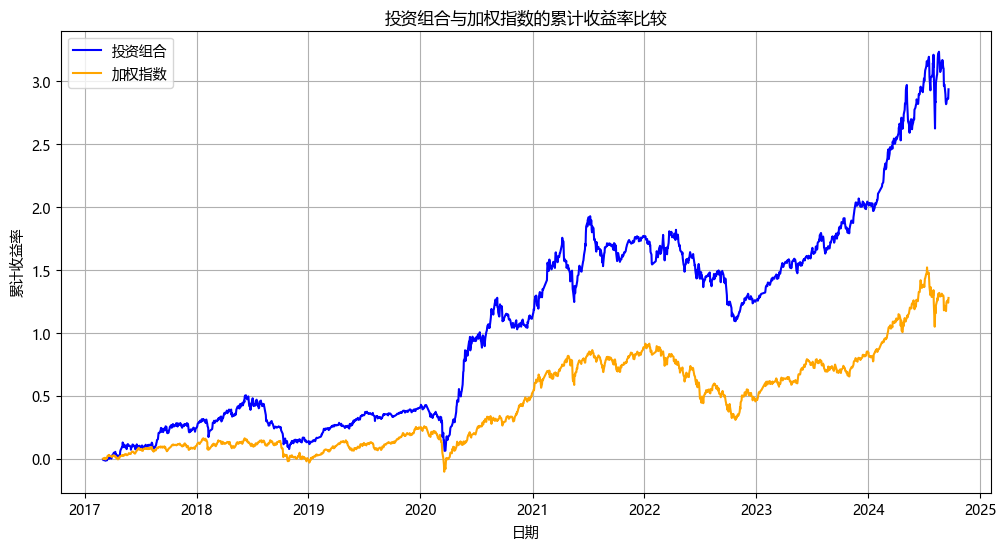

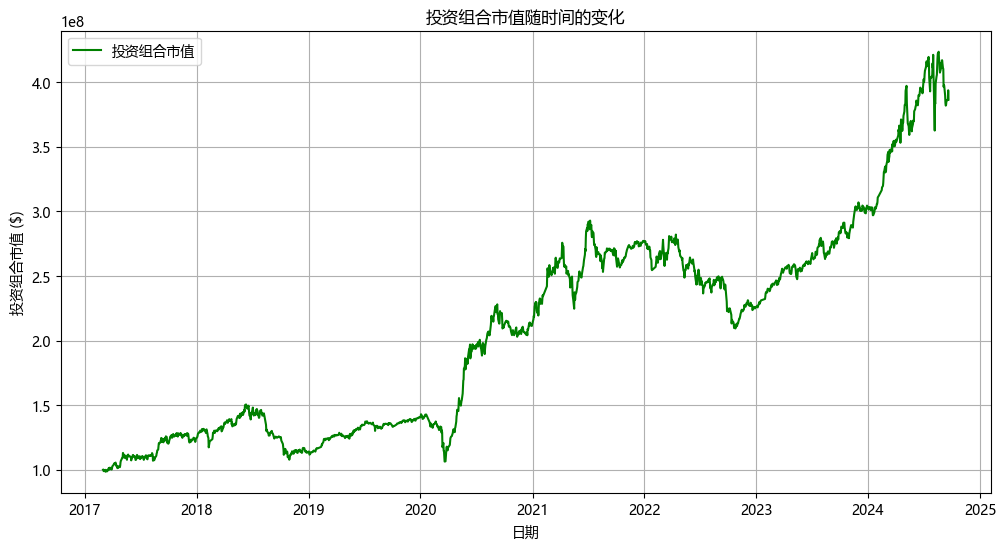

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
import empyrical as ep
import yfinance as yf
# 读取股票价格数据
df = pd.read_csv('盤後調整價.csv')

# 设置 'Date' 为索引并转换为日期类型
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# 数据清洗
df.dropna(how='all', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df[df <= 0] = np.nan

# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
df_filtered = df.drop(columns=insufficient_data.index)

# 获取所有股票的上市日期
stock_listing_dates = {stock: df_filtered[stock].first_valid_index() for stock in df_filtered.columns if df_filtered[stock].first_valid_index() is not None}
df_filtered.fillna(method='ffill', inplace=True)
df_filtered.fillna(method='bfill', inplace=True)

# 设置投资组合初始资金
initial_portfolio_value = 100000000
cash = initial_portfolio_value

# 初始化持仓和投资组合价值记录
current_allocation = {}
portfolio_value_per_day = pd.DataFrame(index=df_filtered.index)
portfolio_value_per_day['Total'] = np.nan

# 获取所有月份的列表
months = pd.date_range(start=df_filtered.index.min(), end=df_filtered.index.max(), freq='MS')
data_start_date = pd.Timestamp('2016-09-01')

# 定义函数
def get_historical_data(month_start):
    historical_end = month_start - pd.Timedelta(days=1)
    if historical_end < data_start_date:
        return None, None

    available_stocks = [stock for stock, listing_date in stock_listing_dates.items() if listing_date <= historical_end]
    if not available_stocks:
        return None, None

    historical_data = df_filtered.loc[data_start_date:historical_end, available_stocks]
    if historical_data.shape[0] < 100 or historical_data.shape[1] < 2:
        return None, None

    return historical_data, available_stocks

def calculate_optimal_weights(historical_data):
    mu = expected_returns.mean_historical_return(historical_data)
    S = risk_models.CovarianceShrinkage(historical_data).ledoit_wolf()

    try:
        ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), solver='ECOS')
        weights = ef.max_sharpe()
        return ef.clean_weights()
    except Exception as e:
        print(f"求解时出错: {e}")
        return None

def adjust_portfolio(valid_weights, valid_prices, current_allocation, cash):
    total_portfolio_value = sum(current_allocation.get(stock, 0) * valid_prices[stock] for stock in valid_weights) + cash
    target_allocations = {stock: weight * total_portfolio_value for stock, weight in valid_weights.items()}
    target_shares = {stock: target_allocations[stock] / valid_prices[stock] for stock in valid_weights}

    # 卖出需要减少权重的股票
    for stock in list(current_allocation.keys()):  # 使用副本避免修改字典大小
        if stock in target_shares:
            current_shares = current_allocation.get(stock, 0)
            target_shares_to_hold = target_shares[stock]
            if current_shares > target_shares_to_hold:
                shares_to_sell = current_shares - target_shares_to_hold
                proceeds = shares_to_sell * valid_prices[stock]
                cash += proceeds
                current_allocation[stock] -= shares_to_sell
                print(f"卖出 {stock} 的 {shares_to_sell:.2f} 股，获得现金 {proceeds:.2f}")
                if current_allocation[stock] == 0:
                    del current_allocation[stock]
        else:
            # 如果股票不在新的目标持仓里，卖出所有持仓
            shares_to_sell = current_allocation[stock]
            proceeds = shares_to_sell * valid_prices[stock]
            cash += proceeds
            print(f"卖出 {stock} 的 {shares_to_sell:.2f} 股，获得现金 {proceeds:.2f}")
            del current_allocation[stock]

    # 购买需要增加权重的股票
    for stock, shares_to_buy in target_shares.items():
        current_shares = current_allocation.get(stock, 0)
        if shares_to_buy > current_shares:
            shares_to_add = shares_to_buy - current_shares
            cost = shares_to_add * valid_prices[stock]
            if cost <= cash:
                current_allocation[stock] = current_shares + shares_to_add
                cash -= cost
                print(f"买入 {stock} 的 {shares_to_add:.2f} 股，花费现金 {cost:.2f}")
            else:
                affordable_shares = cash / valid_prices[stock]
                current_allocation[stock] = current_shares + affordable_shares
                cash -= affordable_shares * valid_prices[stock]
                print(f"现金不足，调整 {stock} 的买入数量为 {affordable_shares:.2f} 股，花费现金 {affordable_shares * valid_prices[stock]:.2f}")

    return current_allocation, cash
    
# 主循环
for month_start in months:
    print(f"\nProcessing month: {month_start.strftime('%Y-%m')}")
    month_end = month_start + pd.offsets.MonthEnd(0)

    # 获取历史数据
    historical_data, available_stocks = get_historical_data(month_start)
    if historical_data is None:
        print(f"{month_start.strftime('%Y-%m')} 的历史数据不足，跳过该月。")
        continue

    # 计算最优权重
    optimal_weights = calculate_optimal_weights(historical_data)
    if optimal_weights is None:
        print(f"{month_start.strftime('%Y-%m')} 无法计算最优权重，跳过该月。")
        continue

    # 获取该月最早的交易日价格
    try:
        month_prices = df_filtered.loc[month_start:month_end, available_stocks]
        earliest_prices = month_prices.iloc[0]
    except IndexError:
        print(f"{month_start.strftime('%Y-%m')} 没有足够的交易日，跳过该月。")
        continue

    earliest_prices = earliest_prices.dropna()
    valid_weights = {stock: weight for stock, weight in optimal_weights.items() if stock in earliest_prices.index}
    valid_prices = earliest_prices.loc[valid_weights.keys()]

    # 调整投资组合
    current_allocation, cash = adjust_portfolio(valid_weights, valid_prices, current_allocation, cash)

    # 计算每日投资组合市值
    held_stocks = list(current_allocation.keys())
    if held_stocks:
        try:
            month_prices = df_filtered.loc[month_start:month_end, held_stocks]
            holdings = pd.Series(current_allocation)
            daily_portfolio_value = (month_prices * holdings).sum(axis=1) + cash
            portfolio_value_per_day.loc[month_start:month_end, 'Total'] = daily_portfolio_value
        except Exception as e:
            print(f"{month_start.strftime('%Y-%m')}: 计算每日市值时出错: {e}")

# 填充缺失的投资组合市值
portfolio_value_per_day['Total'].fillna(method='ffill', inplace=True)

# 使用 empyrical 计算绩效指标
daily_returns = portfolio_value_per_day['Total'].pct_change().dropna()
annual_return = ep.annual_return(daily_returns)
sharpe_ratio = ep.sharpe_ratio(daily_returns)
max_drawdown = ep.max_drawdown(daily_returns)

print("\n=== 绩效指标 ===")
print(f"年化收益率: {annual_return:.2%}")
print(f"夏普比率: {sharpe_ratio:.2f}")
print(f"最大回撤: {max_drawdown:.2%}")

# 使用 yfinance 读取加权指数数据 (TWII for Taiwan Weighted Index)
index_ticker = '^TWII'  # 台湾加权指数代码
index_data = yf.download(index_ticker, start='2016-09-01', end=df_filtered.index.max().strftime('%Y-%m-%d'))

# 截取加权指数数据到指定的起始日期
index_start_date = pd.Timestamp('2017-03-01')
index_data = index_data.loc[index_start_date:]

# 计算加权指数的每日收益率和累计收益率
index_data['Returns'] = index_data['Adj Close'].pct_change().fillna(0)
index_data['Cumulative Returns'] = (1 + index_data['Returns']).cumprod() - 1

# 计算投资组合的累计收益率
portfolio_value_per_day = portfolio_value_per_day.loc[index_start_date:]
portfolio_value_per_day['Cumulative Returns'] = (1 + daily_returns).cumprod() - 1

# 合并投资组合和加权指数的累计收益率，确保日期对齐
comparison_data = pd.concat([
    portfolio_value_per_day['Cumulative Returns'],
    index_data['Cumulative Returns']
], axis=1, join='inner').dropna()

comparison_data.columns = ['投资组合累计收益率', '加权指数累计收益率']

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 绘制对比图
plt.figure(figsize=(12, 6))
plt.plot(comparison_data.index, comparison_data['投资组合累计收益率'], label='投资组合', color='blue')
plt.plot(comparison_data.index, comparison_data['加权指数累计收益率'], label='加权指数', color='orange')
plt.title('投资组合与加权指数的累计收益率比较')
plt.xlabel('日期')
plt.ylabel('累计收益率')
plt.legend()
plt.grid(True)
plt.show()

# 可视化投资组合市值随时间的变化
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_per_day.index, portfolio_value_per_day['Total'], label='投资组合市值', color='green')
plt.title('投资组合市值随时间的变化')
plt.xlabel('日期')
plt.ylabel('投资组合市值 ($)')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
pip install empyrical-reloaded

  Using cached peewee-3.17.3.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.3-py3-none-any.whl size=138453 sha256=a89669e56cce7c1266e9a33235d2bd5c1e07b7a62cd01b6ef166ce54a7a7b85e
  Stored in directory: c:\users\asas9\appdata\local\pip\cache\wheels\39\c7\dd\909d267742f7fbb941ff081dacd661f622a0b4eb38f667b84b
Successfully built peewee
  Attempting uninstall: peewee
    Found existing installation: peewee 3.17.6
    Uninstalling peewee-3.17.6:
      Successfully uninstalled peewee-3.17.6
Note: you may need to restart the kernel to use updated packages.
